In [1]:
# load libraries
import pandas as pd
import os
import numpy as np
import datetime
from torch.utils.data import Dataset, DataLoader
from torch import save

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change me, have to point to the Meteotrentino drive folder
wk =  "/content/drive/My Drive/10. Meteotrentino/"

dataset_path = wk+"DatasetPytorch/24+1_v2/"

sensor_type = "pioggia"

sensor_dataset = "pioggia1"

sensor = "T0065"



In [4]:
file_name_test = sensor+"_test_"+sensor_dataset+"_tsf.pt"
file_name_train = sensor+"_test_"+sensor_dataset+"_tsf.pt"

file_test_to_read_path = os.path.join(wk, dataset_path, sensor_type, file_name_test)
file_train_to_read_path = os.path.join(wk, dataset_path, sensor_type, file_name_train)

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
  def __init__(self, df_train, df_test):
    self.features = torch.FloatTensor(df_train.drop(['sensor_code','in_datetime'],axis=1).values)
    self.target = torch.FloatTensor(df_test.drop(['sensor_code','in_datetime']+[f"val_{idx}" for idx in range(n_previsions)],axis=1).values)
    mean = self.features.mean()
    std = self.features.std()
    self.features = (self.features-mean)/std
    self.target = (self.target-mean)/std
    self.sensor_code = df_train['sensor_code'].values
    self.in_datetime = df_train['in_datetime'].values
    
    self.labels = torch.FloatTensor(df_test[[f"val_{idx}" for idx in range(n_previsions)]].values)

  def __len__(self):
    return len(self.sensor_code)

  def __getitem__(self, idx):
    sensor_code = self.sensor_code[idx]
    date = self.in_datetime[idx]
    features = self.features[idx]
    labels = self.labels[idx]
    target = self.target[idx]
    return {"sensor_code": sensor_code, "date":date,"features": features, "target":target,"labels":labels}

In [6]:
from torch import save,load
dataset = {}
splits = ['train','test']
shuffle = {'train':True,'test':False}
dataset['train'] = load(file_train_to_read_path)
dataset['test'] = load(file_test_to_read_path)
#dataset['train'] = CustomDataset(training_features, training_target)
#dataset['test'] = CustomDataset(test_features, test_target)
# save(dataset['train'], wk+'DatasetPytorch/good_by_daniele/'+'T0059_train_temperature_unnorm_tsf.pt')
# save(dataset['test'], wk+'DatasetPytorch/good_by_daniele/'+'T0059_test_temperature_unnorm_tsf.pt')

### dataloader
b_size = {'train':64,'test':len(dataset['test'])}
dataloader = {x: torch.utils.data.DataLoader(dataset=dataset[x],
                                            batch_size=b_size[x],
                                            shuffle=shuffle[x],
                                            collate_fn=lambda x: x,
                                            drop_last=True)
                                            #num_workers=int(opt.workers),
                                            #worker_init_fn=(None if opt.manualseed == -1
                                            #else lambda x: np.random.seed(opt.manualseed)))
            for x in splits}

In [7]:
### standardize the data
########################## TO DO: THE STANDARDIZATION MUST INCLUDE THE TARGET!!! 
# means = self.features.mean(dim=1, keepdim=True)
# stds = torch.clamp(self.features.std(dim=1, keepdim=True),min=1)
# self.features = (self.features - means) / stds
# self.target = (self.target - means) / stds
features = torch.stack([v["features"] for v in dataset['train']])
targets = torch.stack([v["target"] for v in dataset['train']])
complete = features#torch.cat((features, targets), 1)
print(features)
mean = complete.mean()#dim=1, keepdim=True)
print(mean)
std = complete.std()#dim=1, keepdim=True)
print(std)
print(((features-mean)/std).std())
dataset_raw = dataset

tensor([[-0.1418, -0.1418, -0.1418,  ..., -0.1418, -0.1418, -0.1418],
        [-0.1418, -0.1418, -0.1418,  ..., -0.1418, -0.1418, -0.1418],
        [-0.1418, -0.1418, -0.1418,  ..., -0.1418, -0.1418, -0.1418],
        ...,
        [-0.1418, -0.1418, -0.1418,  ..., -0.1418, -0.1418, -0.1418],
        [-0.1418,  3.2952, -0.1418,  ..., -0.1418, -0.1418, -0.1418],
        [-0.1418, -0.1418,  3.2952,  ...,  6.7323,  3.2952,  3.2952]])
tensor(1.2370e-08)
tensor(1.)
tensor(1.)


In [8]:
# split required if dataset is too fat
SPLIT_NUMBER = 50

100%|██████████| 192/192 [00:08<00:00, 21.38it/s]


Epoch = 1
	Training Loss: 1.1780
	Test Loss: 1.1760


100%|██████████| 192/192 [00:08<00:00, 22.91it/s]


Epoch = 2
	Training Loss: 1.1745
	Test Loss: 1.1708


100%|██████████| 192/192 [00:08<00:00, 21.95it/s]


Epoch = 3
	Training Loss: 1.1550
	Test Loss: 1.1656


100%|██████████| 192/192 [00:07<00:00, 24.33it/s]


Epoch = 4
	Training Loss: 1.1628
	Test Loss: 1.1599


100%|██████████| 192/192 [00:07<00:00, 24.29it/s]


Epoch = 5
	Training Loss: 1.1412
	Test Loss: 1.1536


100%|██████████| 192/192 [00:08<00:00, 22.94it/s]


Epoch = 6
	Training Loss: 1.1506
	Test Loss: 1.1456


100%|██████████| 192/192 [00:08<00:00, 22.35it/s]


Epoch = 7
	Training Loss: 1.1420
	Test Loss: 1.1354


100%|██████████| 192/192 [00:07<00:00, 24.09it/s]


Epoch = 8
	Training Loss: 1.1275
	Test Loss: 1.1222


100%|██████████| 192/192 [00:08<00:00, 21.86it/s]


Epoch = 9
	Training Loss: 1.1144
	Test Loss: 1.1044


100%|██████████| 192/192 [00:08<00:00, 22.86it/s]


Epoch = 10
	Training Loss: 1.0943
	Test Loss: 1.0809


100%|██████████| 192/192 [00:08<00:00, 23.85it/s]


Epoch = 11
	Training Loss: 1.0677
	Test Loss: 1.0536


100%|██████████| 192/192 [00:08<00:00, 23.88it/s]


Epoch = 12
	Training Loss: 1.0417
	Test Loss: 1.0286


100%|██████████| 192/192 [00:08<00:00, 23.95it/s]


Epoch = 13
	Training Loss: 1.0233
	Test Loss: 1.0201


100%|██████████| 192/192 [00:08<00:00, 23.73it/s]


Epoch = 14
	Training Loss: 1.0209
	Test Loss: 1.0275


100%|██████████| 192/192 [00:08<00:00, 21.93it/s]


Epoch = 15
	Training Loss: 1.0254
	Test Loss: 1.0199


100%|██████████| 192/192 [00:11<00:00, 16.75it/s]


Epoch = 16
	Training Loss: 1.0123
	Test Loss: 1.0041


100%|██████████| 192/192 [00:12<00:00, 15.68it/s]


Epoch = 17
	Training Loss: 0.9956
	Test Loss: 0.9945


100%|██████████| 192/192 [00:11<00:00, 17.39it/s]


Epoch = 18
	Training Loss: 0.9935
	Test Loss: 0.9910


100%|██████████| 192/192 [00:08<00:00, 21.39it/s]


Epoch = 19
	Training Loss: 0.9905
	Test Loss: 0.9890


100%|██████████| 192/192 [00:11<00:00, 17.27it/s]


Epoch = 20
	Training Loss: 0.9881
	Test Loss: 0.9862


100%|██████████| 192/192 [00:09<00:00, 19.63it/s]


Epoch = 21
	Training Loss: 0.9850
	Test Loss: 0.9826


100%|██████████| 192/192 [00:08<00:00, 22.60it/s]


Epoch = 22
	Training Loss: 0.9814
	Test Loss: 0.9785


100%|██████████| 192/192 [00:08<00:00, 21.70it/s]


Epoch = 23
	Training Loss: 0.9758
	Test Loss: 0.9743


100%|██████████| 192/192 [00:08<00:00, 23.80it/s]


Epoch = 24
	Training Loss: 0.9724
	Test Loss: 0.9702


100%|██████████| 192/192 [00:08<00:00, 21.44it/s]


Epoch = 25
	Training Loss: 0.9680
	Test Loss: 0.9662


100%|██████████| 192/192 [00:08<00:00, 23.74it/s]


Epoch = 26
	Training Loss: 0.9654
	Test Loss: 0.9626


100%|██████████| 192/192 [00:08<00:00, 22.95it/s]


Epoch = 27
	Training Loss: 0.9618
	Test Loss: 0.9591


100%|██████████| 192/192 [00:08<00:00, 23.64it/s]


Epoch = 28
	Training Loss: 0.9582
	Test Loss: 0.9555


100%|██████████| 192/192 [00:08<00:00, 23.67it/s]


Epoch = 29
	Training Loss: 0.9524
	Test Loss: 0.9515


100%|██████████| 192/192 [00:08<00:00, 22.23it/s]


Epoch = 30
	Training Loss: 0.9496
	Test Loss: 0.9479


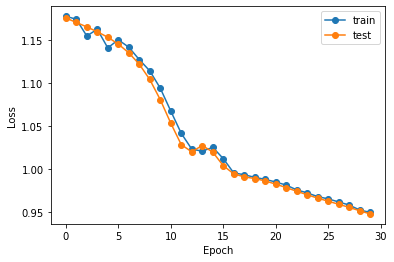

In [11]:
from collections.abc import Sequence
from importlib import reload  # Python 3.4+
import torch
import sys
from torch import nn
# clone the libraries if not done 
#!git clone https://github.com/eliazonta/AI-Challenge-HIT
sys.path.append("/content/AI-Challenge-HIT/python_code/notebooks/AnomalyDetection/")
import LSTMs
LSTMs = reload(LSTMs)
from LSTMs import SingleLSTMCell,LSTM

device = torch.device("cuda")
sequence_length = dataset['train'][0]['features'].size(0)
pred_length = dataset['train'][0]['target'].size(0)
# Instantiate the model with hyperparameters
model = LSTM(input_size=1, output_size=1, hidden_dim=32, num_layers=3, device = device)
train_loss = []
test_loss = []

# We'll also set the model to the device that we defined earlier (default is CPU)
# Daniele: Not sure if this is useless now, should check
model = model.to(device)
#model.load_state_dict(torch.load('T0065_rad_sol_model.pt', map_location=torch.device('cpu')))

# Define hyperparameters
lr = 1e-5

# Define Loss, Optimizer
criterion = nn.MSELoss()#CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

from tqdm import tqdm
n_epochs = 30
for epoch in range(1, n_epochs + 1):
    model.train()
    loss_train_batch = []
    for data in tqdm(dataloader['train'], leave=True, total=len(dataloader['train'])):
      # preparing the input
      batch_input_features = torch.stack([v["features"] for v in data]).to(device)
      target_features = torch.stack([v["target"] for v in data]).to(device)
      # feed the model
      output = model(batch_input_features,pred_length)
      output = output.to(device)[:,-pred_length:]
      loss_train = criterion(output, target_features)
      loss_train.backward() # Does backpropagation and calculates gradients
      optimizer.step() # Updates the weights accordingly
      loss_train_batch.append(loss_train.item())
    
    mean_train_loss = np.mean(loss_train_batch)
    model.eval()
    # preparing the input of test dataset
    data_test = next(iter(dataloader['test']))
    test_input_features = torch.stack([v["features"] for v in data_test]).to(device)
    test_target_features = torch.stack([v["target"] for v in data_test]).to(device)

    test_input_features_splitted = np.array_split(test_input_features, SPLIT_NUMBER)
    output_test_list = []
    for input_feature_split_subset in test_input_features_splitted:
      output_test_list.append(model(input_feature_split_subset,pred_length)[:,-pred_length:])
    output_test_flat = [item for item in output_test_list]
    output_test = torch.cat(output_test_flat)
    loss_test = criterion(output_test, test_target_features)
    train_loss.append(mean_train_loss)
    test_loss.append(loss_test.item())
    print("Epoch = " + str(epoch))
    print("\tTraining Loss: {:.4f}".format(mean_train_loss))
    print("\tTest Loss: {:.4f}".format(loss_test.item()))

    if mean_train_loss < 0.010:
        break

import matplotlib.pyplot as plt

plt.plot(train_loss,'o-',label="train")
plt.plot(test_loss,'o-',label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [12]:
# save model
torch.save(model.state_dict(),
           os.path.join(wk, "TrainedModels/", sensor+"_"+sensor_type+"_model.pt")
)

In [13]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
criterion = nn.MSELoss(reduction='none')
sample = dataset["test"]
### use below a list of min and max indexes in case of memory overflow, otherwise set to none
restriction = None#[10000,50000]

index_array_to_split = np.int64(np.linspace(0, len(sample)-1, len(sample)))

index_array_splitted = np.array_split(index_array_to_split, SPLIT_NUMBER)


def extract_quantity_from_dataset(dataset,label_of_quantity,indexes=None,device='cpu'):
  # returns a pytorch array of the given quantity
  # optional: restrict the dataset to some indexes (for memory allocation reasons)
  if(indexes):
    pt_tensor = torch.stack([dataset[i][label_of_quantity] for i in range(min(indexes),max(indexes)+1)]).to(device)
  else: pt_tensor = torch.stack([v[label_of_quantity] for v in dataset]).to(device)
  return pt_tensor

reconstructed_list = []

sample_tensor_validation_list = []
sample_tensot_features_list = []
sample_tensor_target_list = []
loss_list = []

for k in index_array_splitted:
  restriction = [k[0  ], k[-1]]
  sample_tensor_validation = extract_quantity_from_dataset(sample,"labels",restriction)
  sample_tensor_features = extract_quantity_from_dataset(sample,"features",restriction,device=device)
  sample_tensor_target = extract_quantity_from_dataset(sample,"target",restriction,device=device)

  sample_tensor_validation_list.append(sample_tensor_validation)
  sample_tensot_features_list.append(sample_tensor_features)
  sample_tensor_target_list.append(sample_tensor_target)

  sensor_code = [v['sensor_code'] for v in sample][0]
  date = pd.to_datetime([v['date'] for v in sample]).strftime("%d/%m/%Y %H:%M") 

  

  model.eval()
  with torch.no_grad():
    reconstructed_list.append( model(sample_tensor_features,pred_length) )
  reconstructed = reconstructed_list[-1]
  
  loss_list.append(criterion(reconstructed[:,-pred_length:]*std + mean, sample_tensor_target*std + mean).mean(dim=1))

In [14]:
reconstructed = torch.cat( [x for x in reconstructed_list])

loss = torch.cat([x for x in loss_list])

sample_tensor_validation = torch.cat([x for x in sample_tensor_validation_list])
sample_tensor_features = torch.cat([x for x in sample_tensot_features_list])
sample_tensor_target = torch.cat ([x for x in sample_tensor_target_list])
# Find the data with highest loss

TOP_K_loss = 20

top_loss, top_loss_indexes = torch.topk(loss, TOP_K_loss, dim=0)
lowest_loss, lowest_loss_indexes = torch.topk(loss, TOP_K_loss, dim=0, largest=False)

In [15]:
n_previsions = len(sample_tensor_target[0])

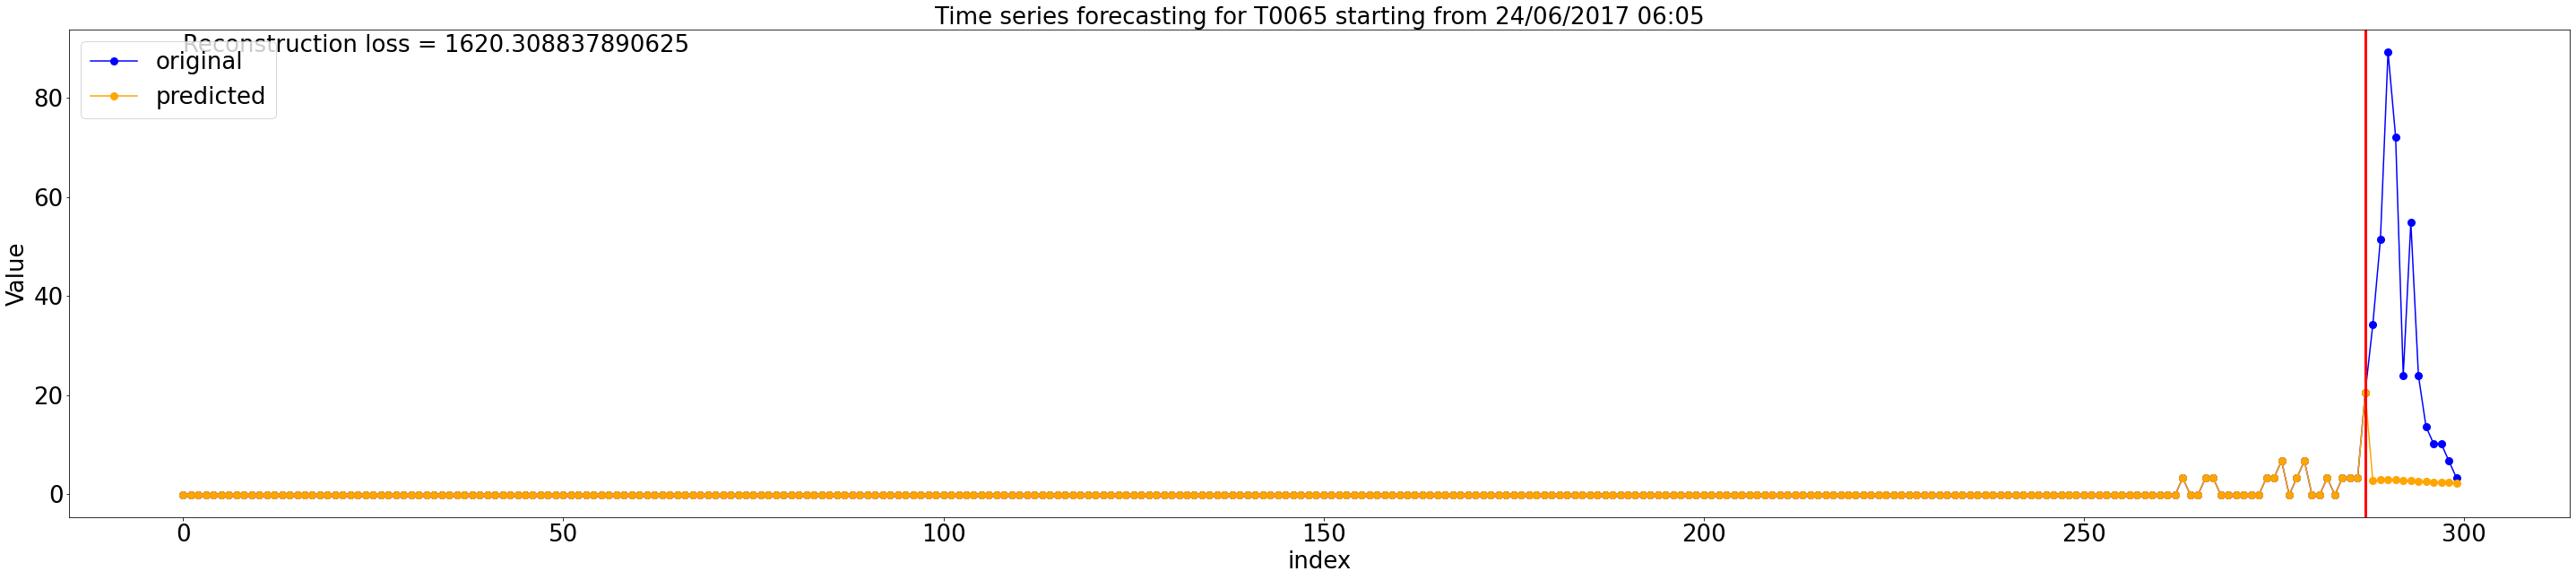

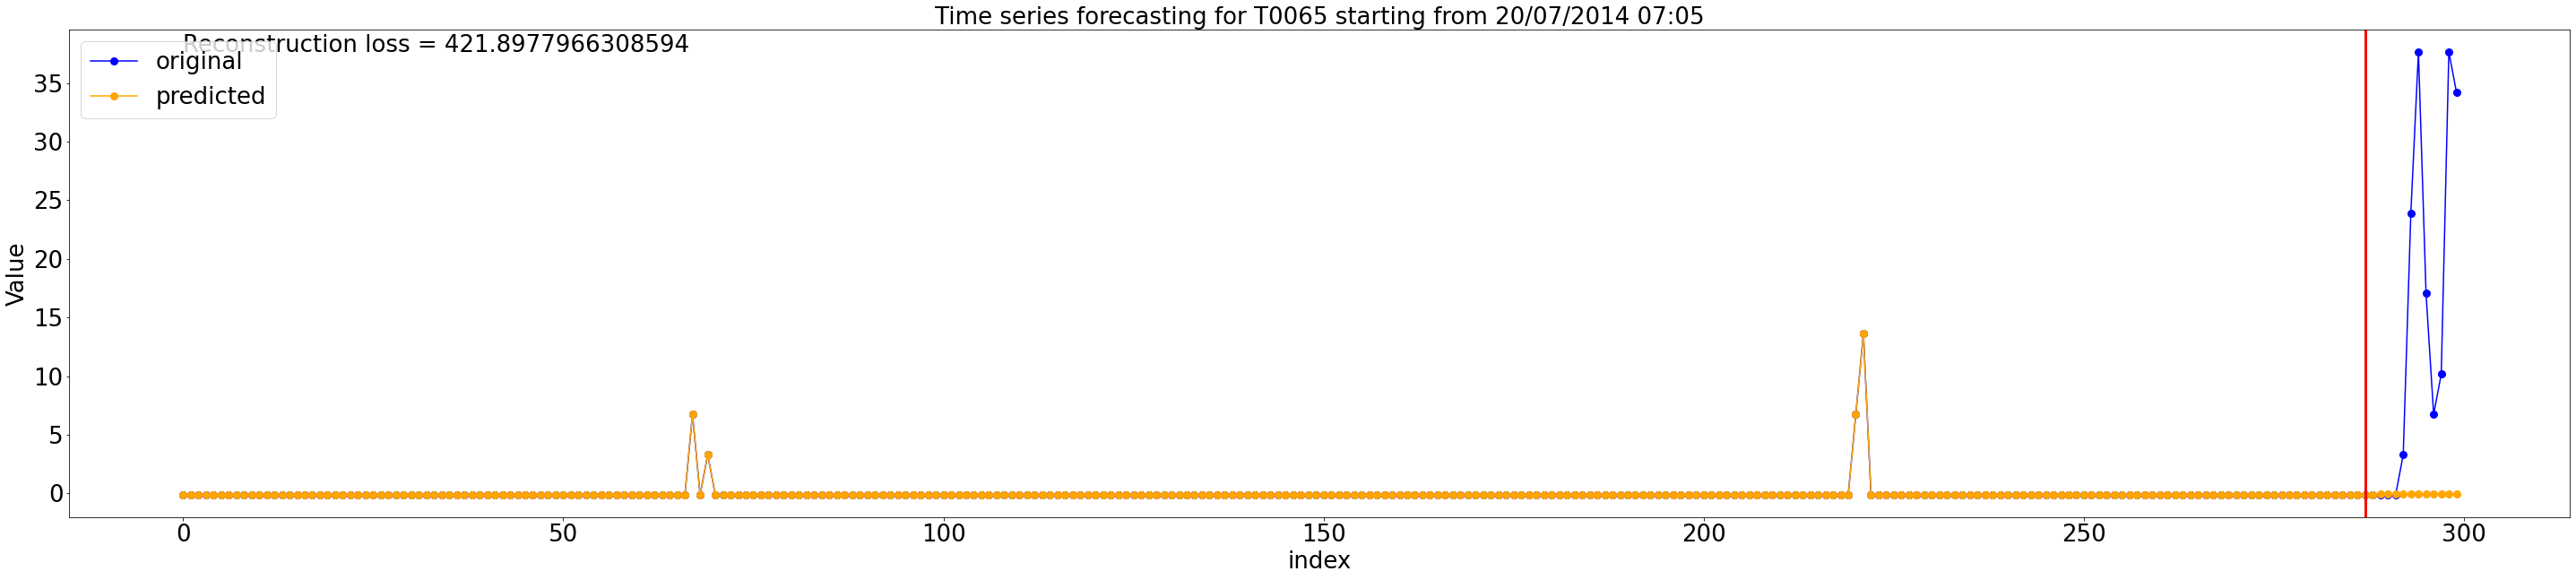

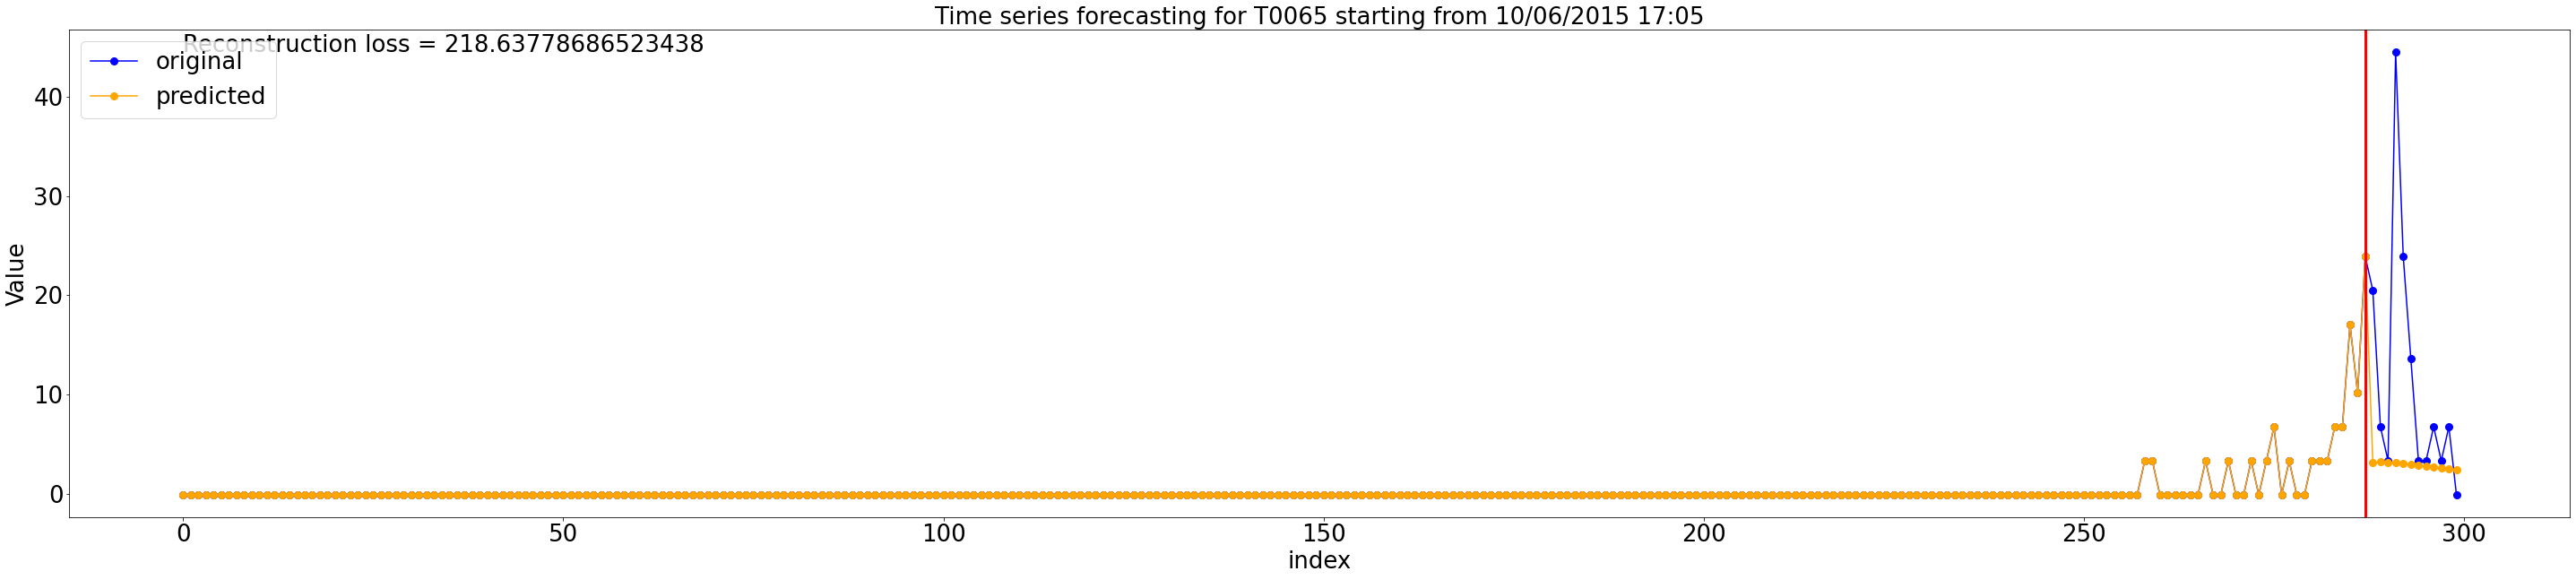

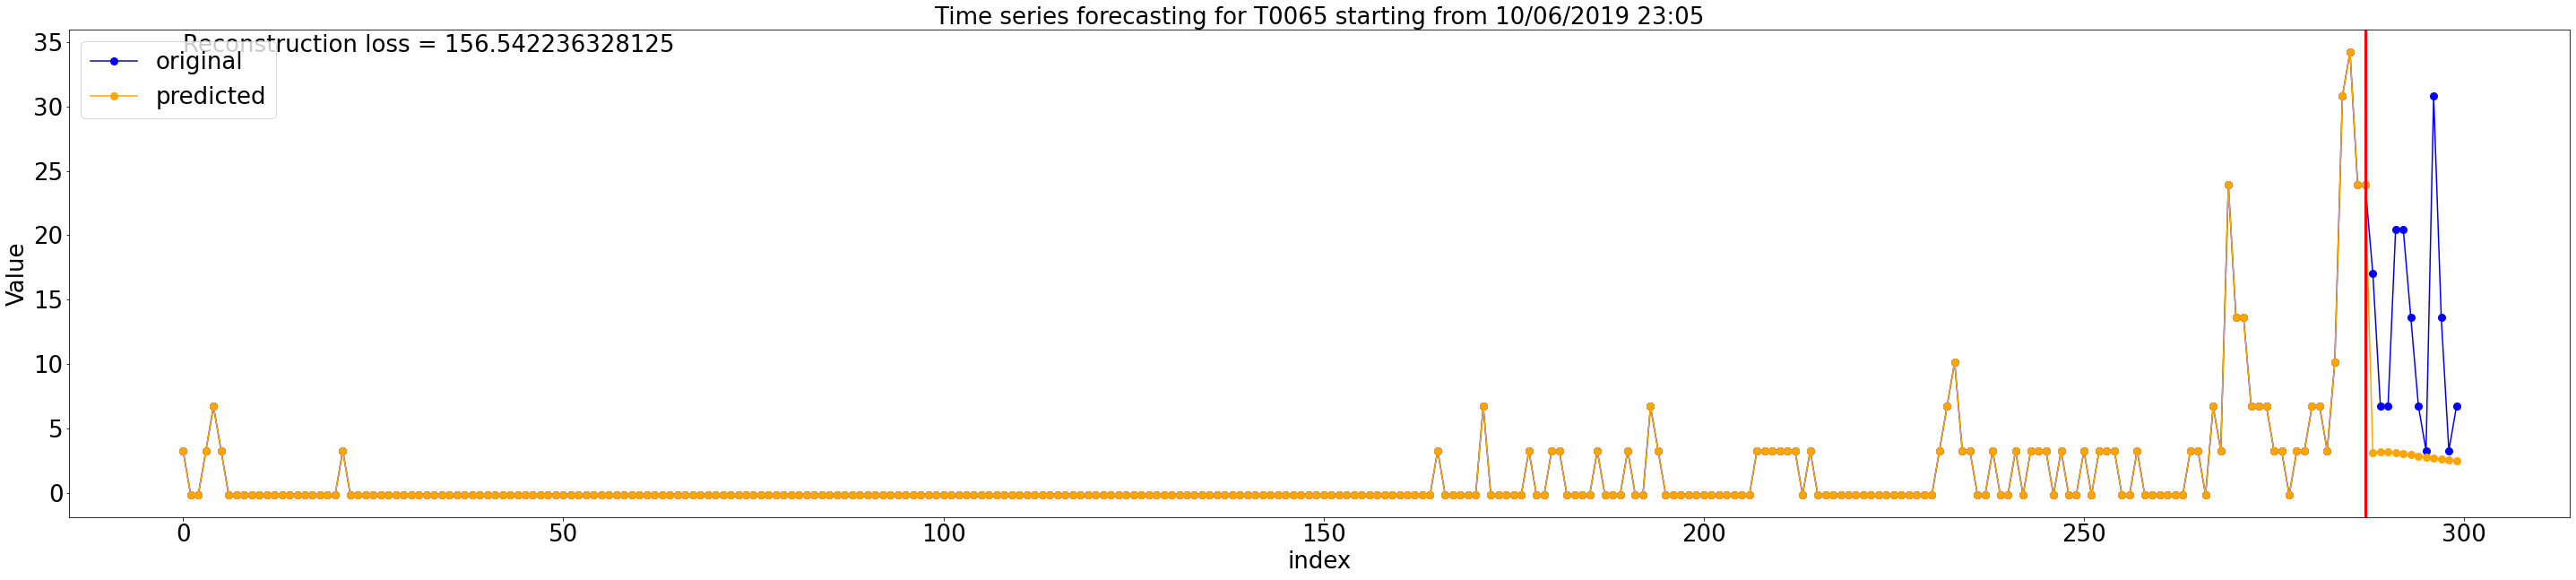

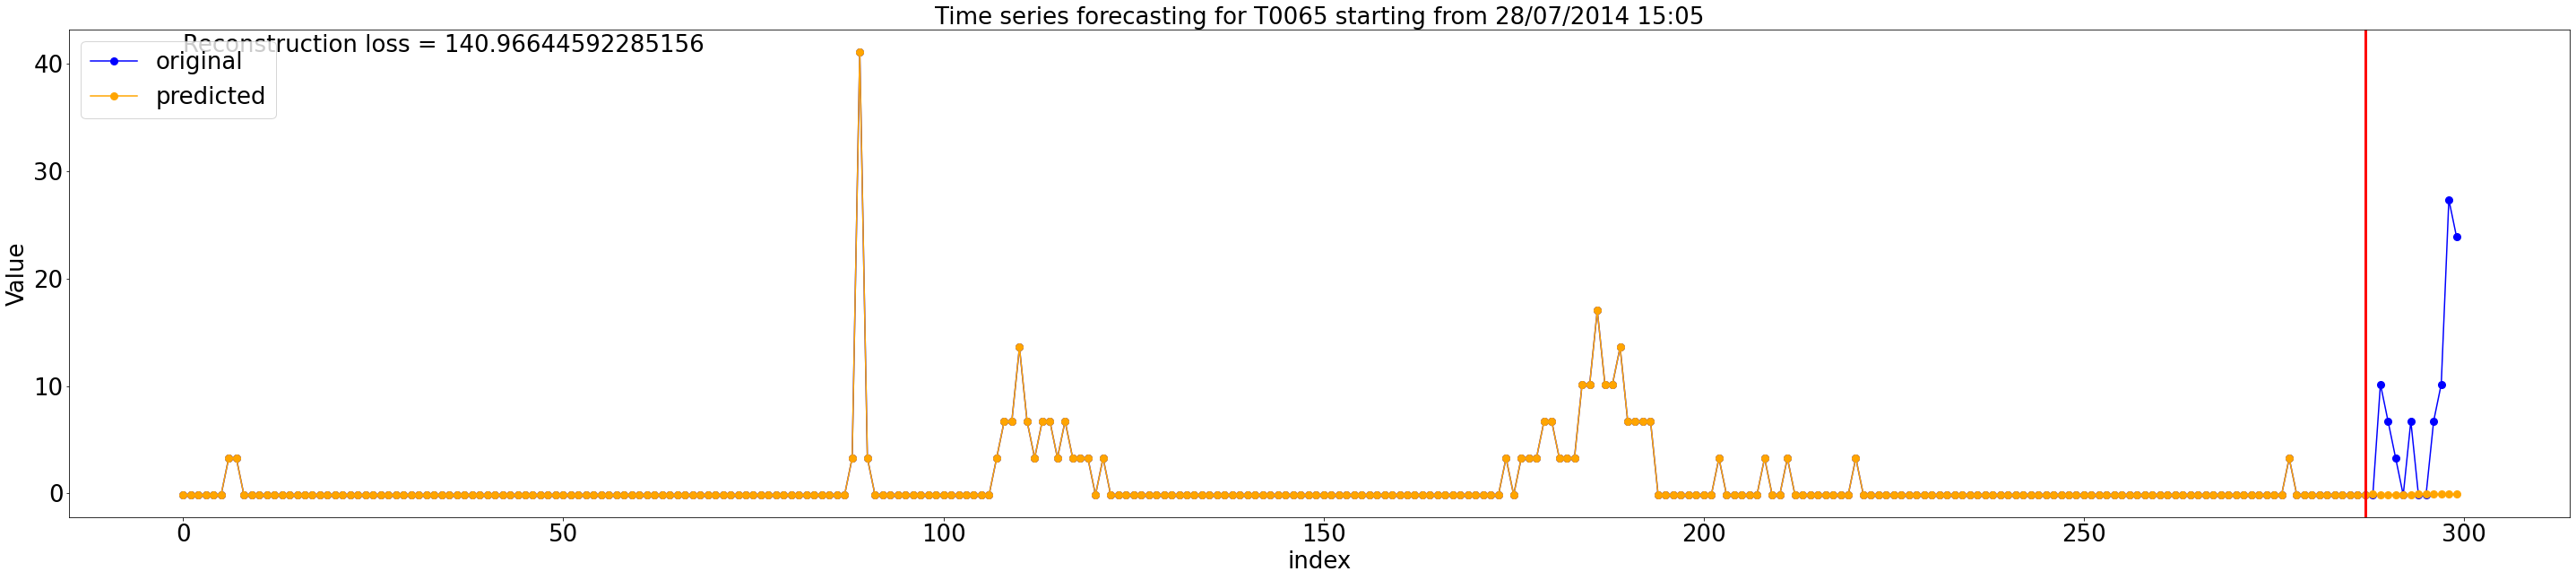

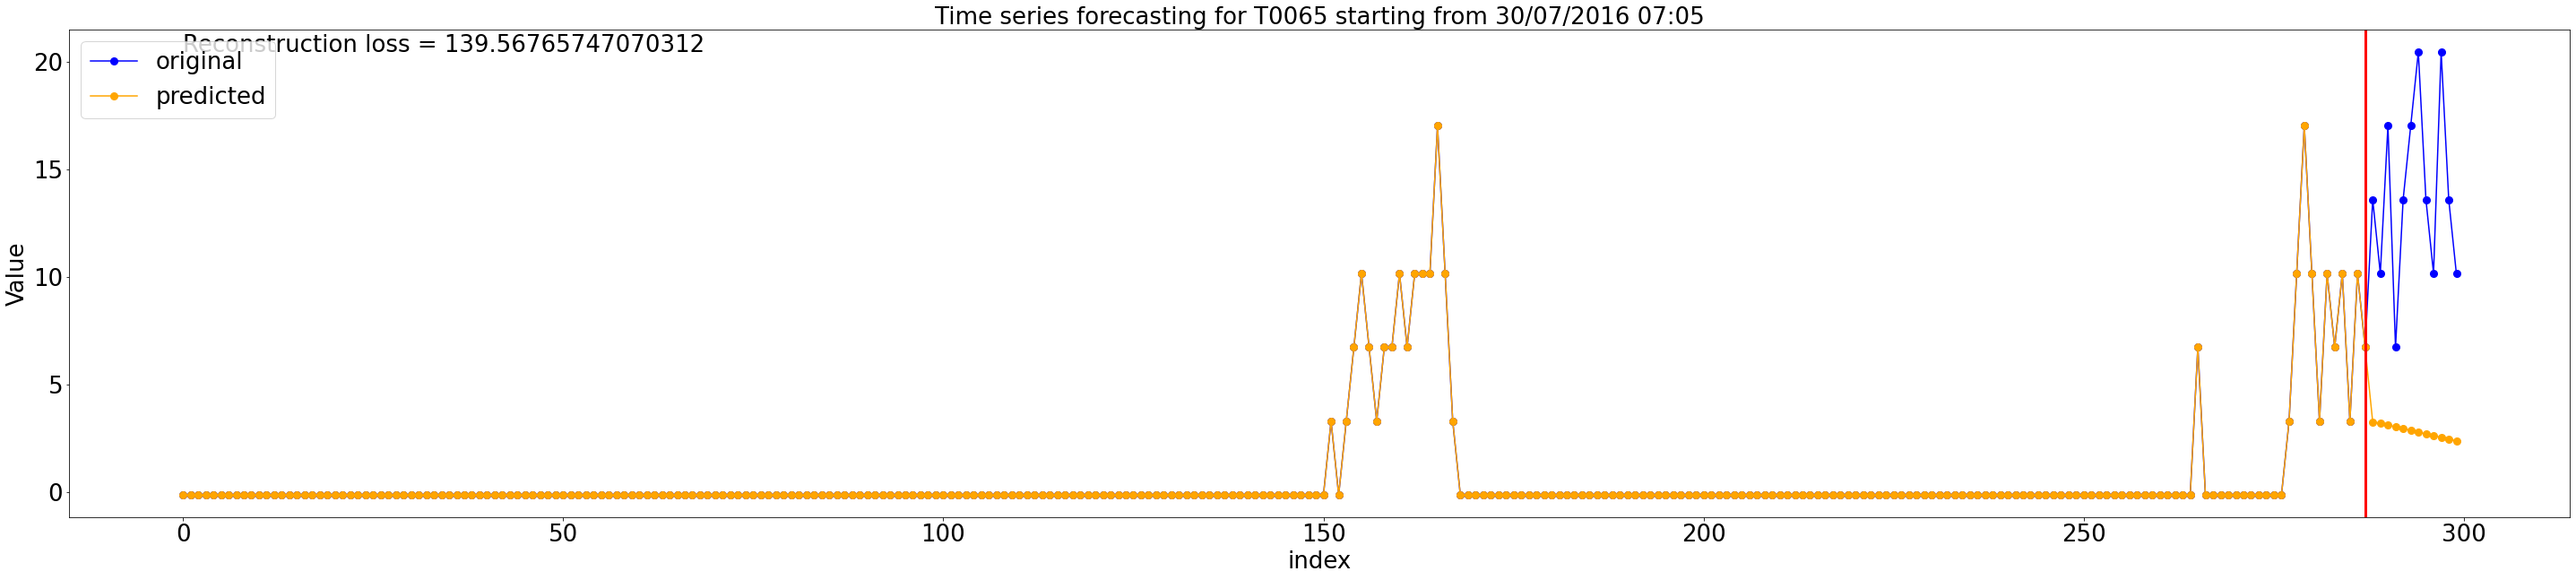

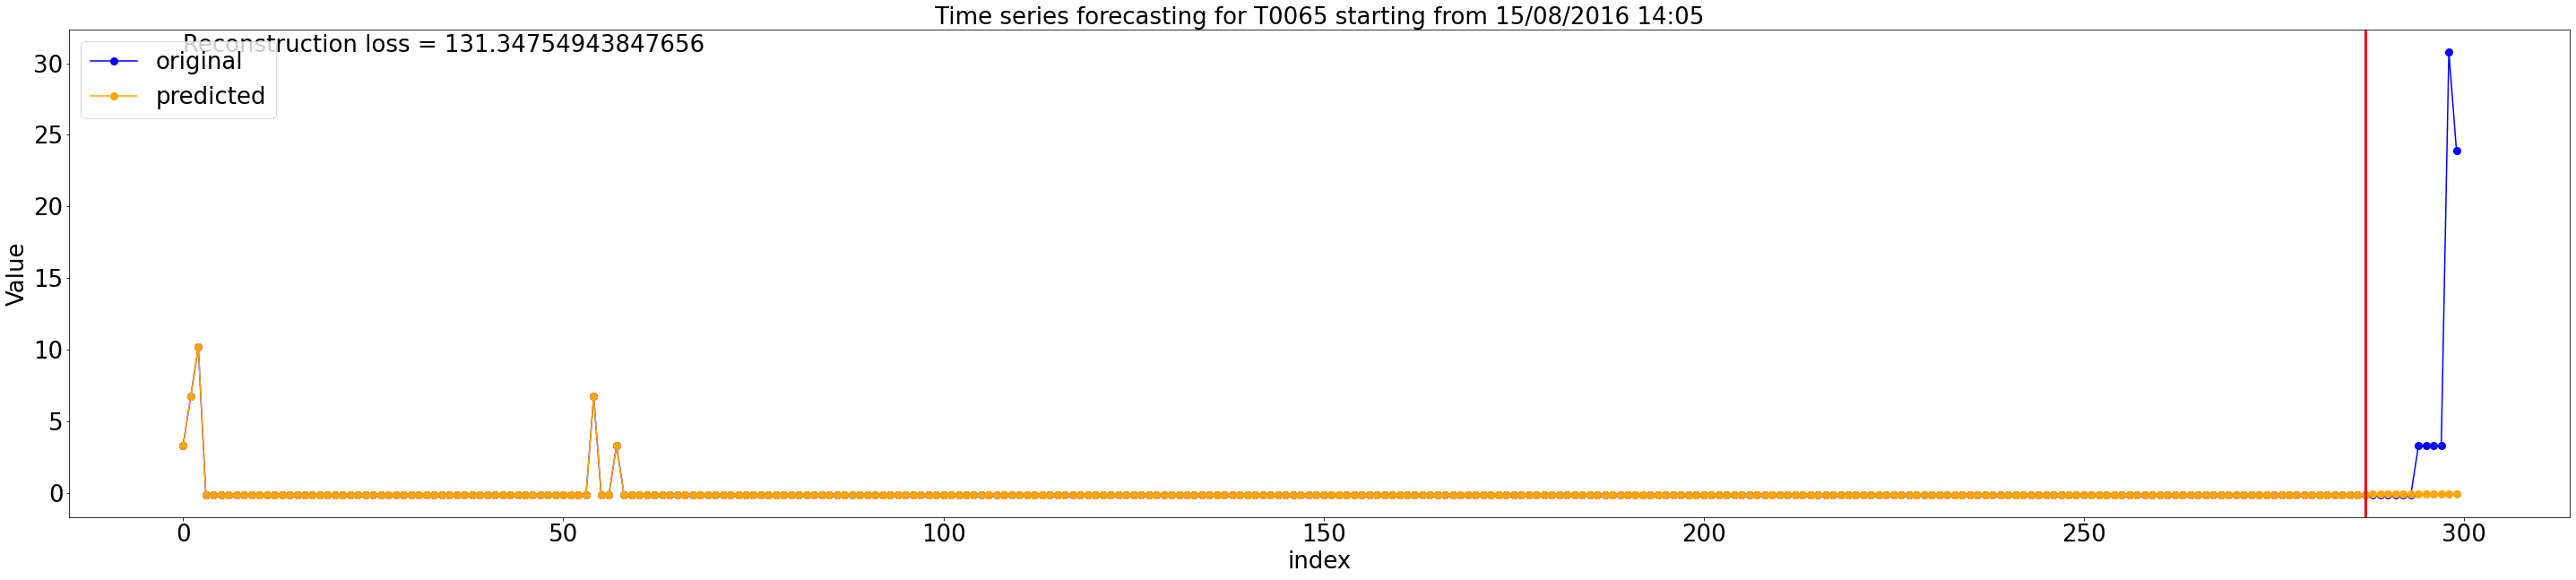

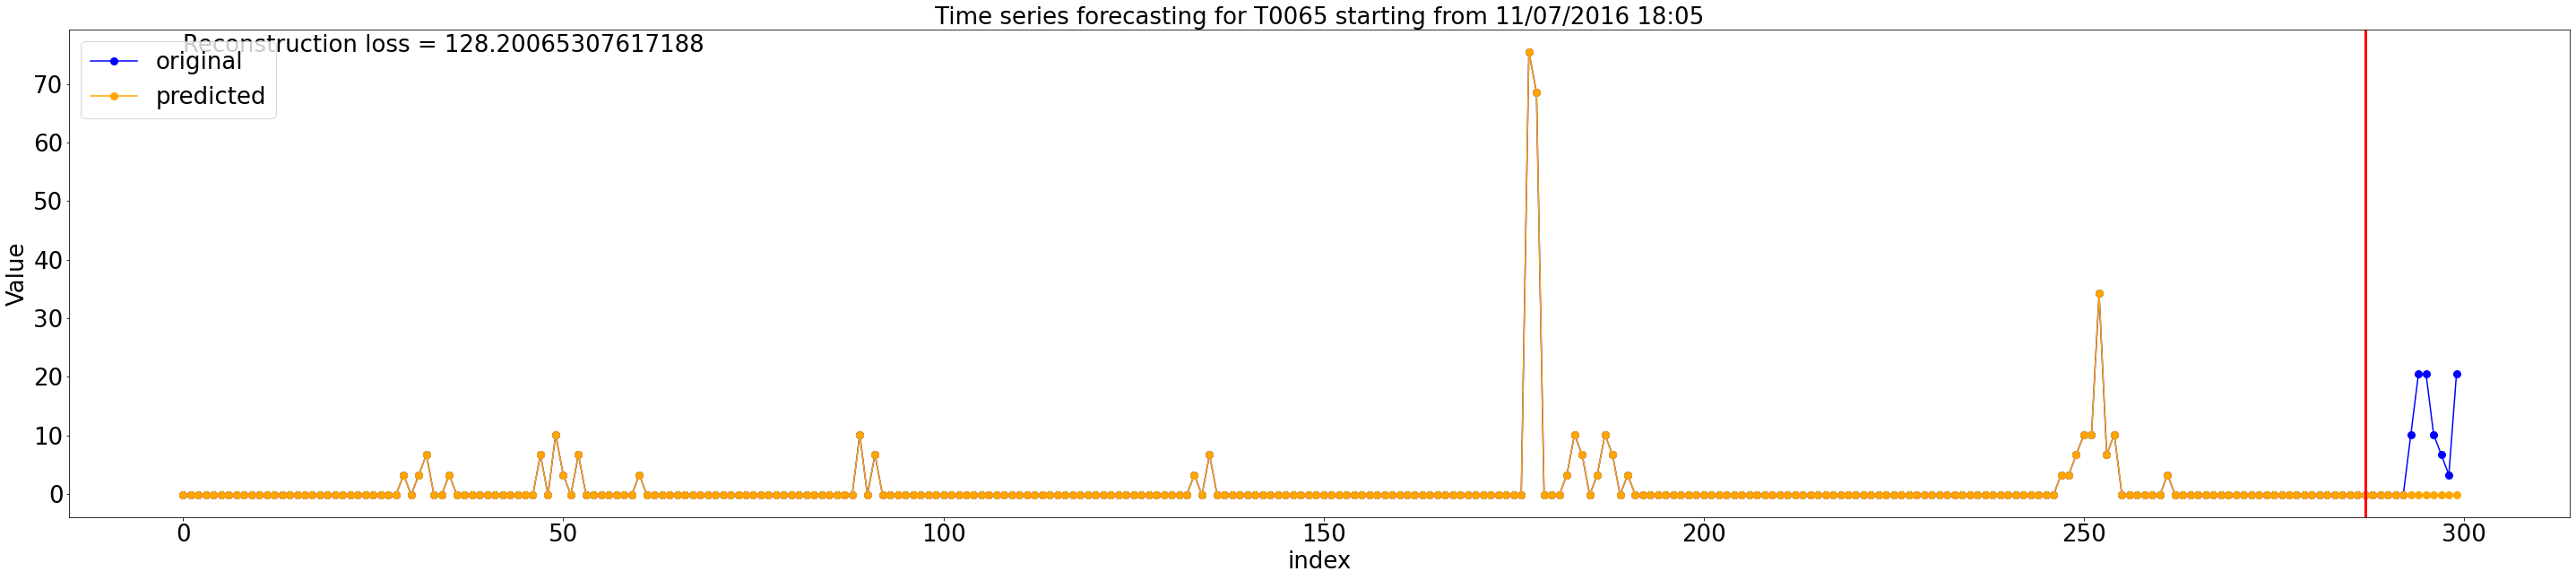

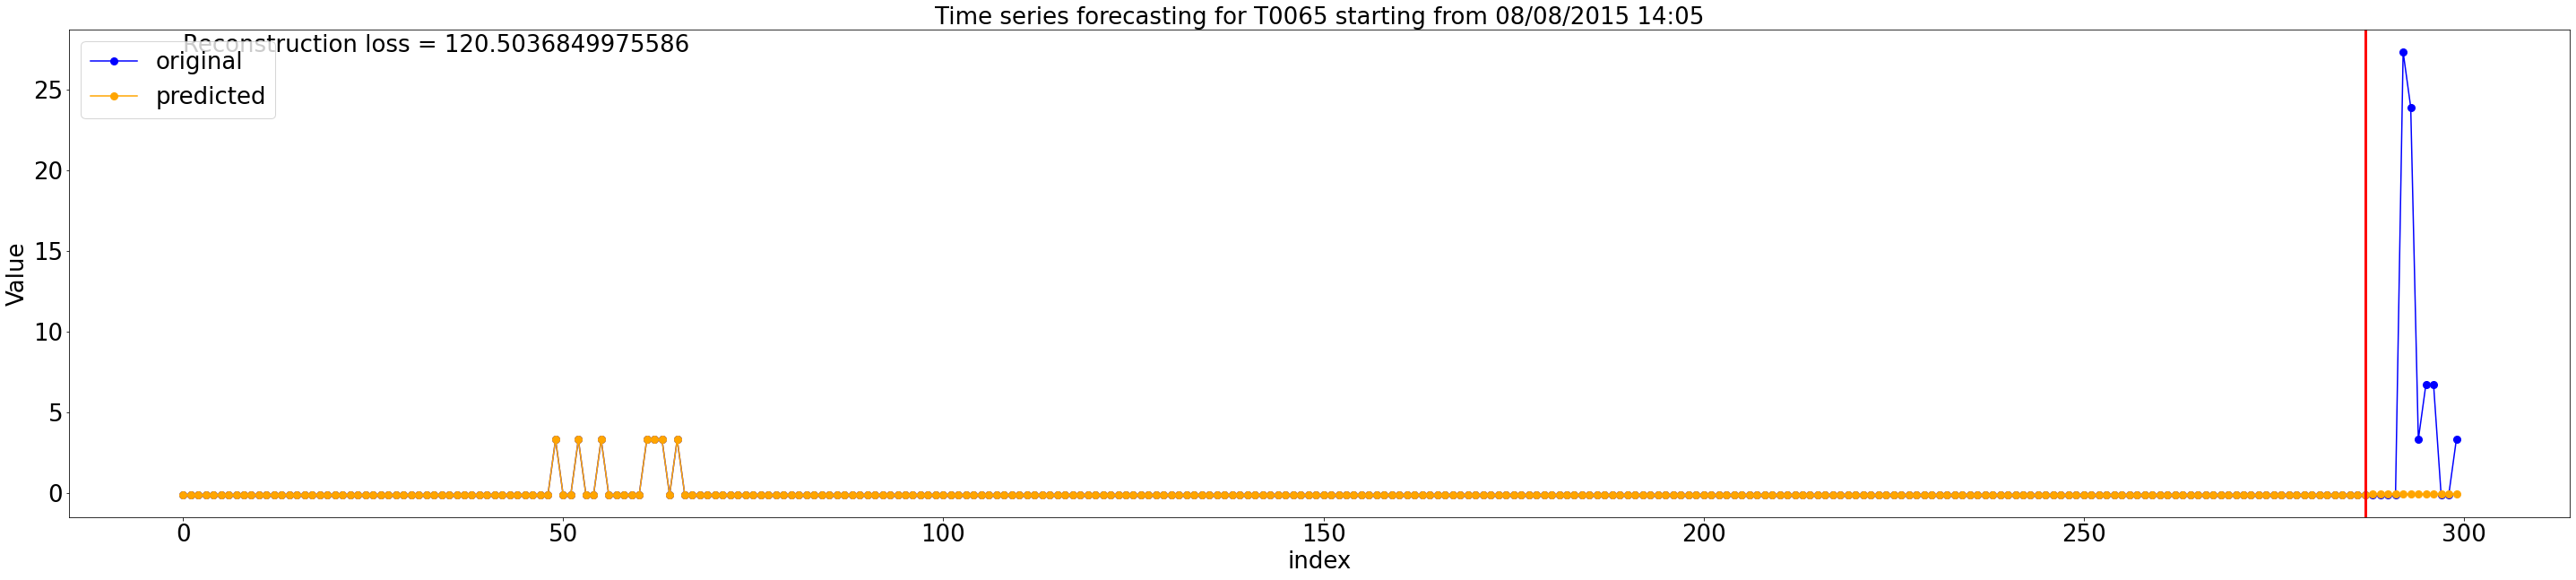

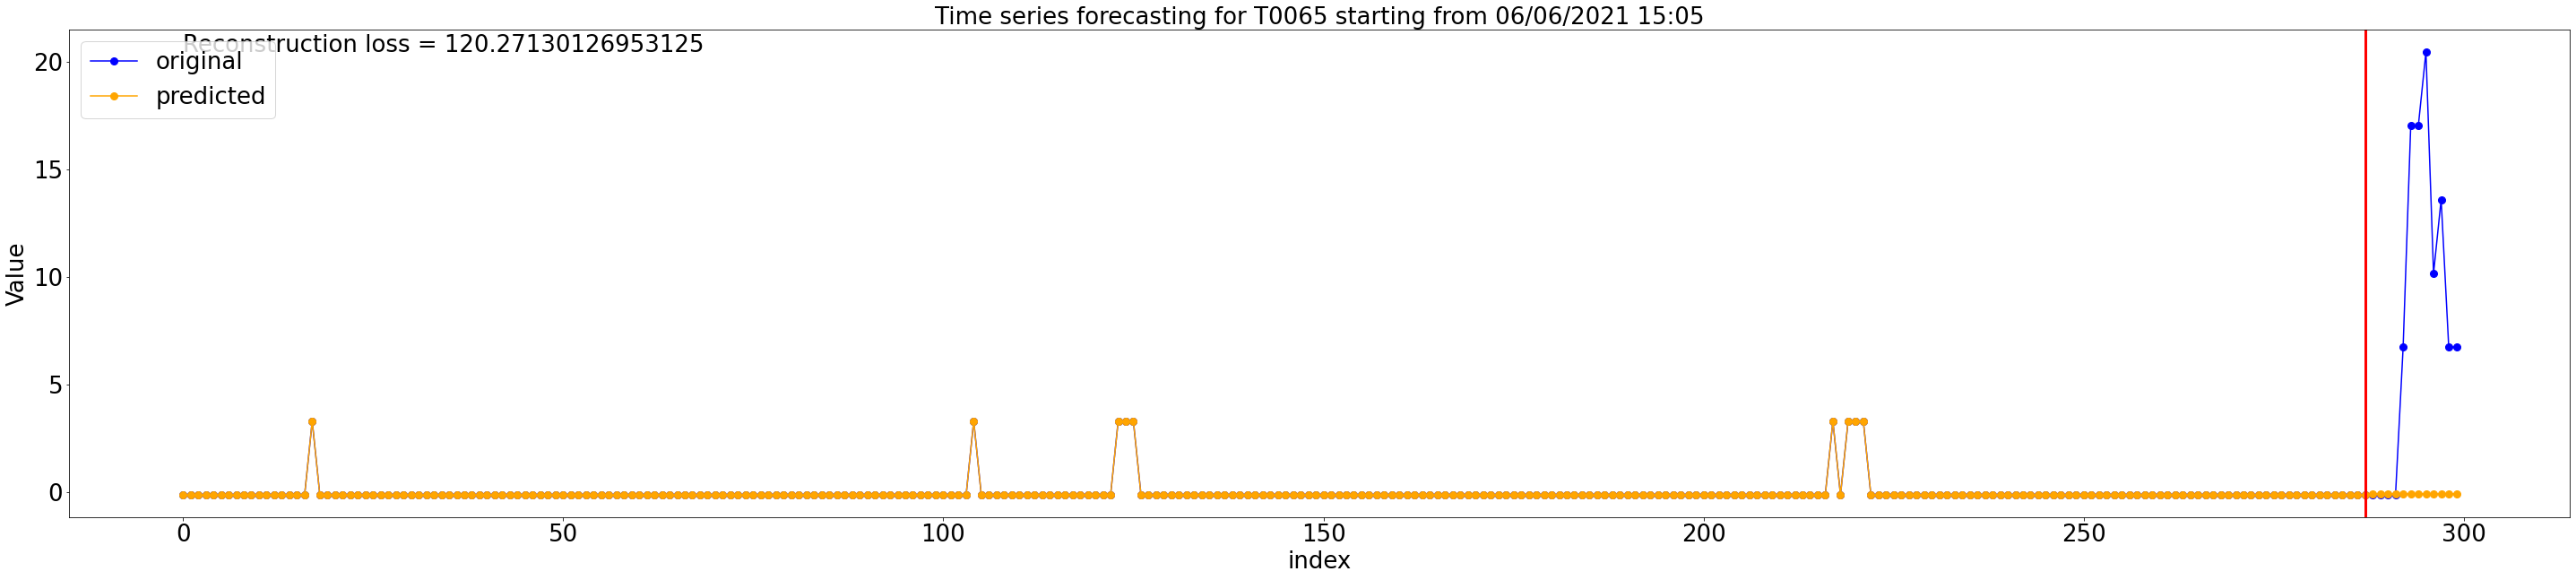

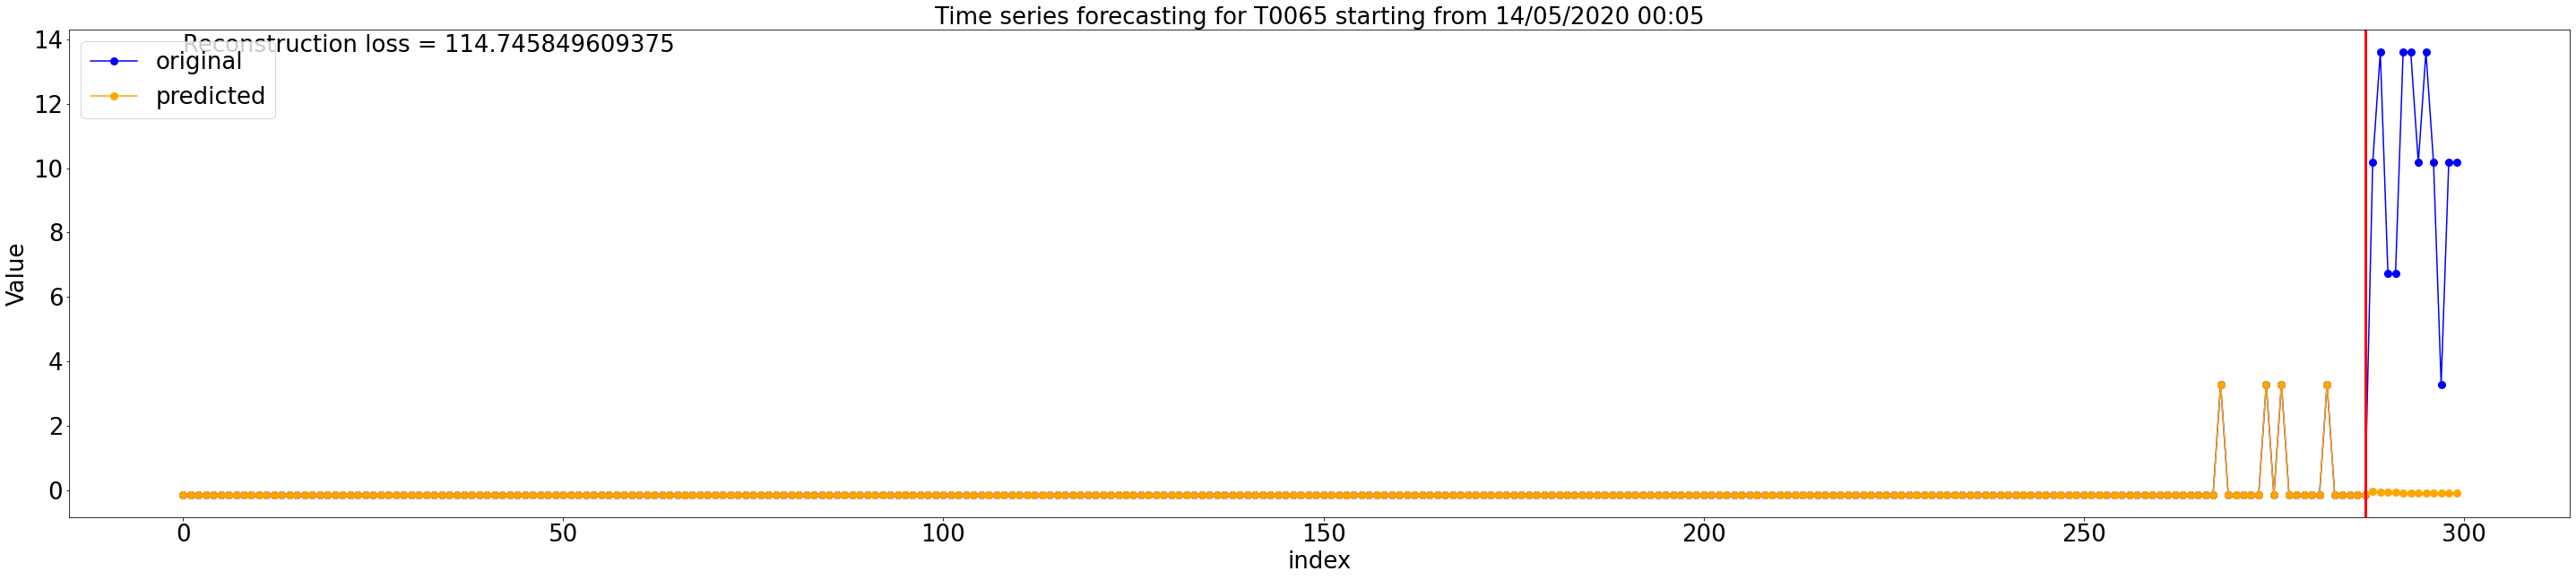

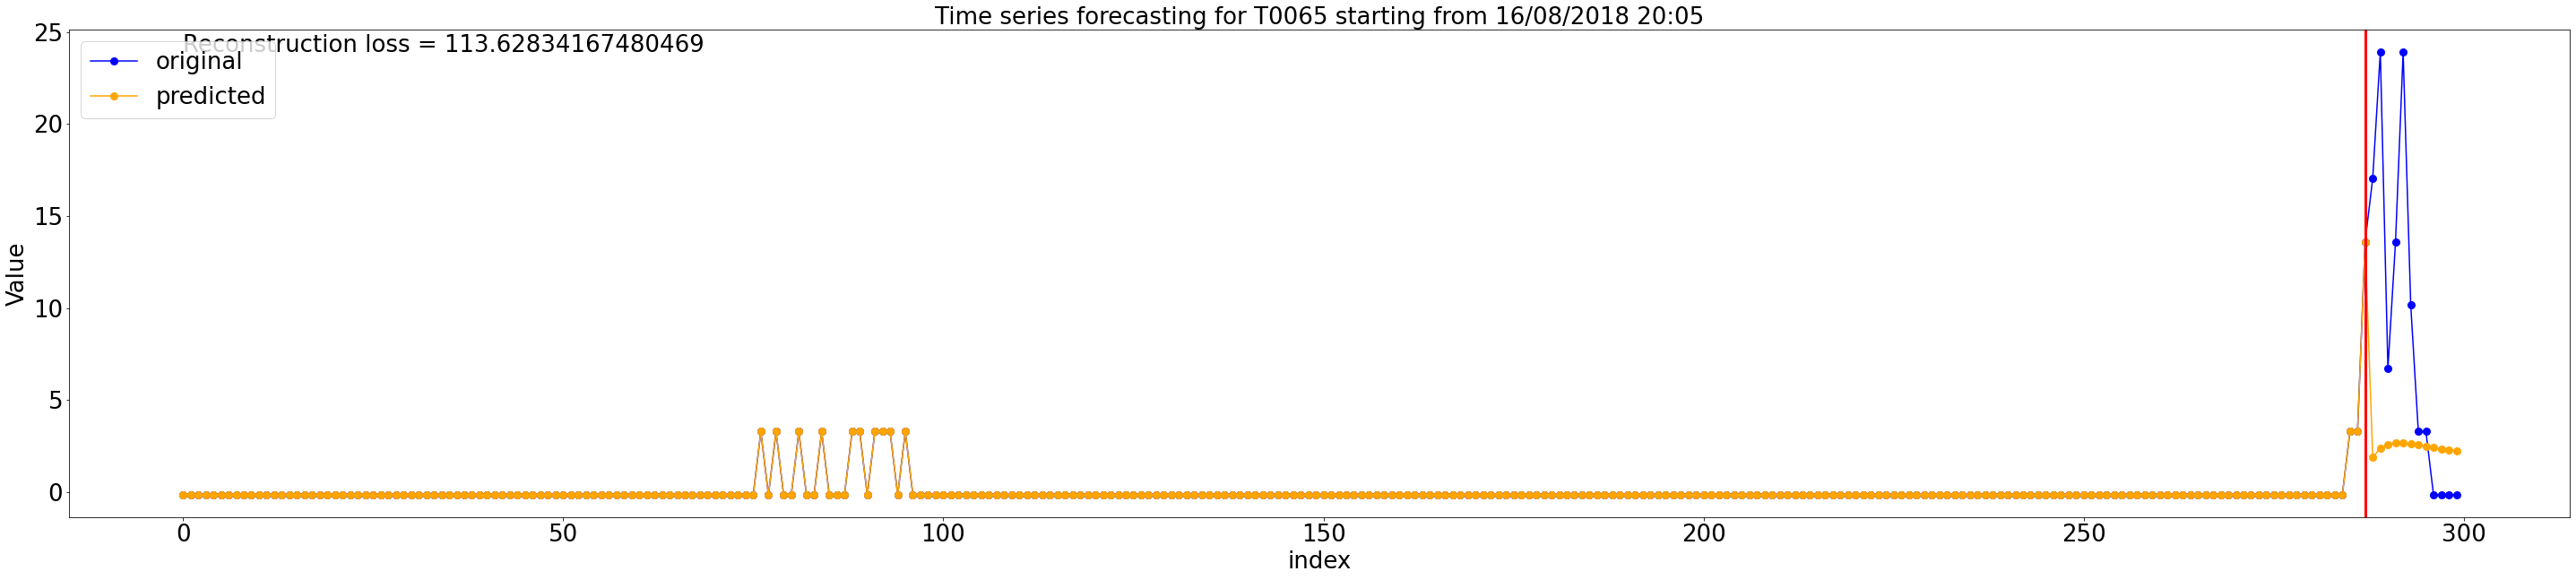

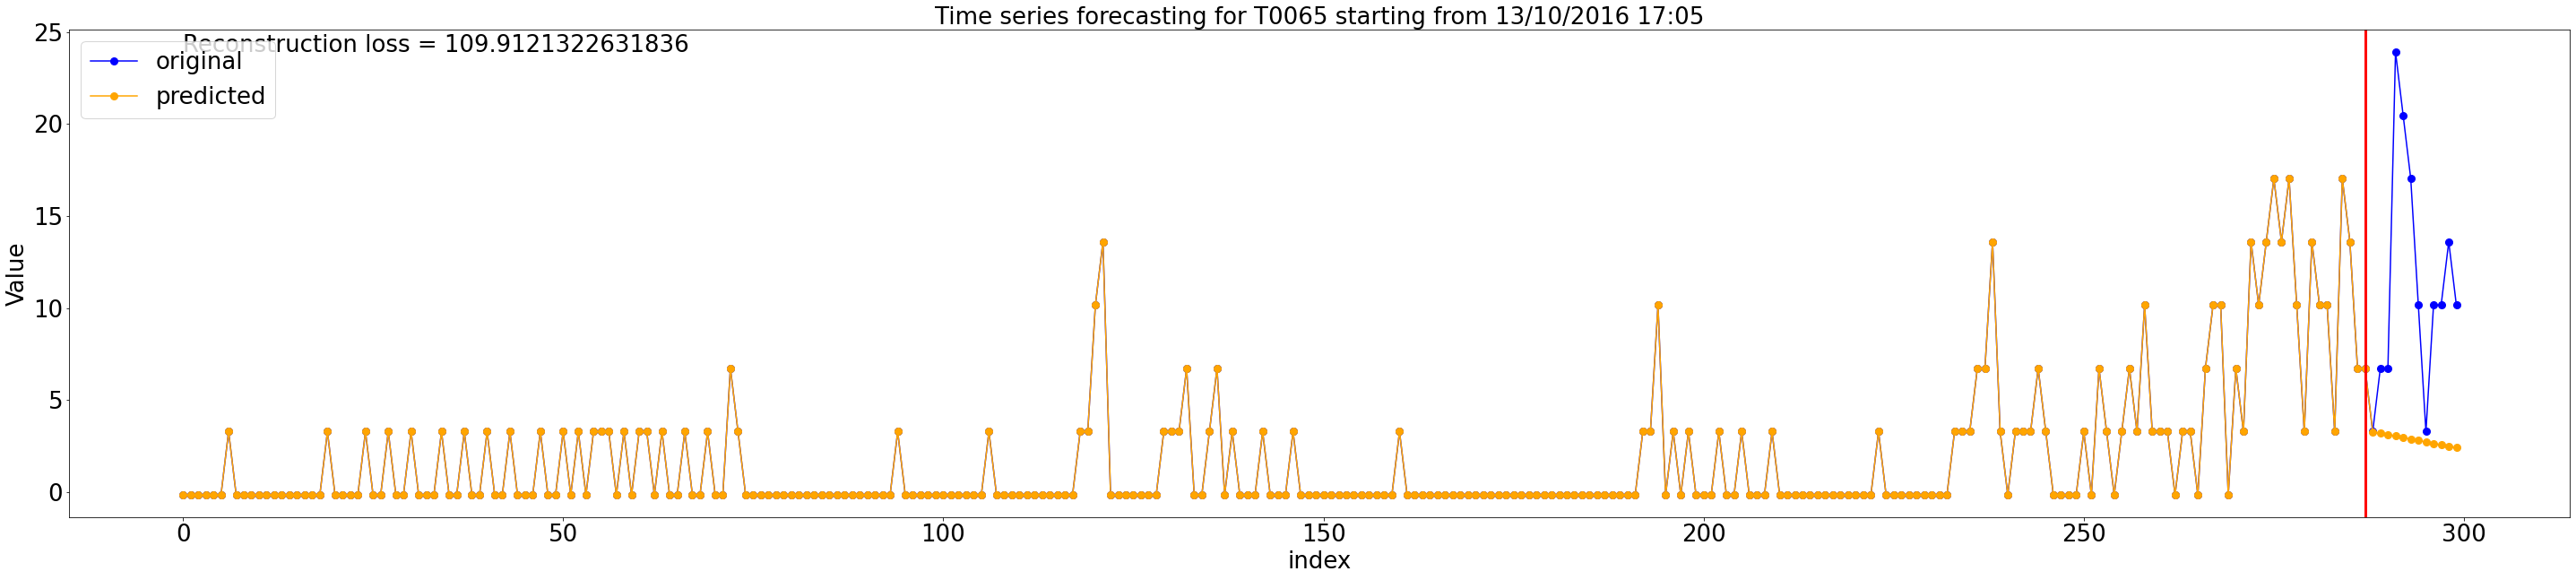

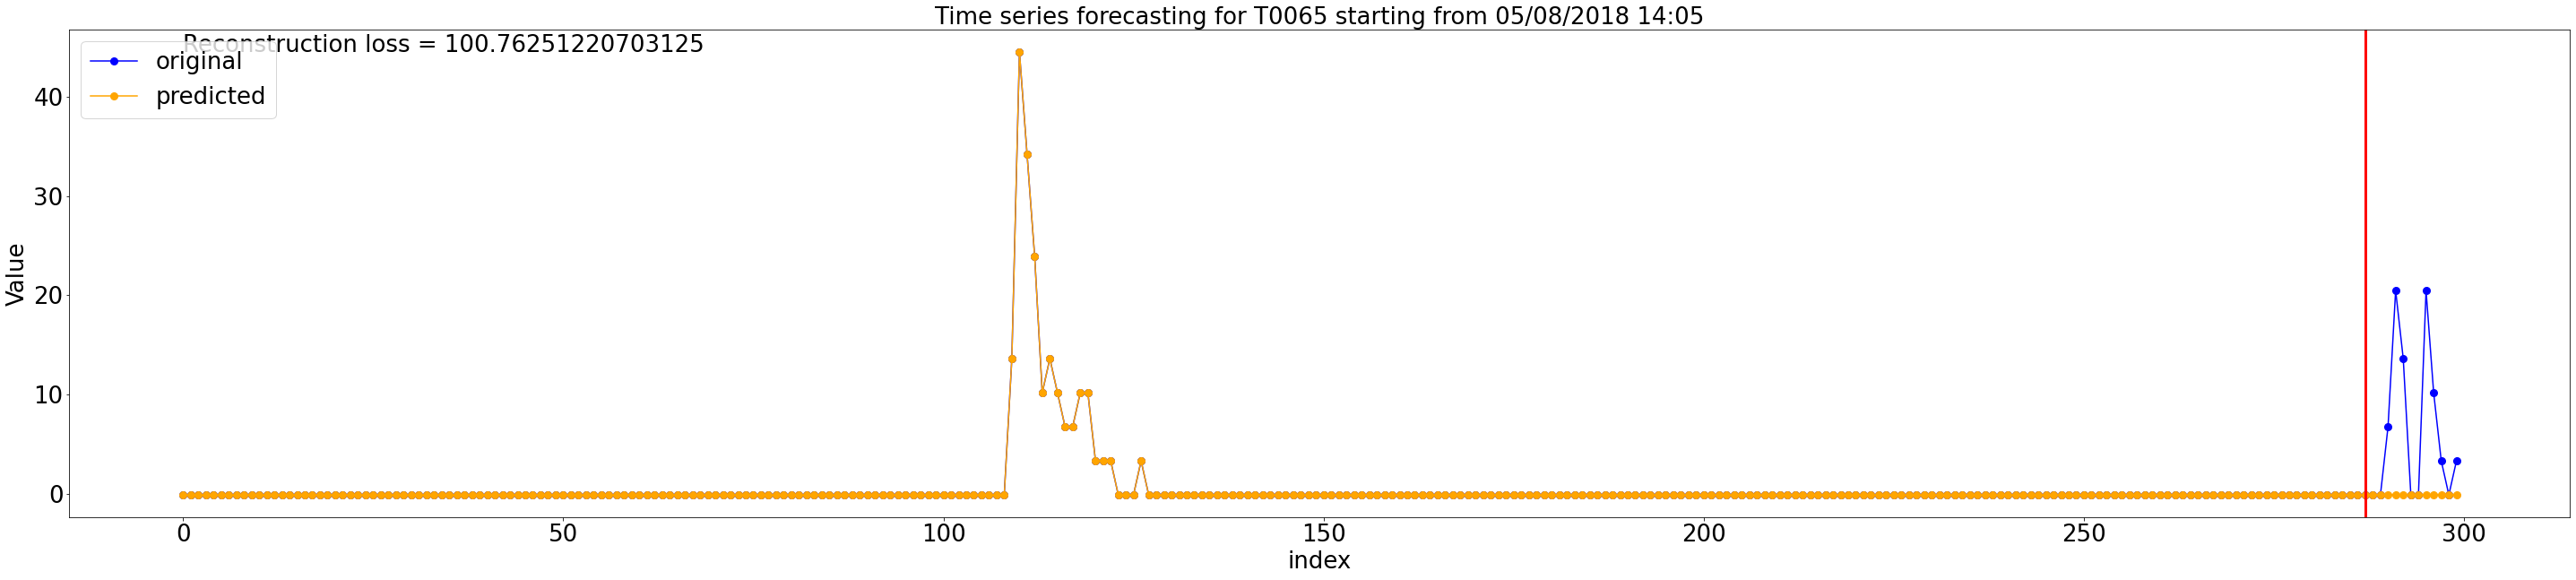

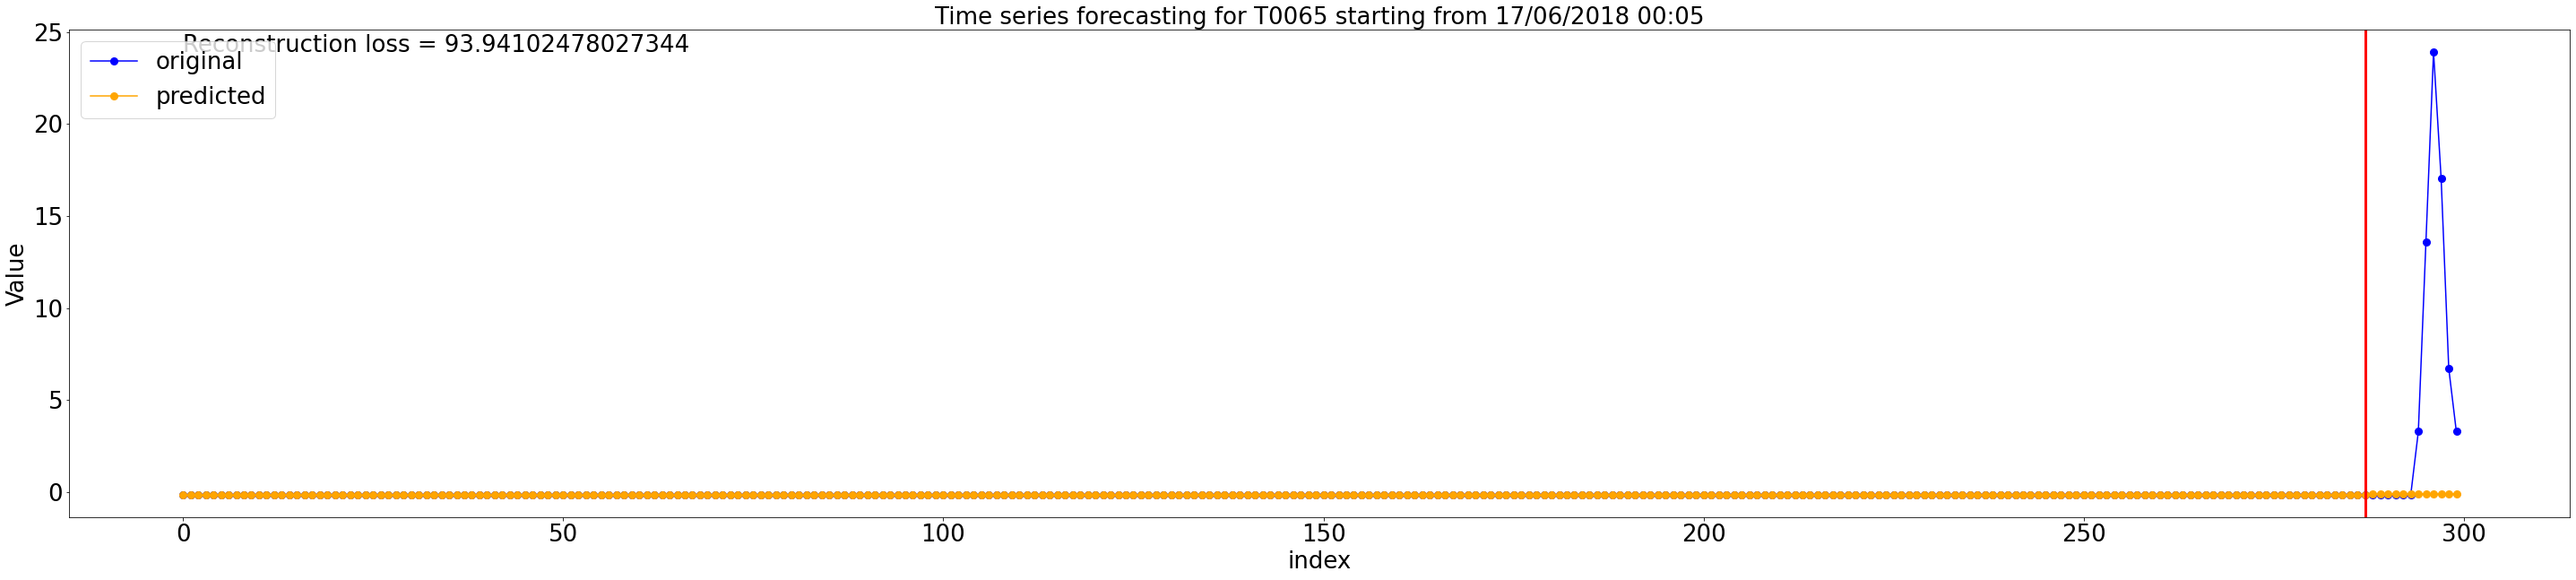

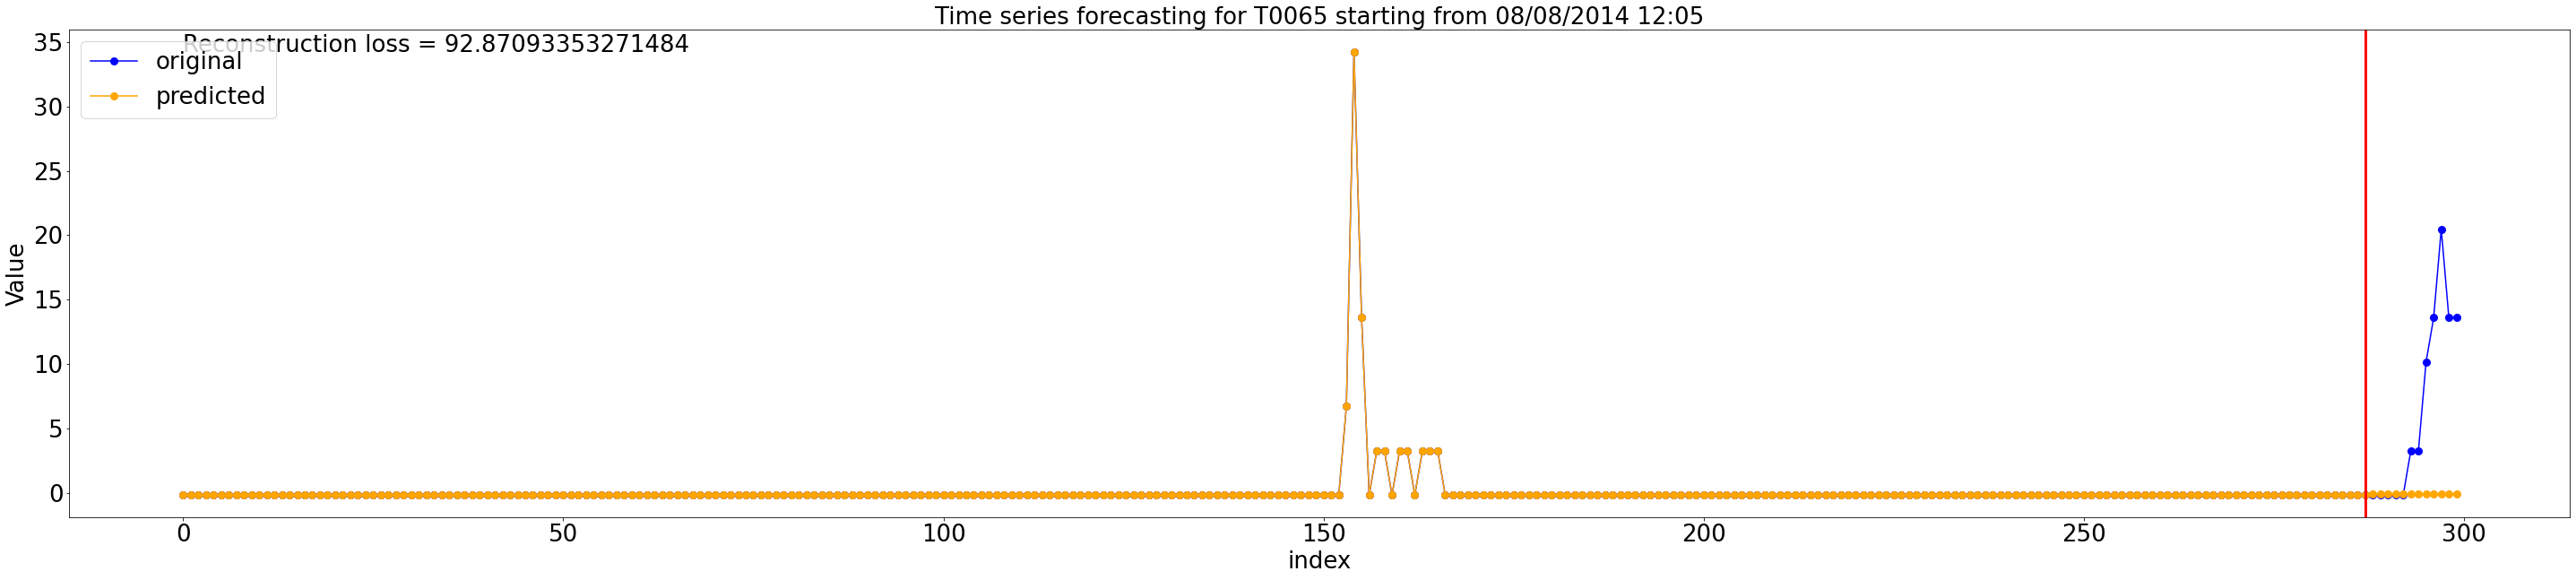

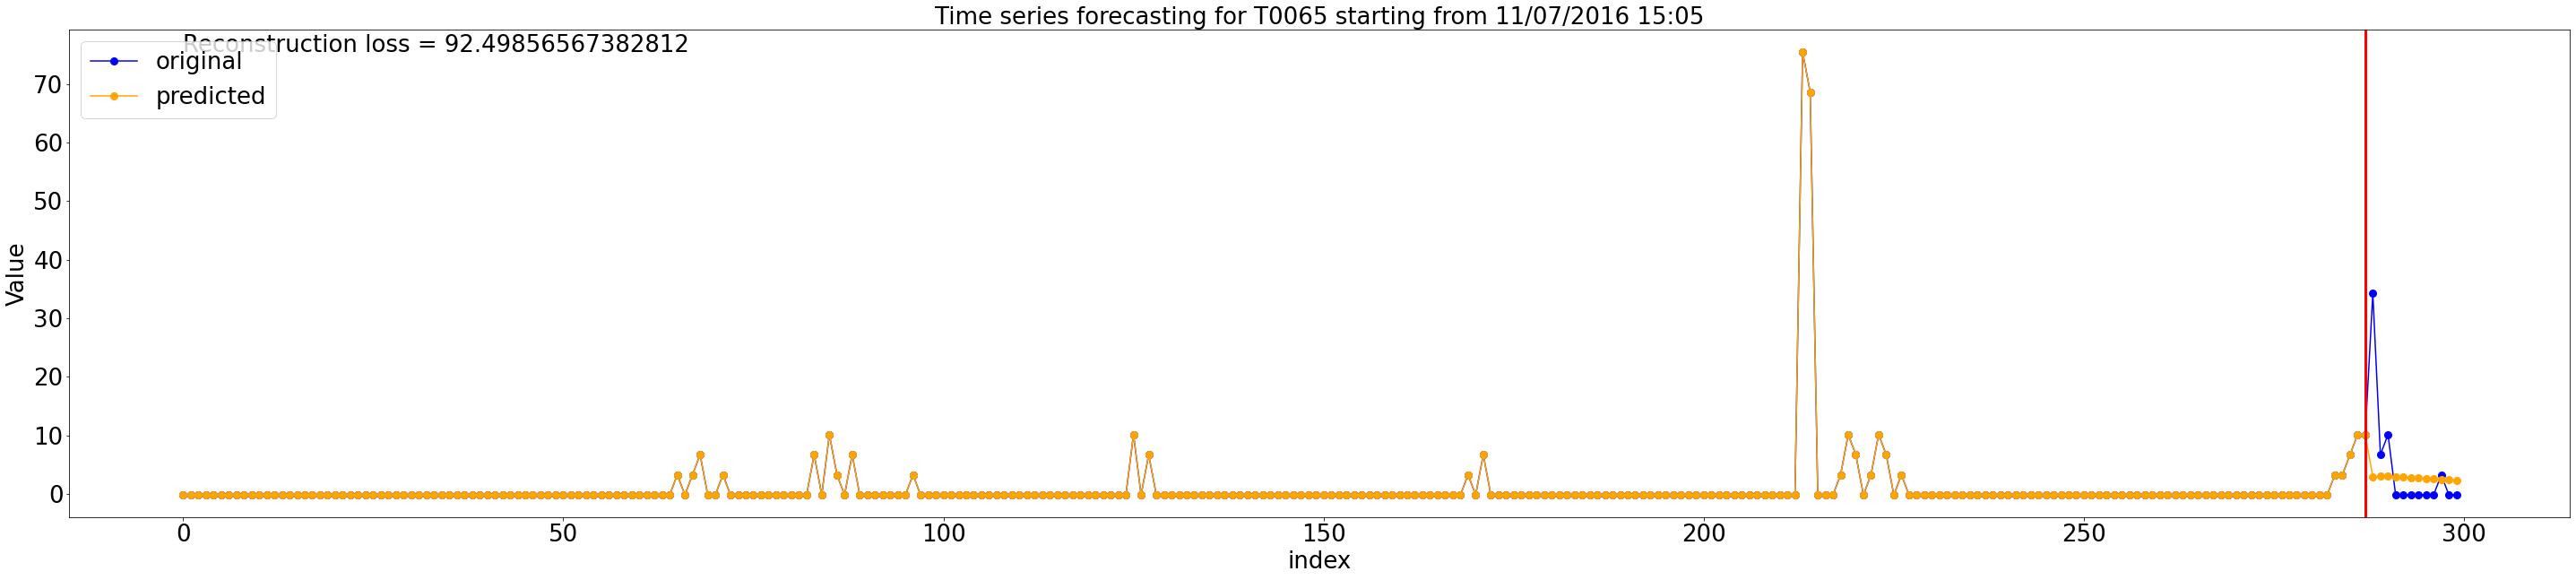

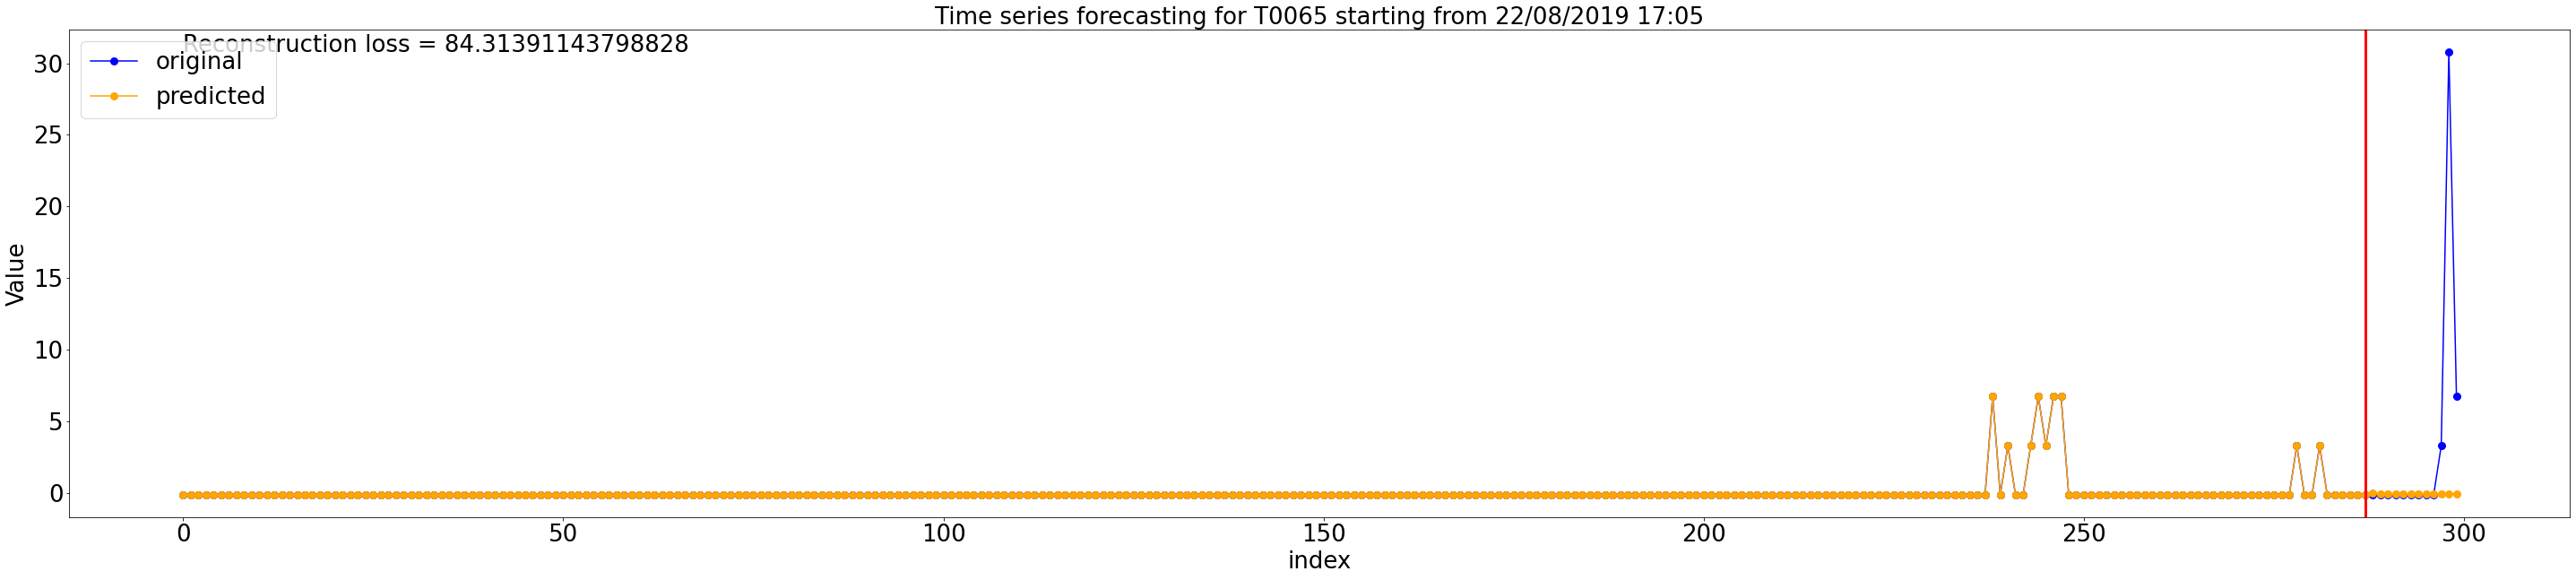

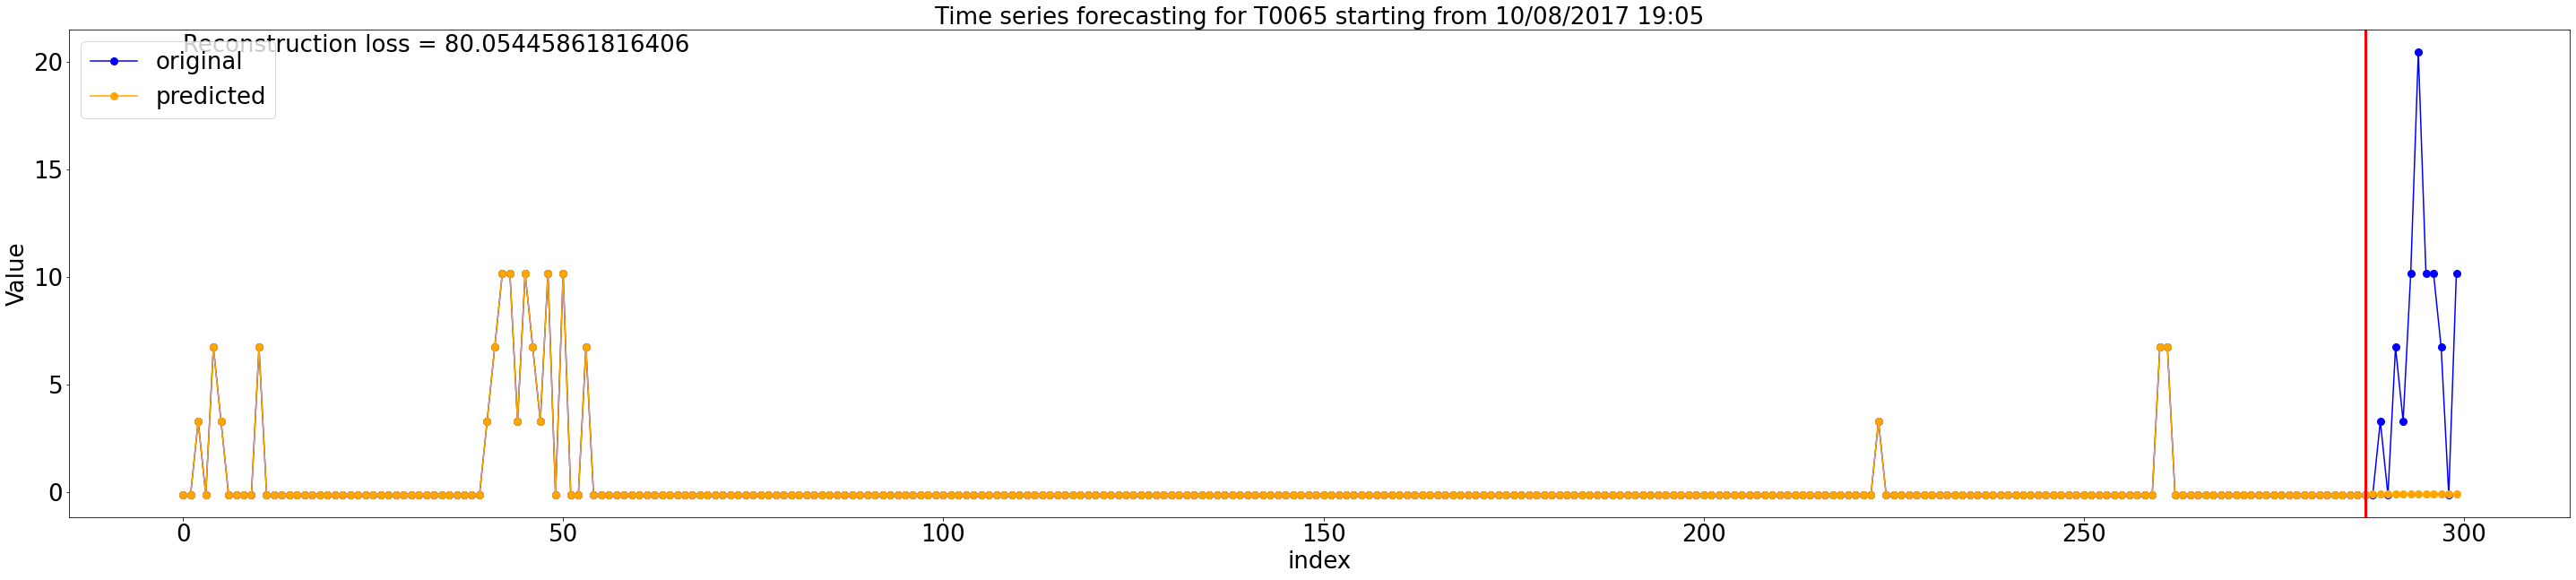

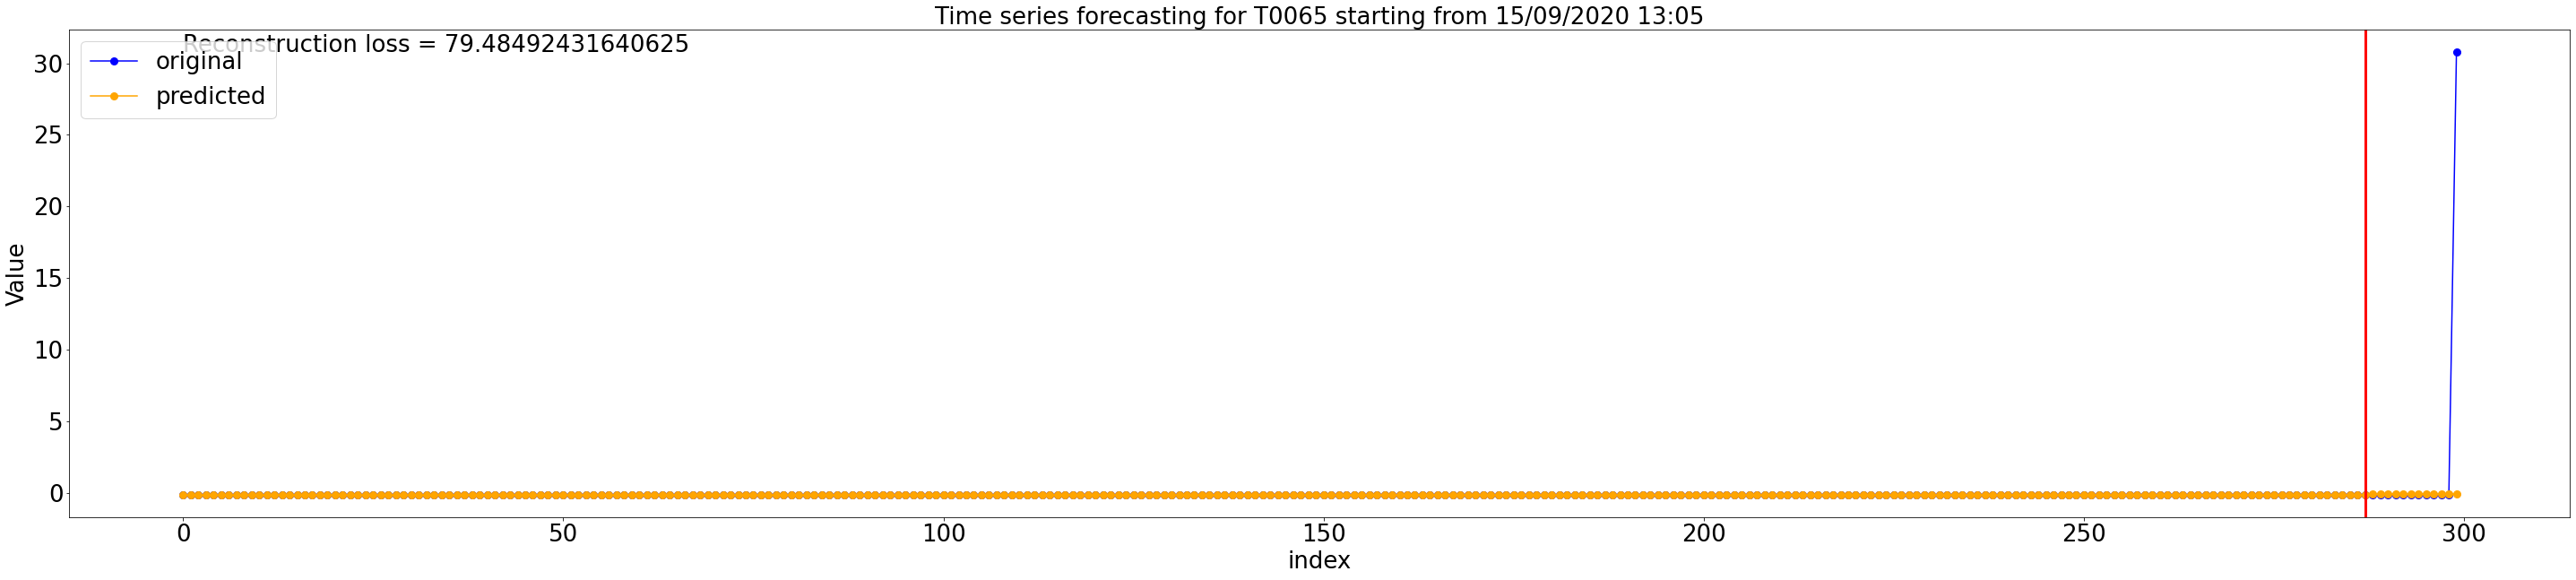

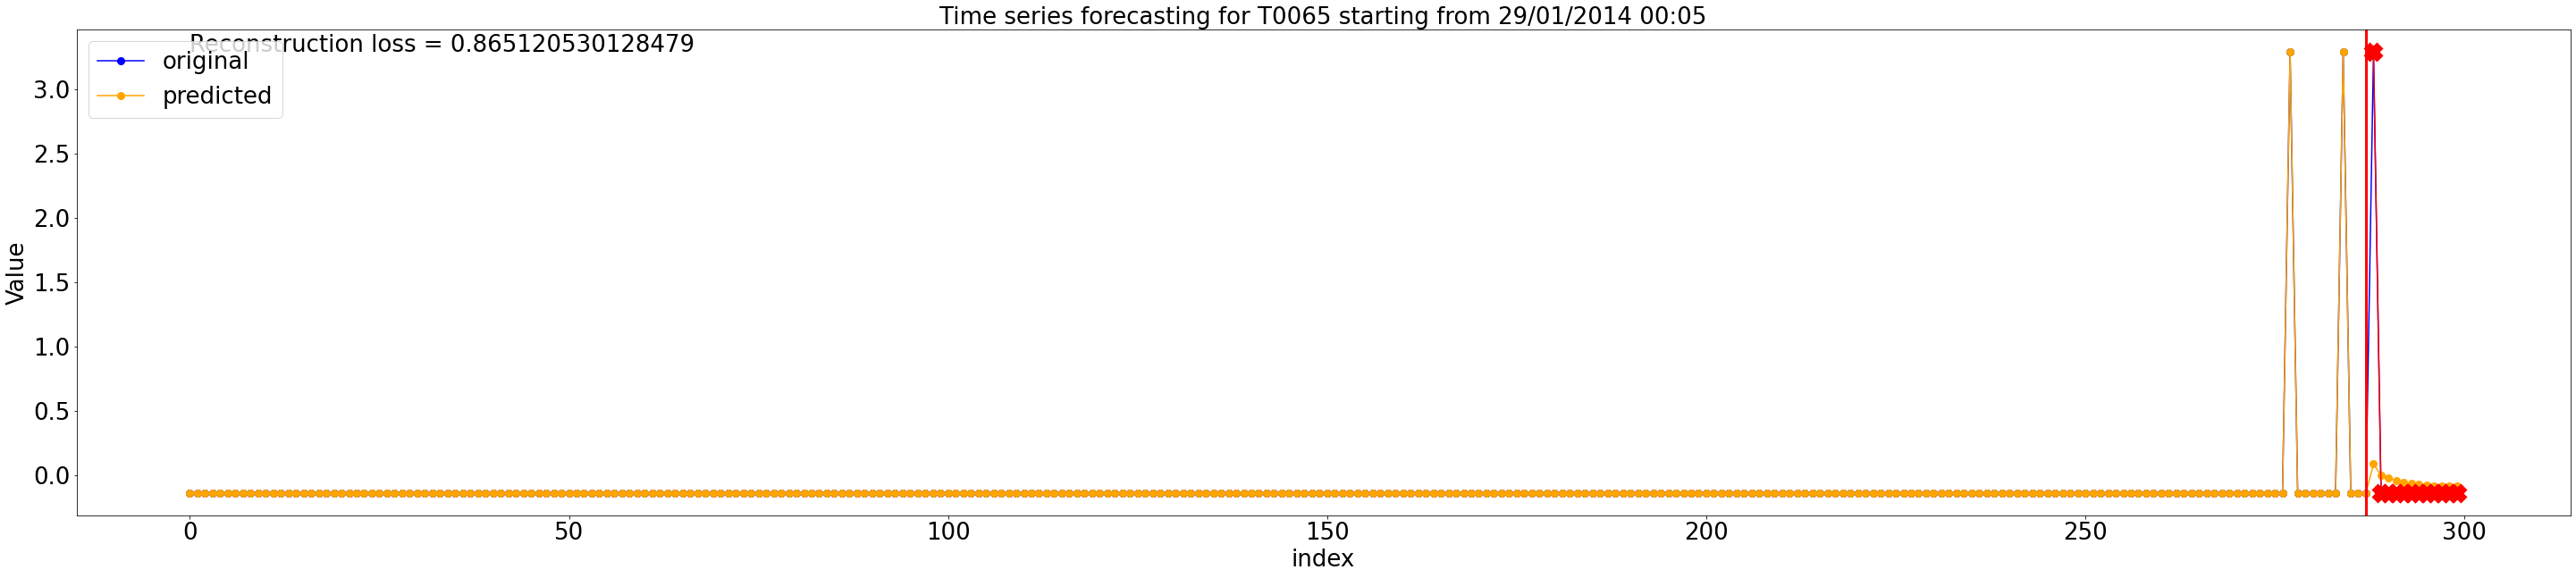

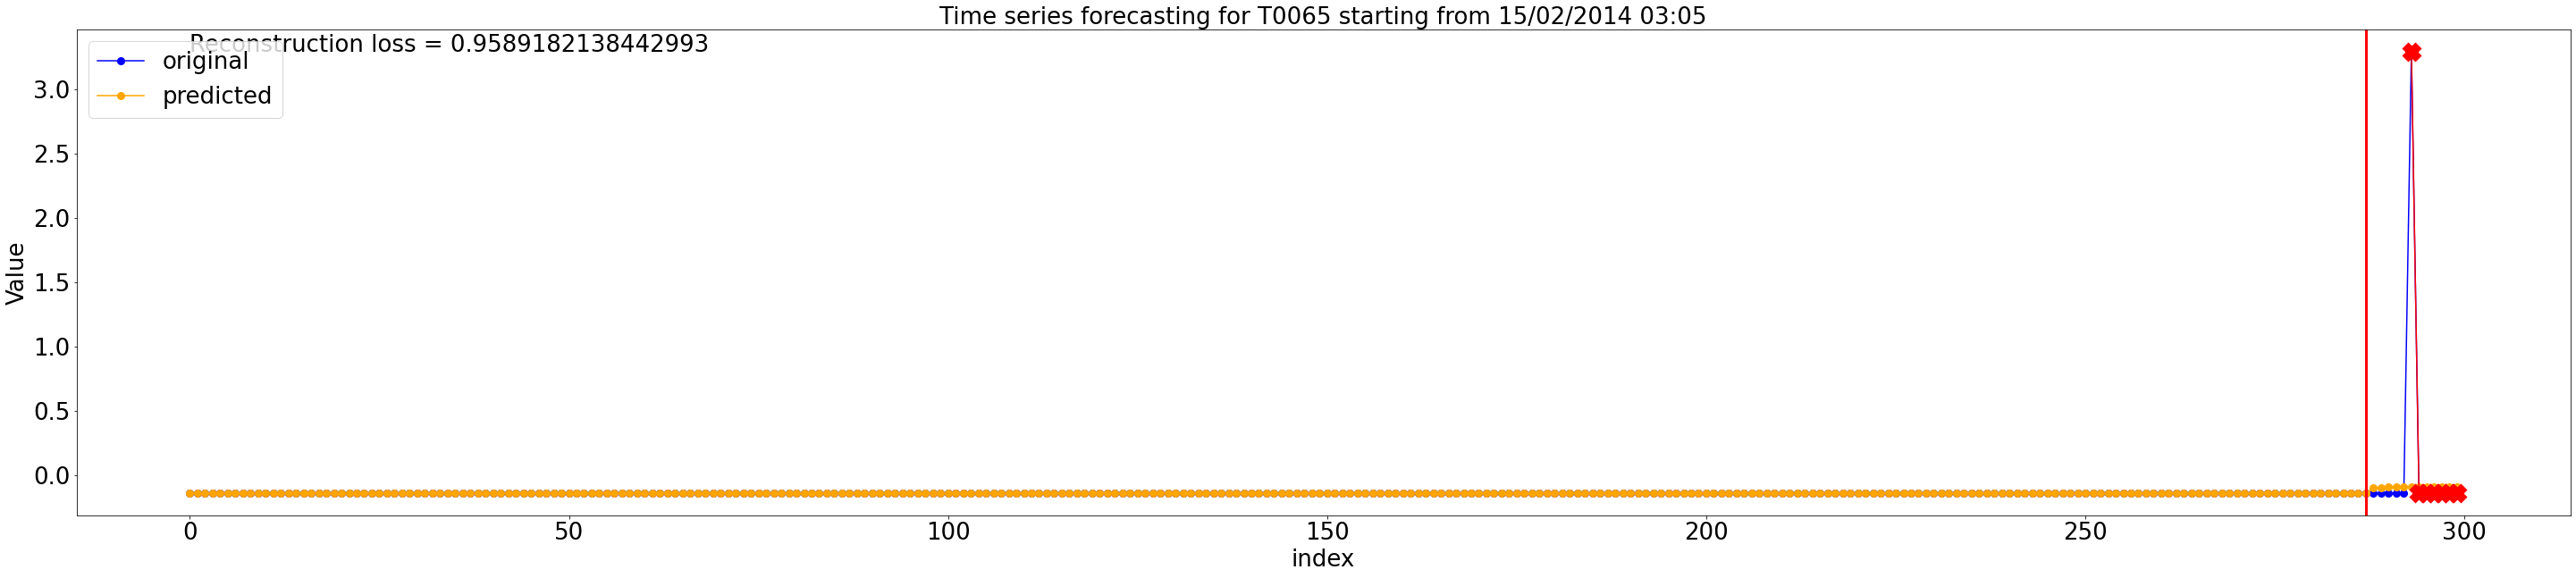

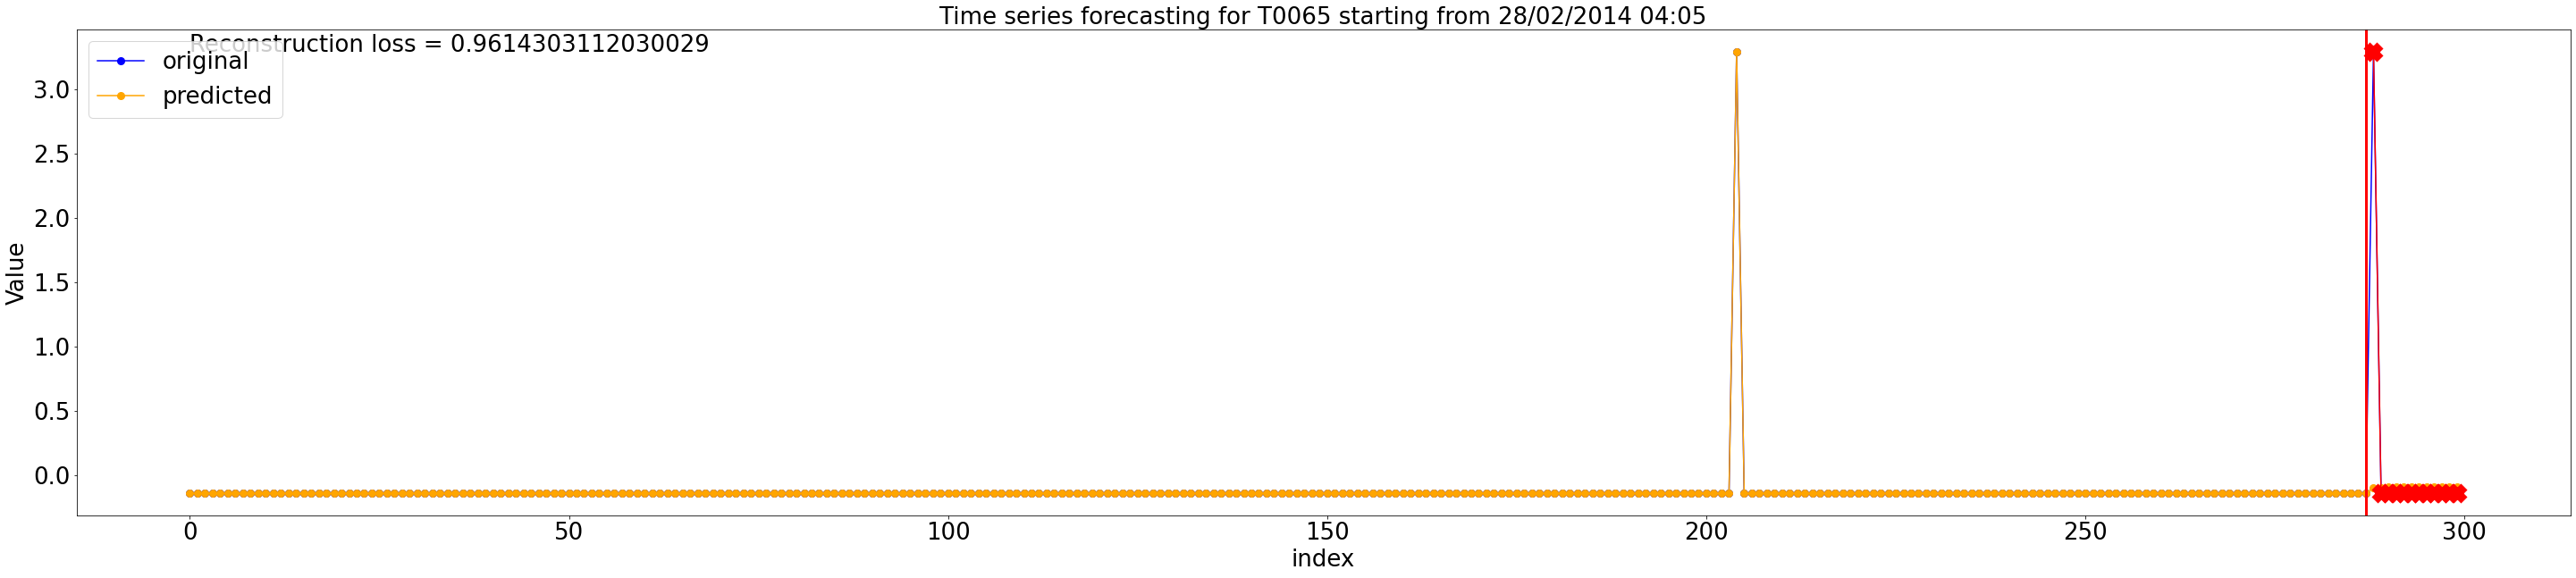

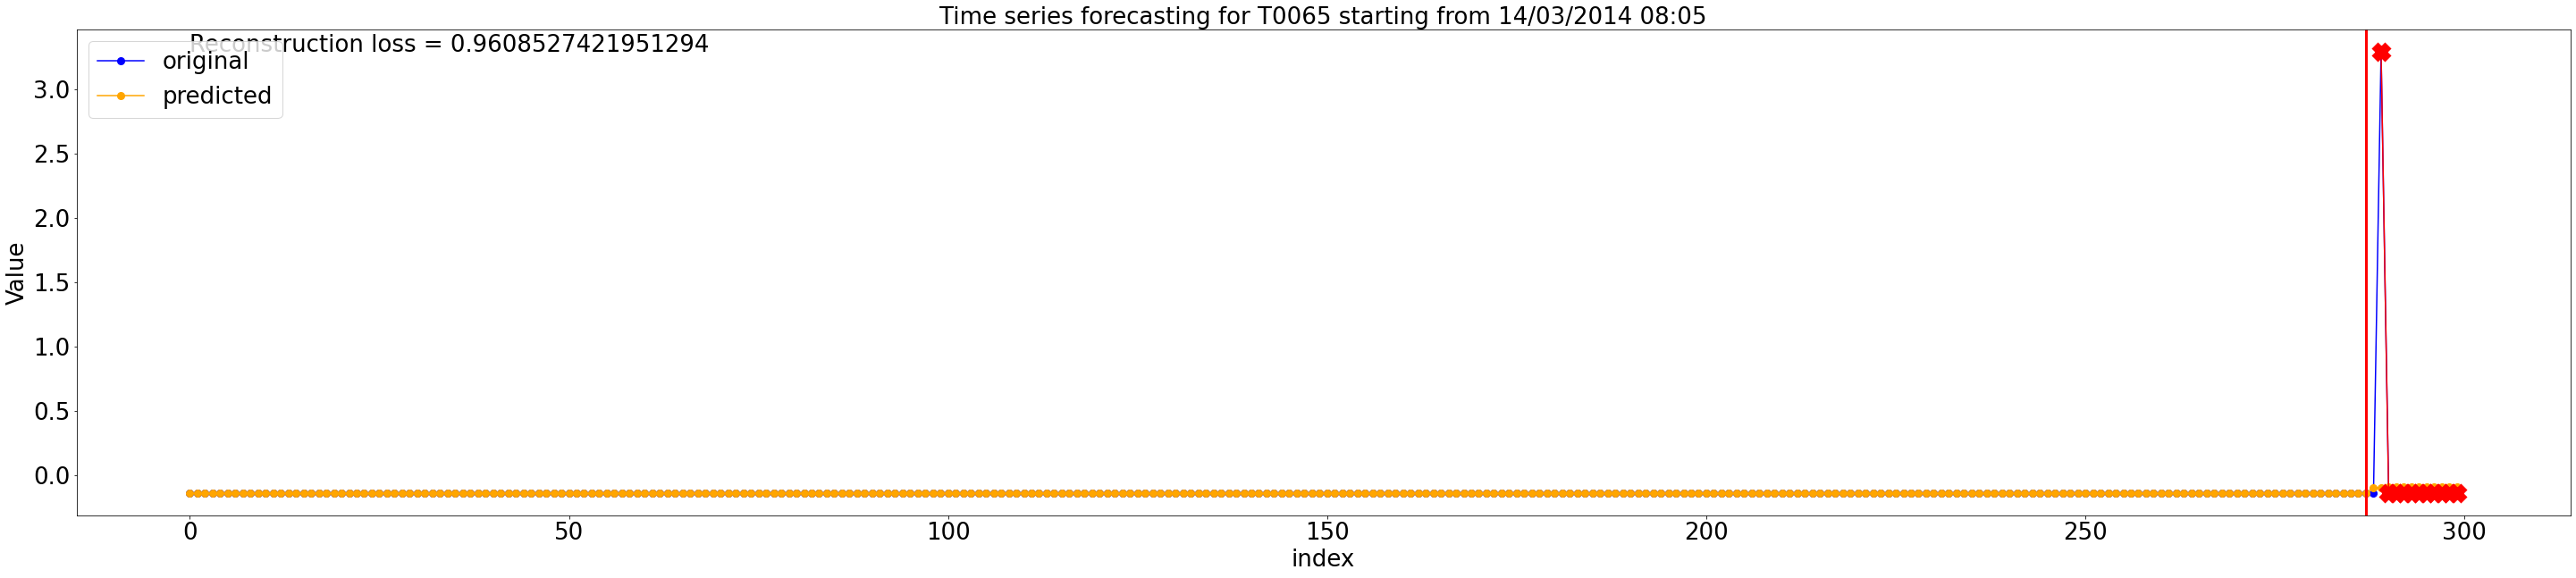

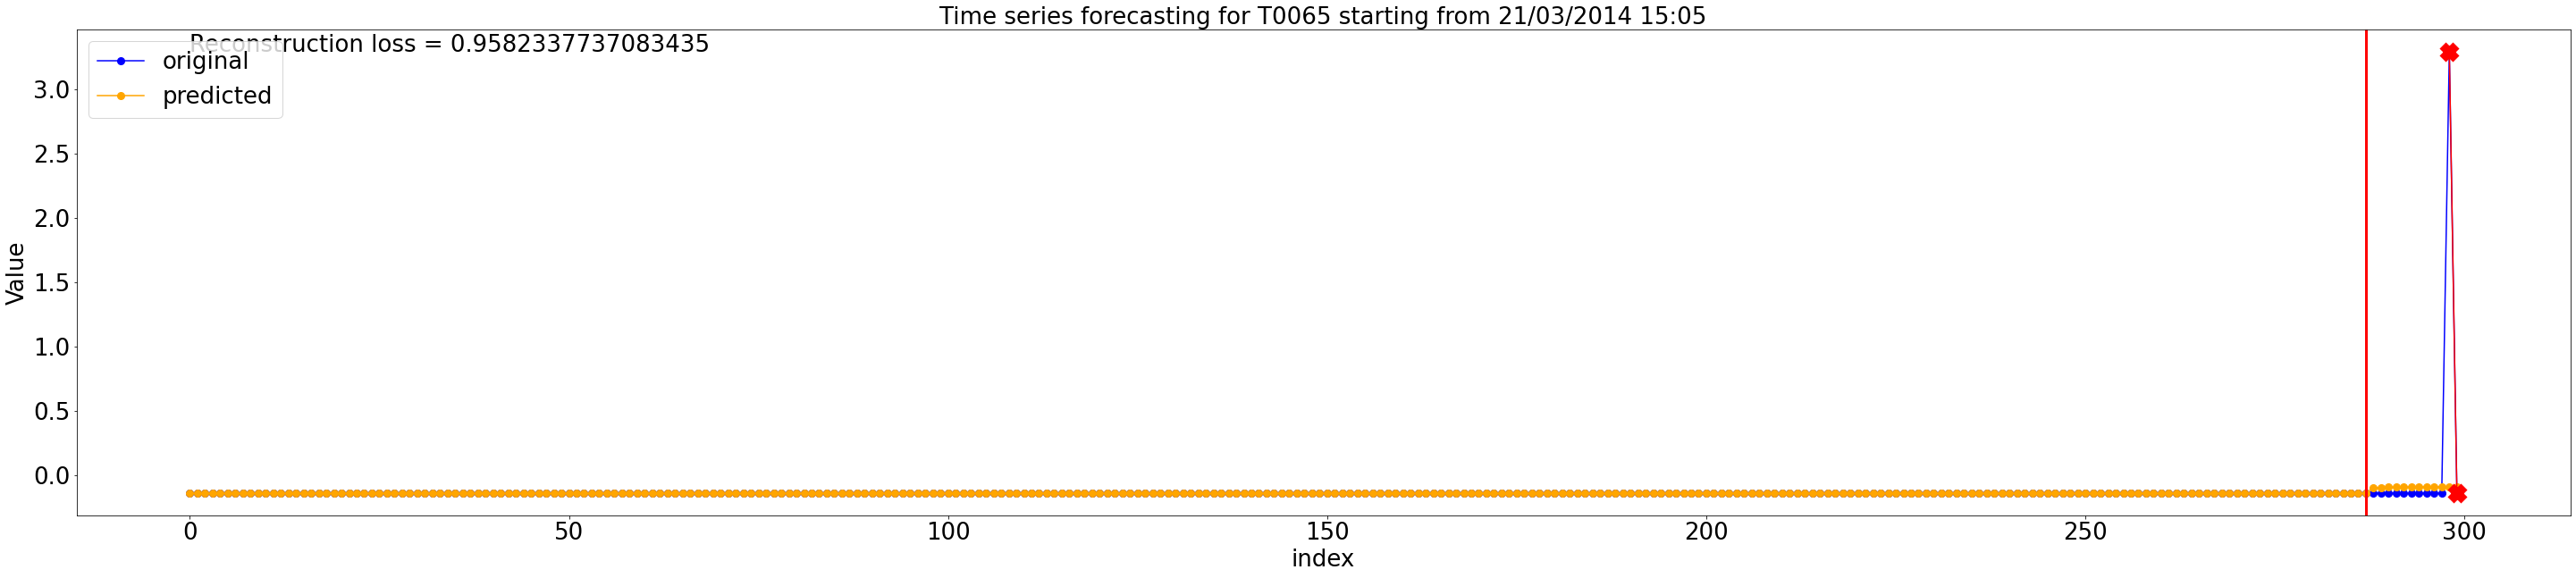

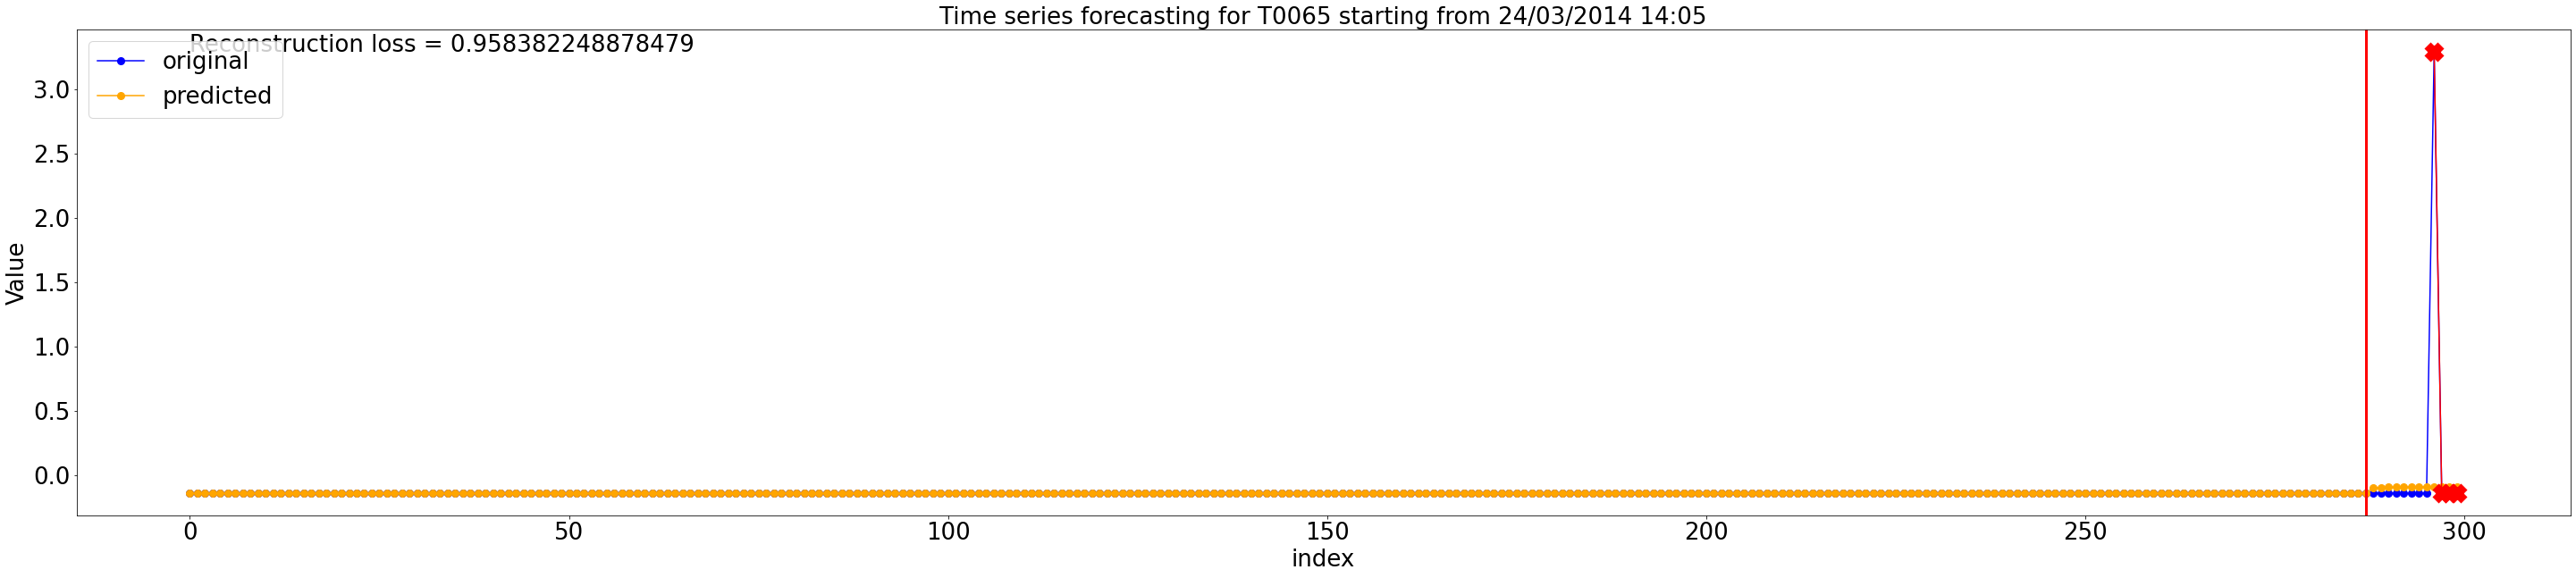

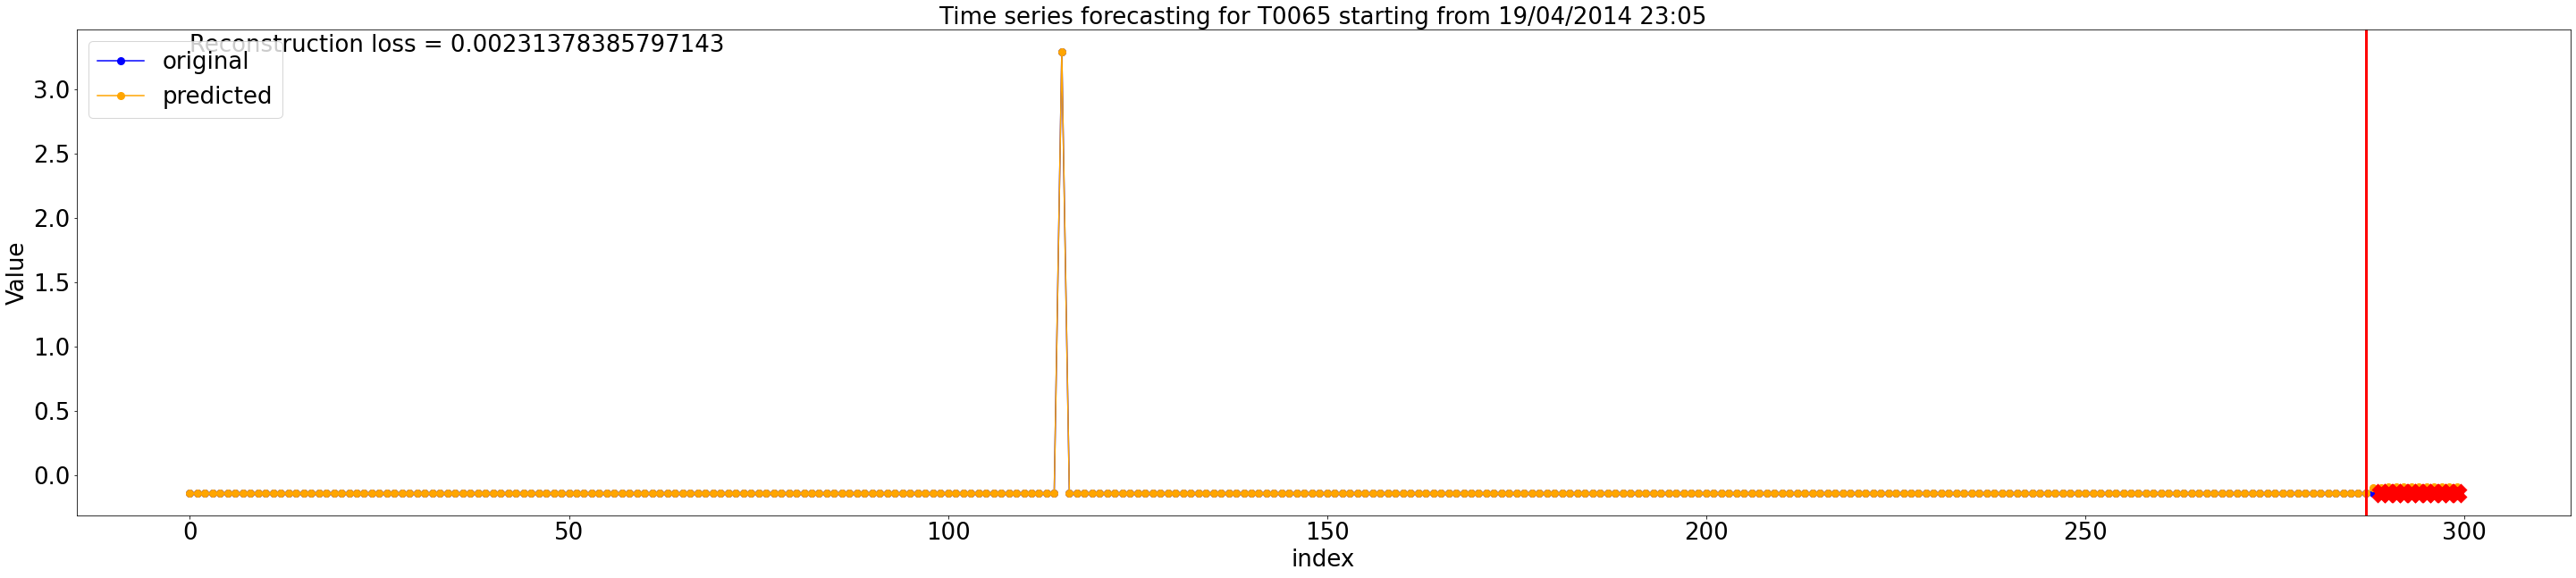

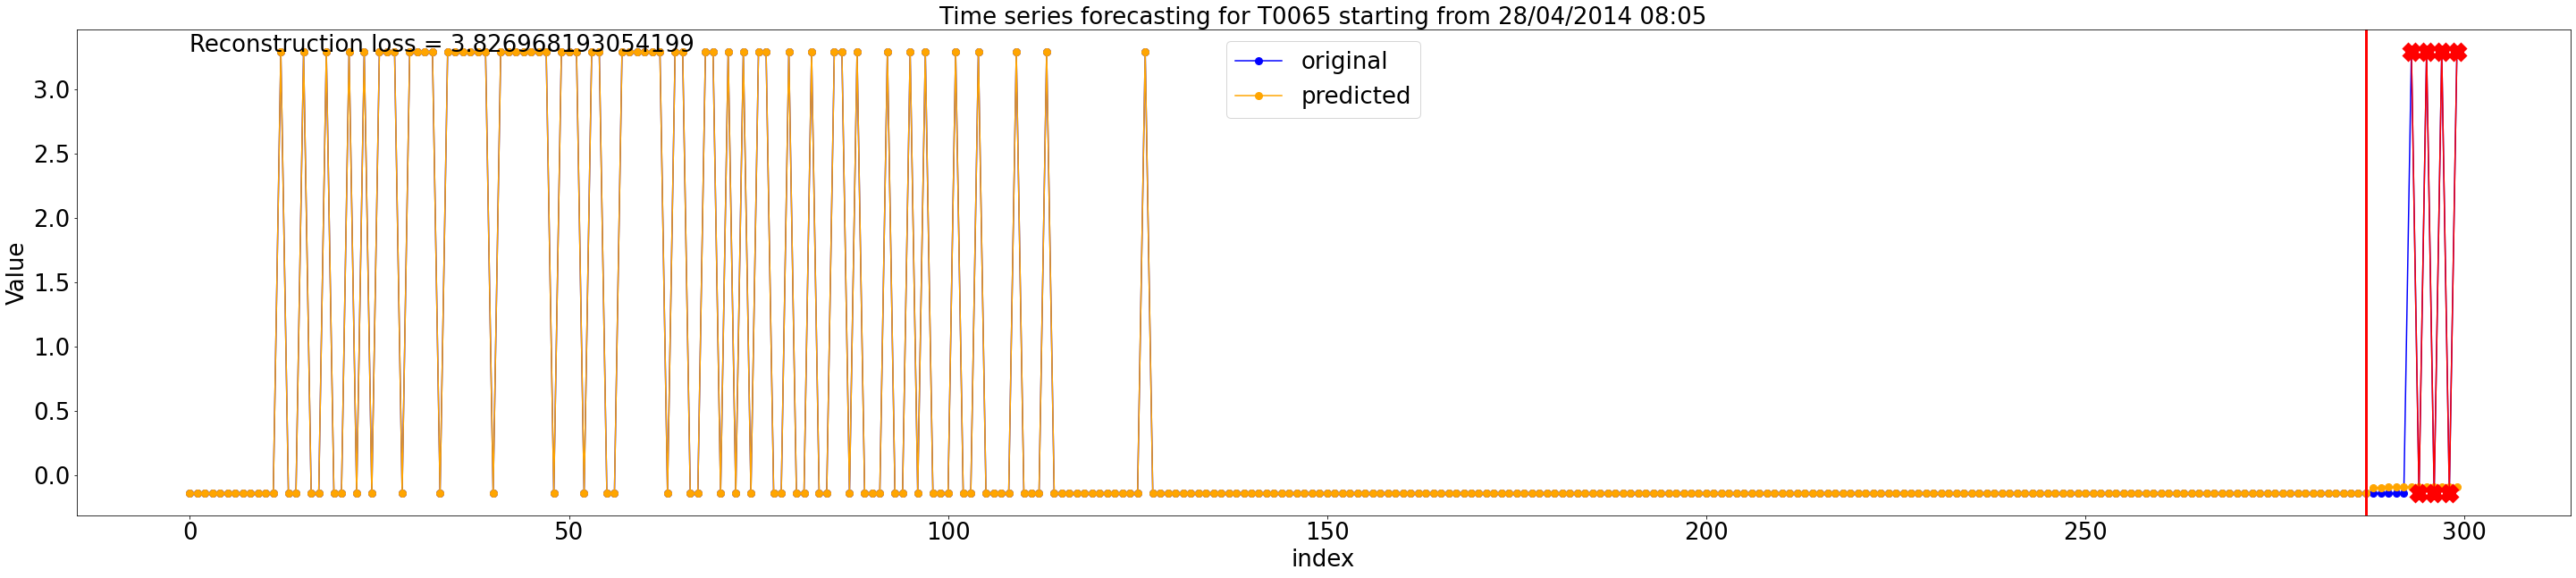

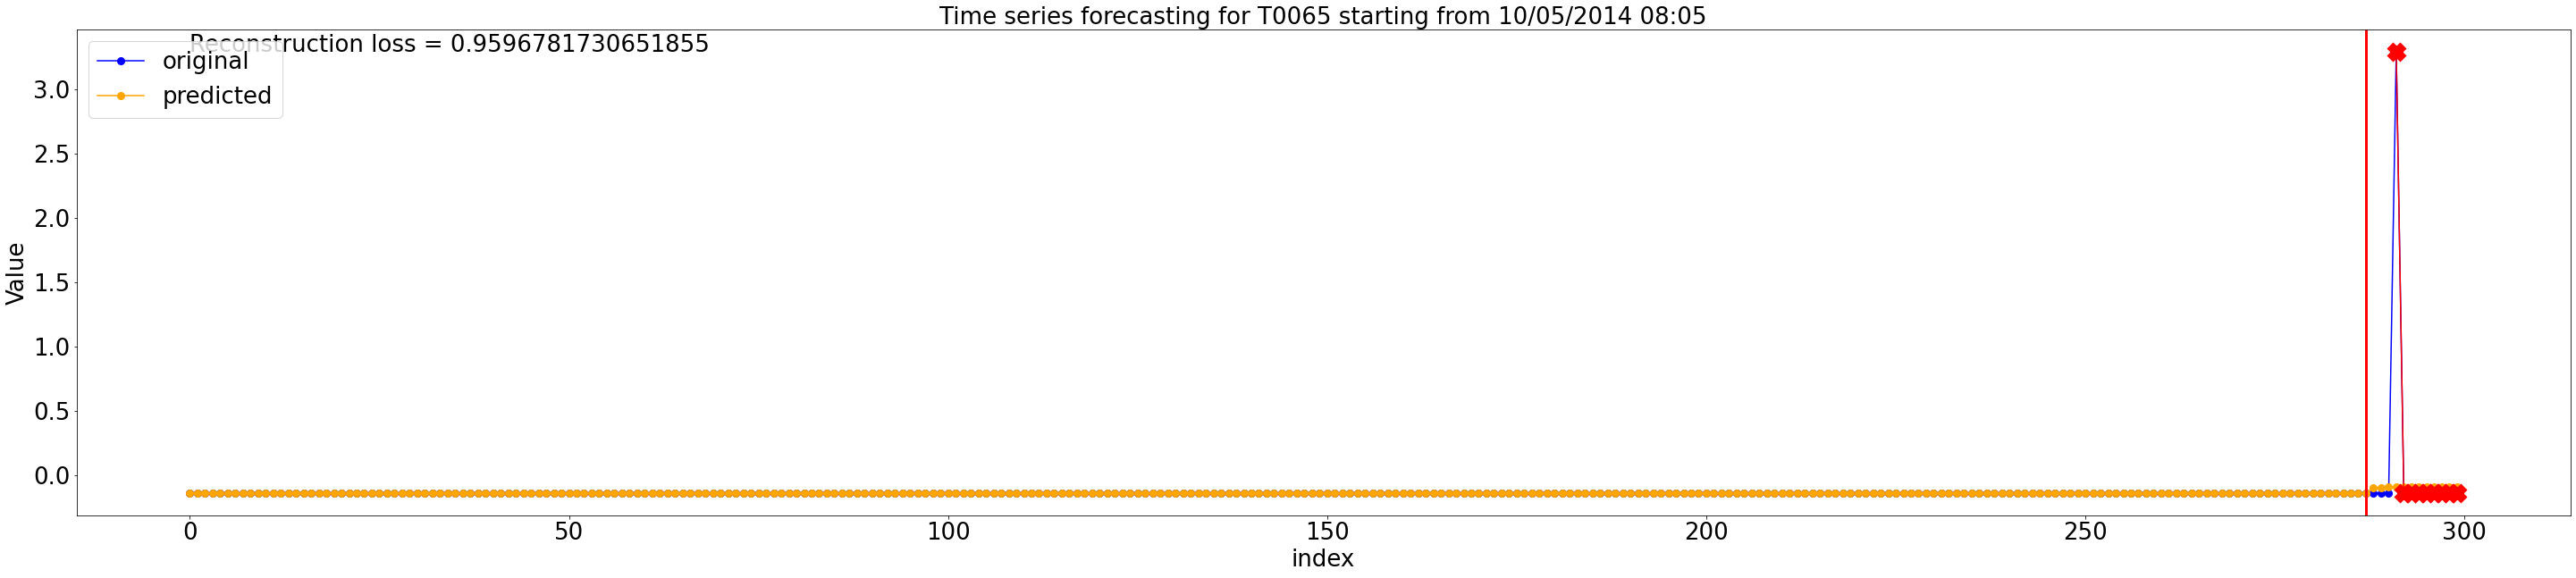

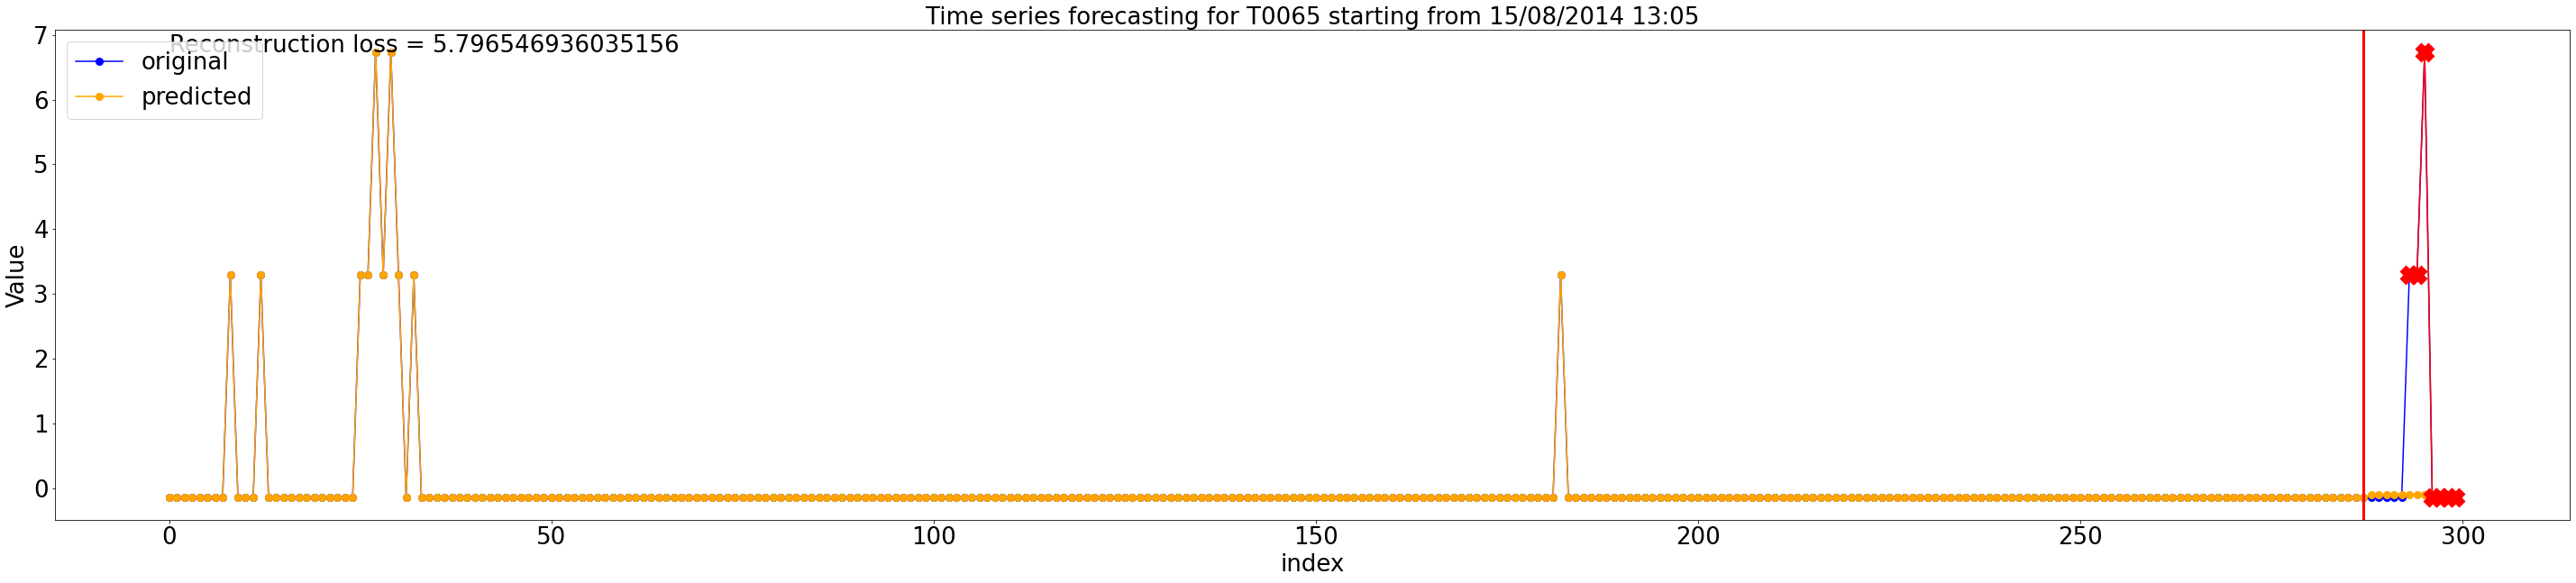

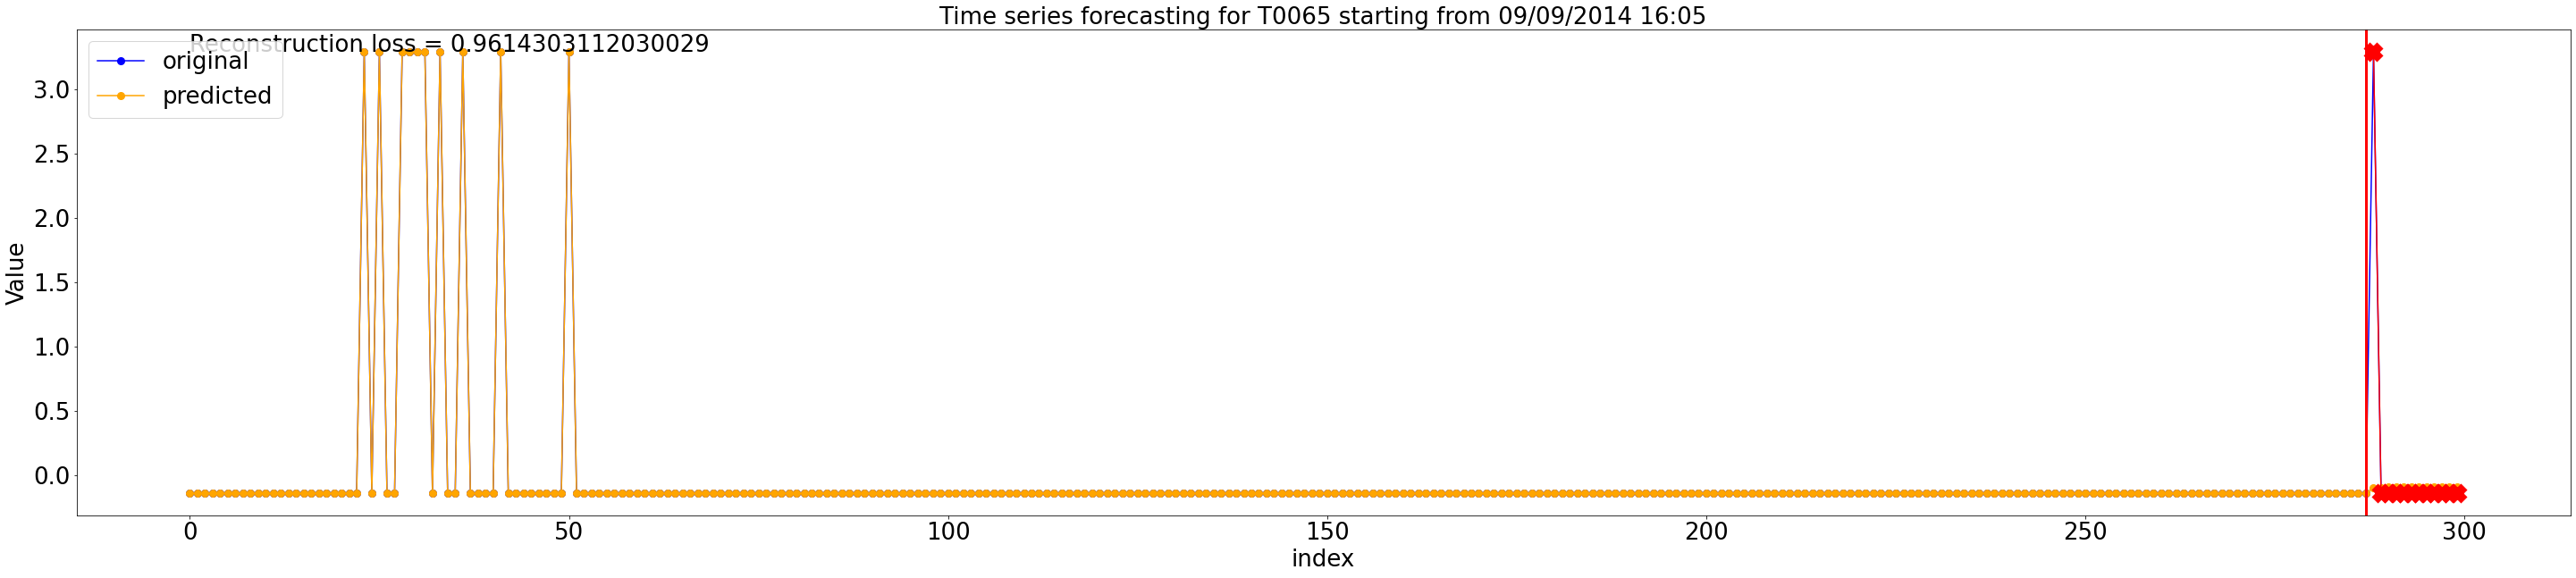

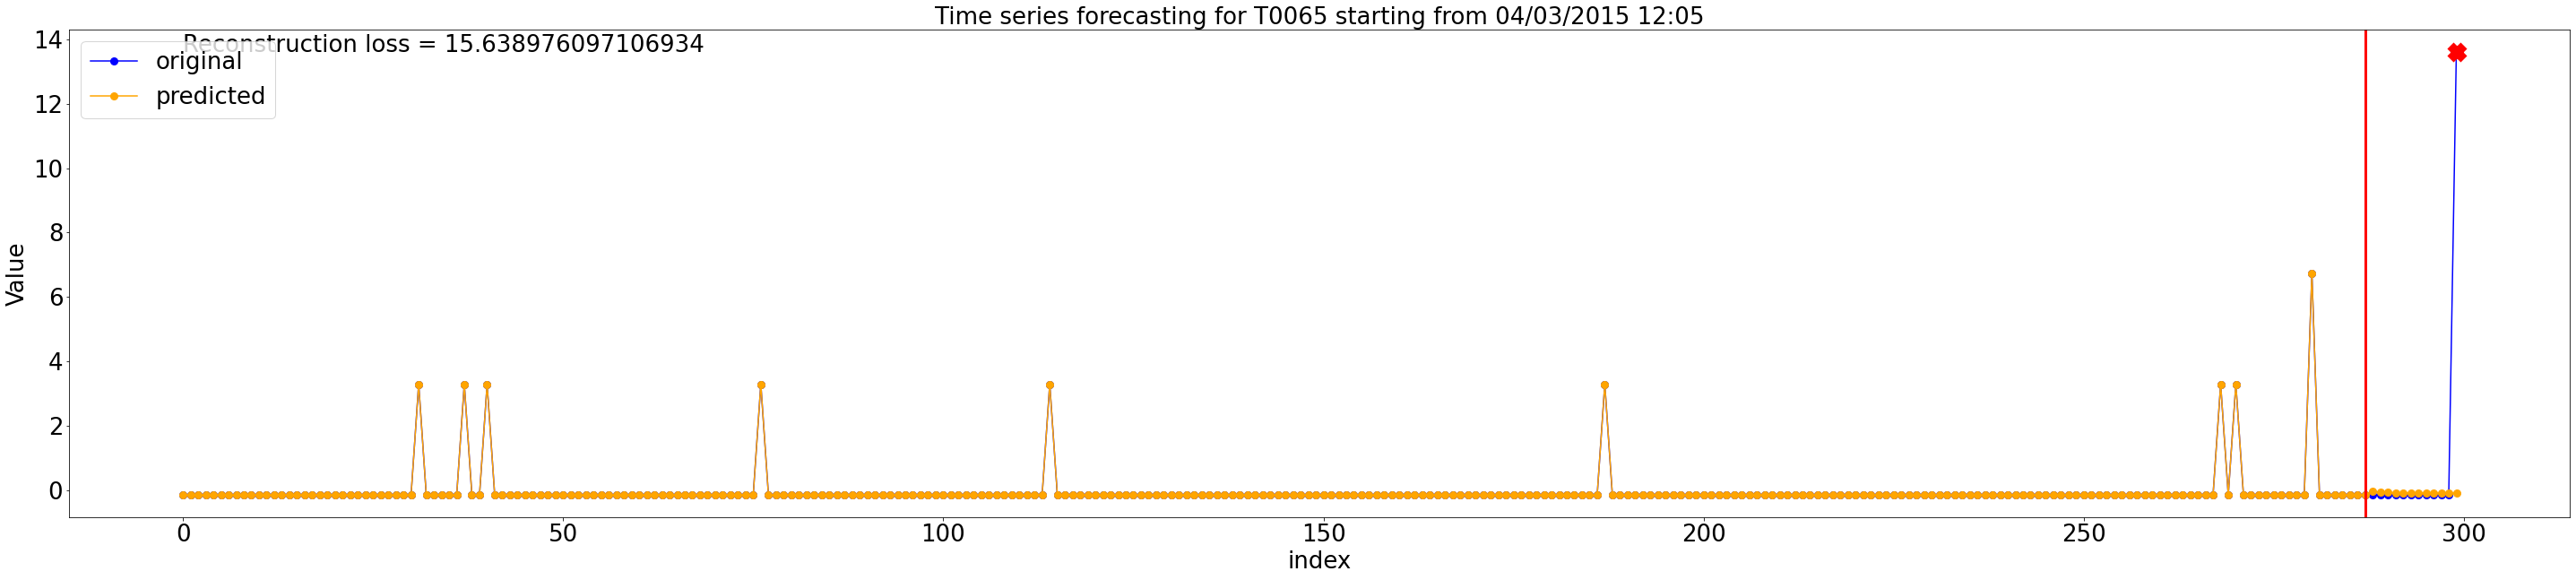

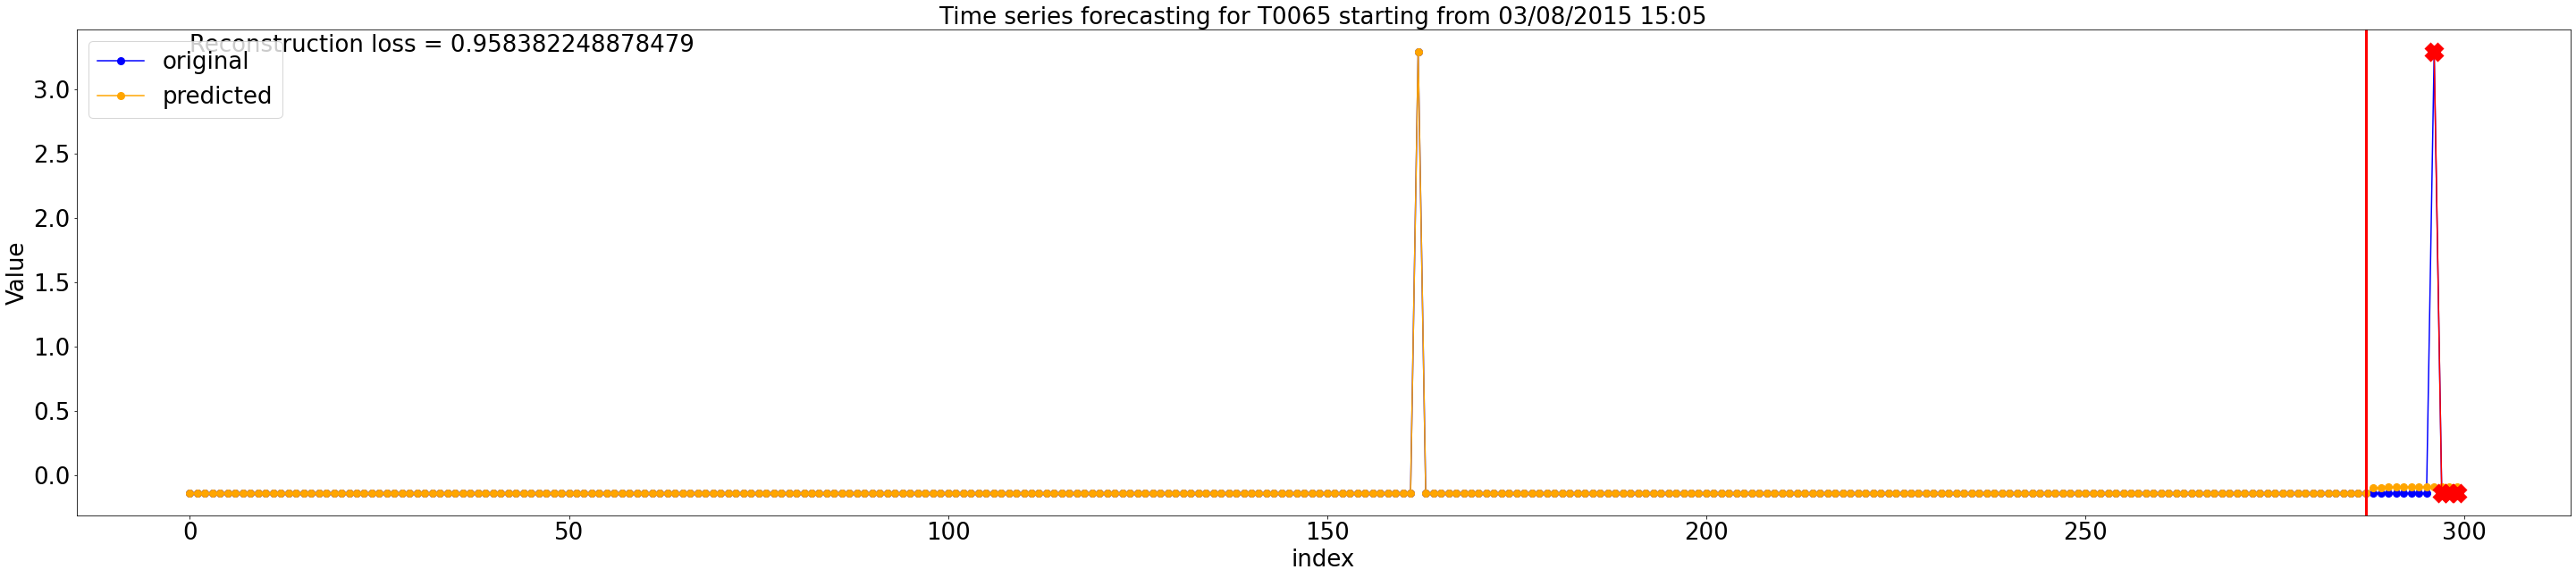

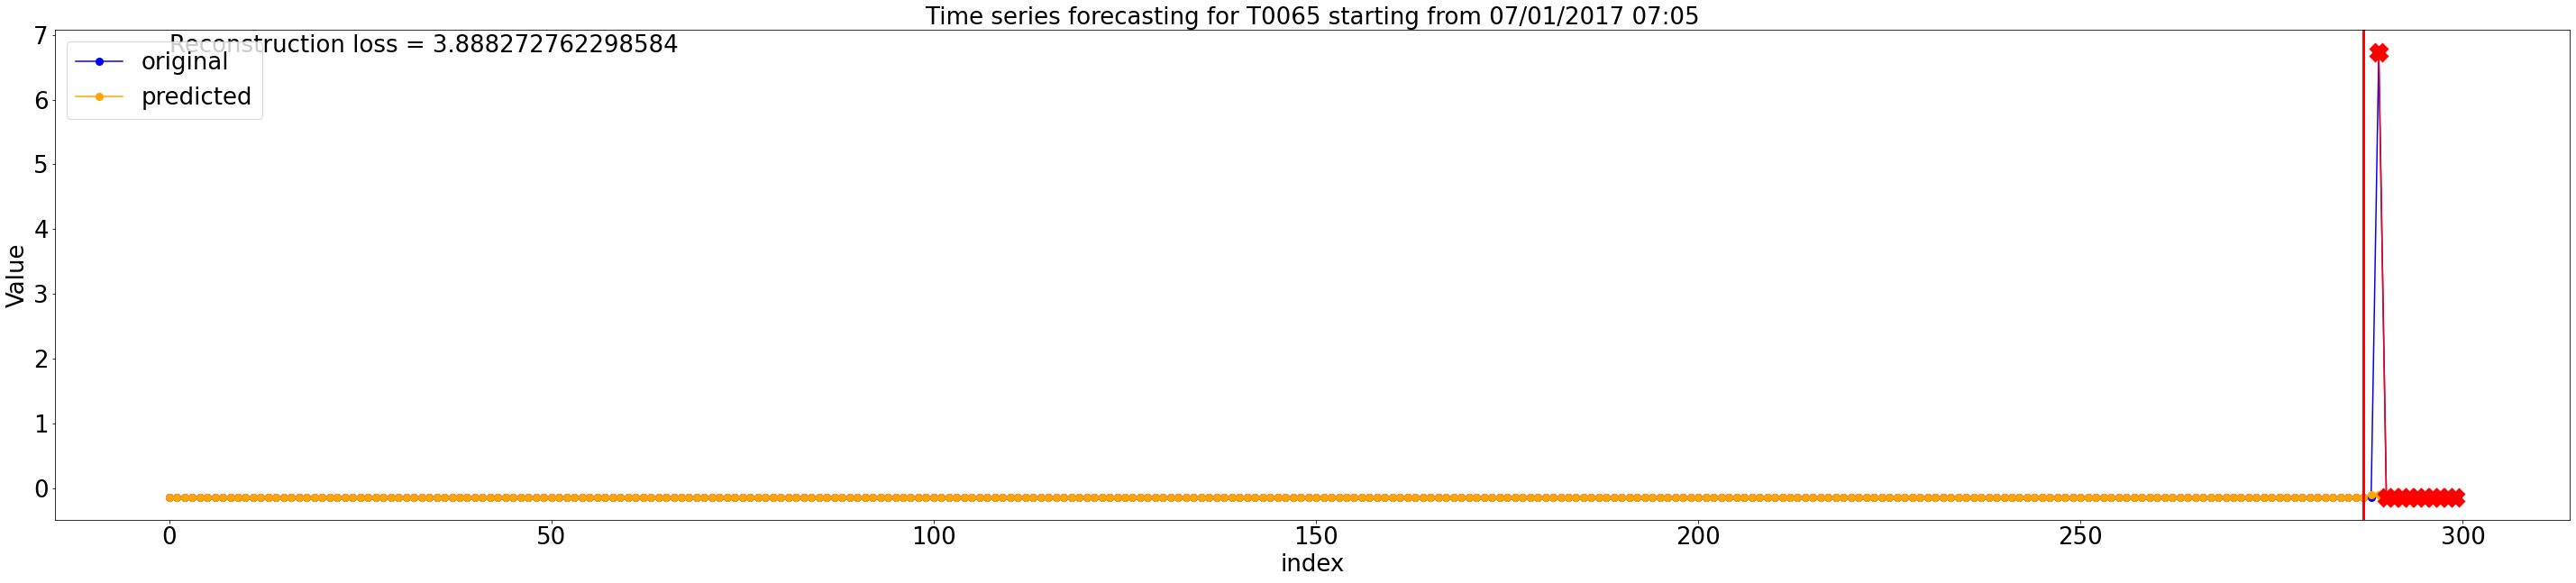

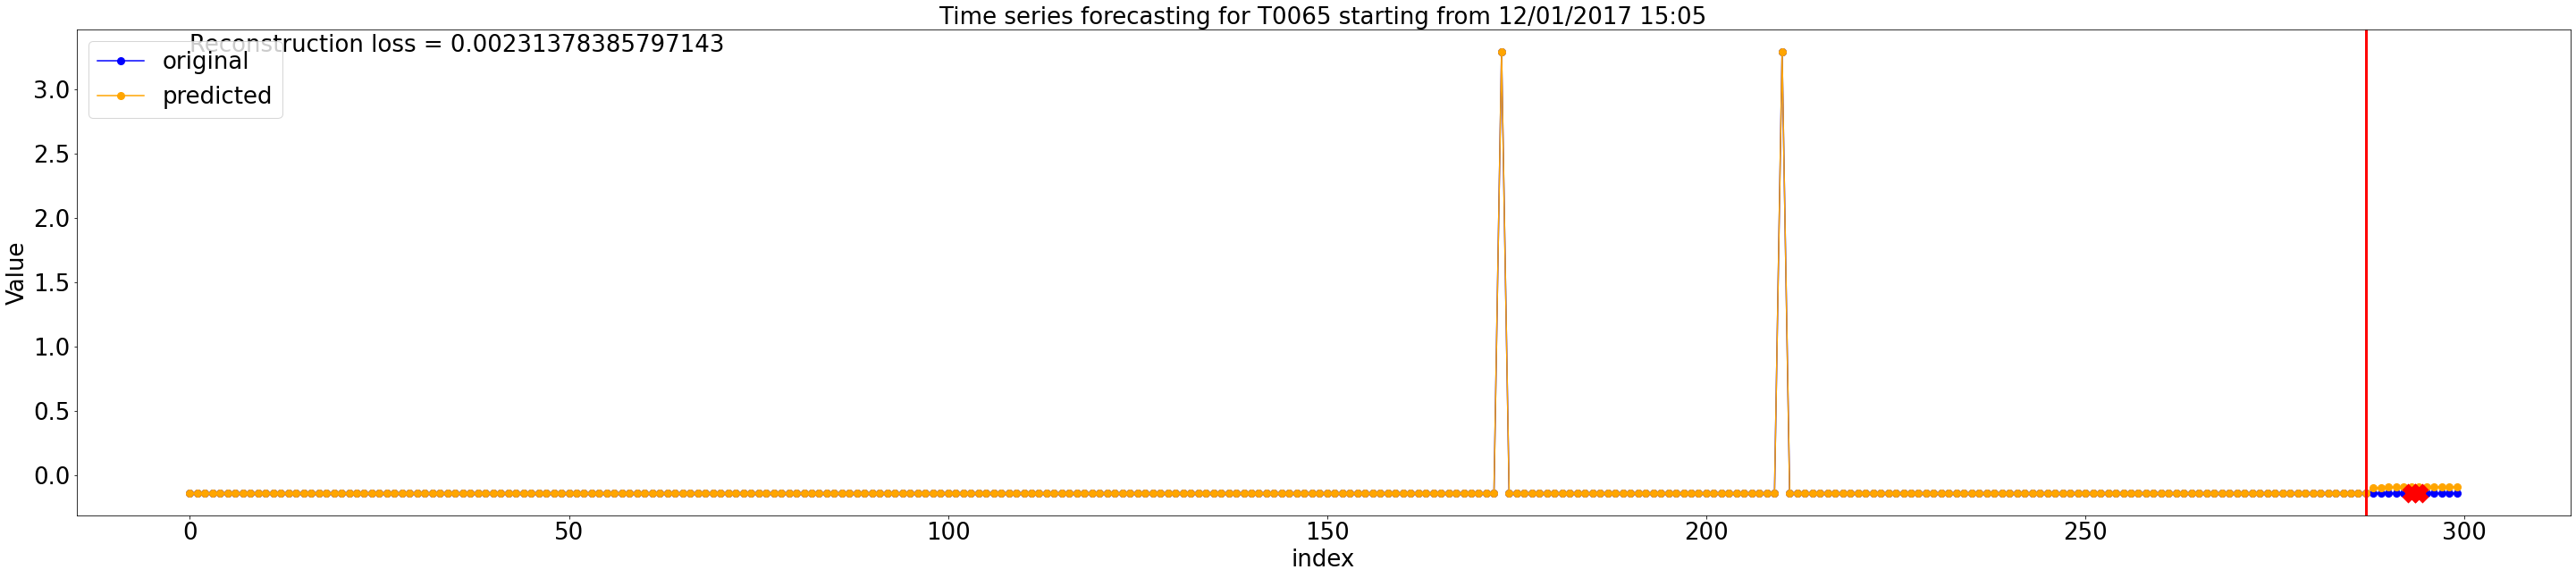

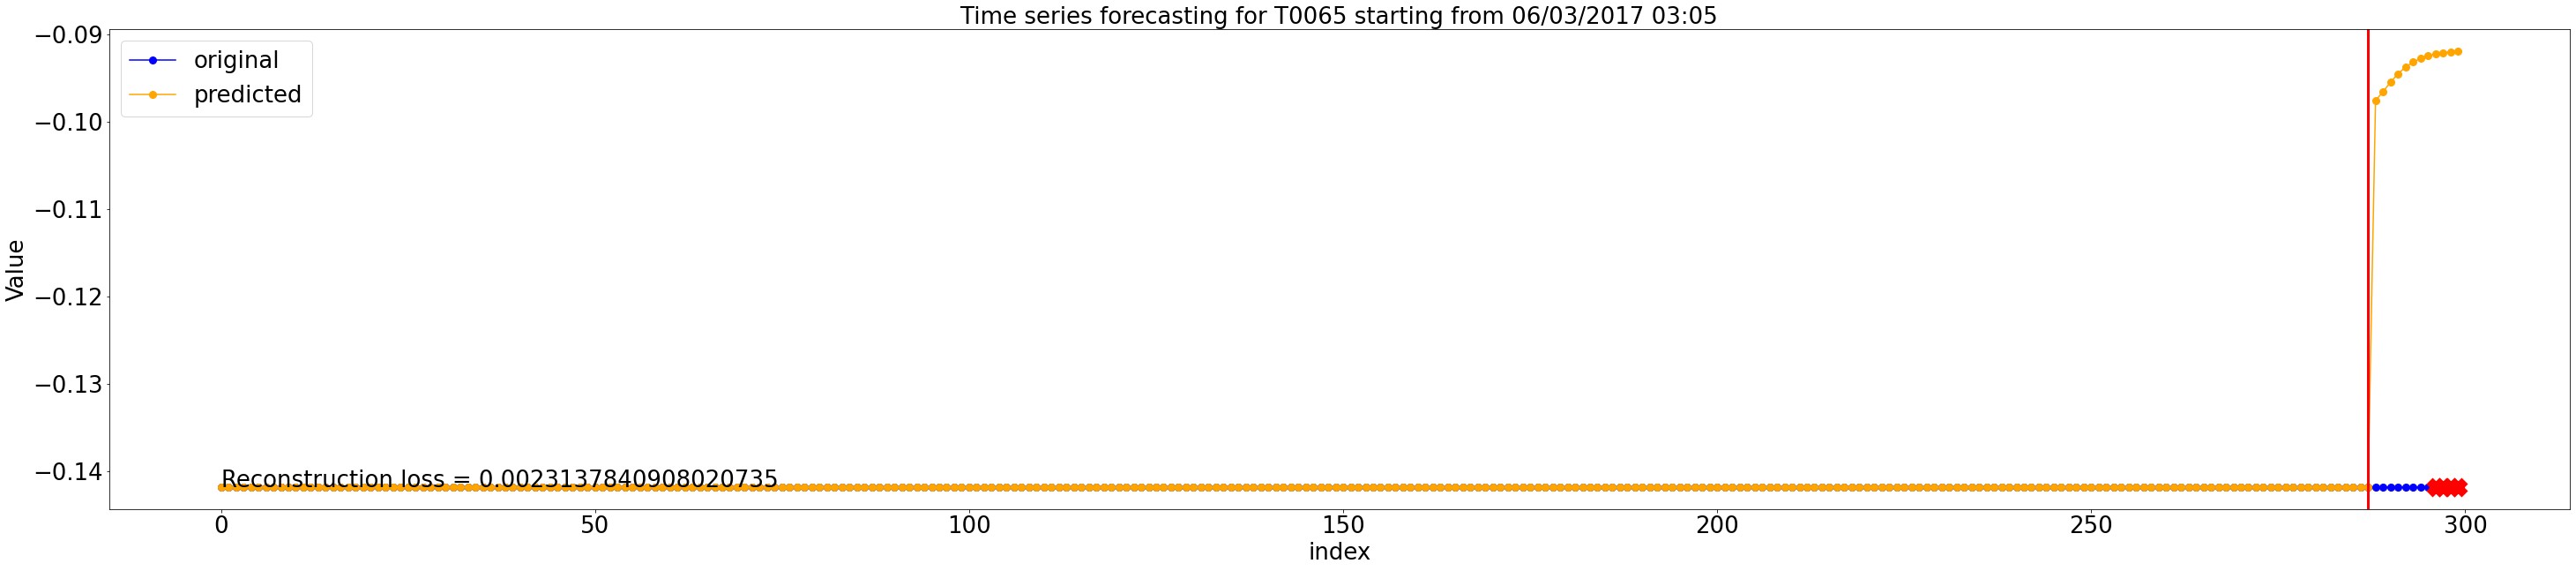

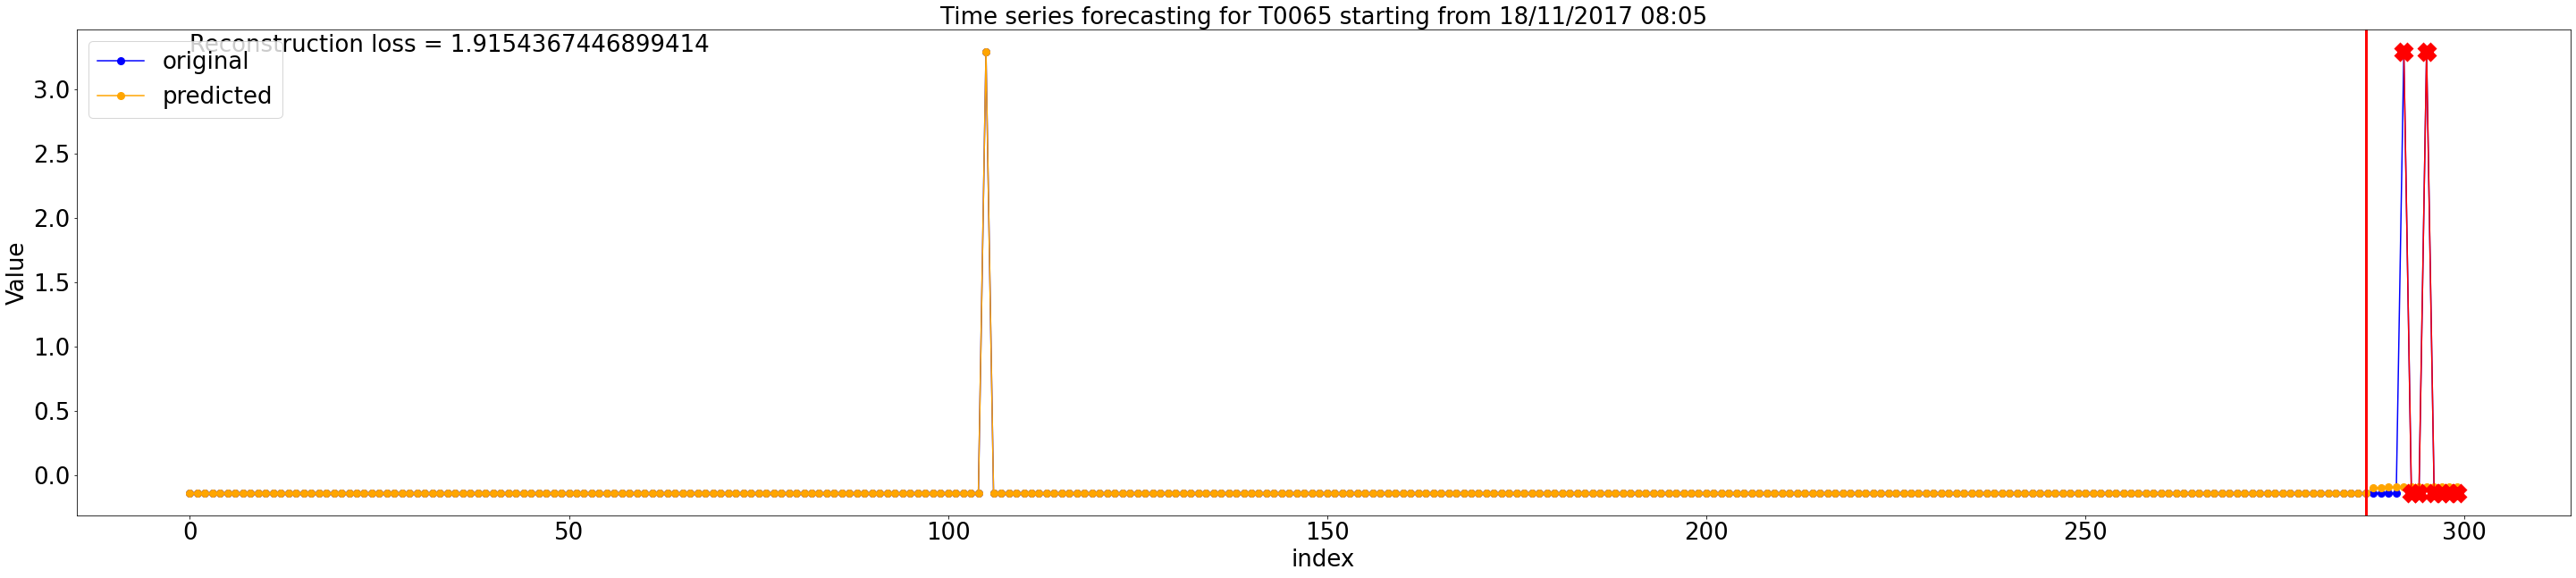

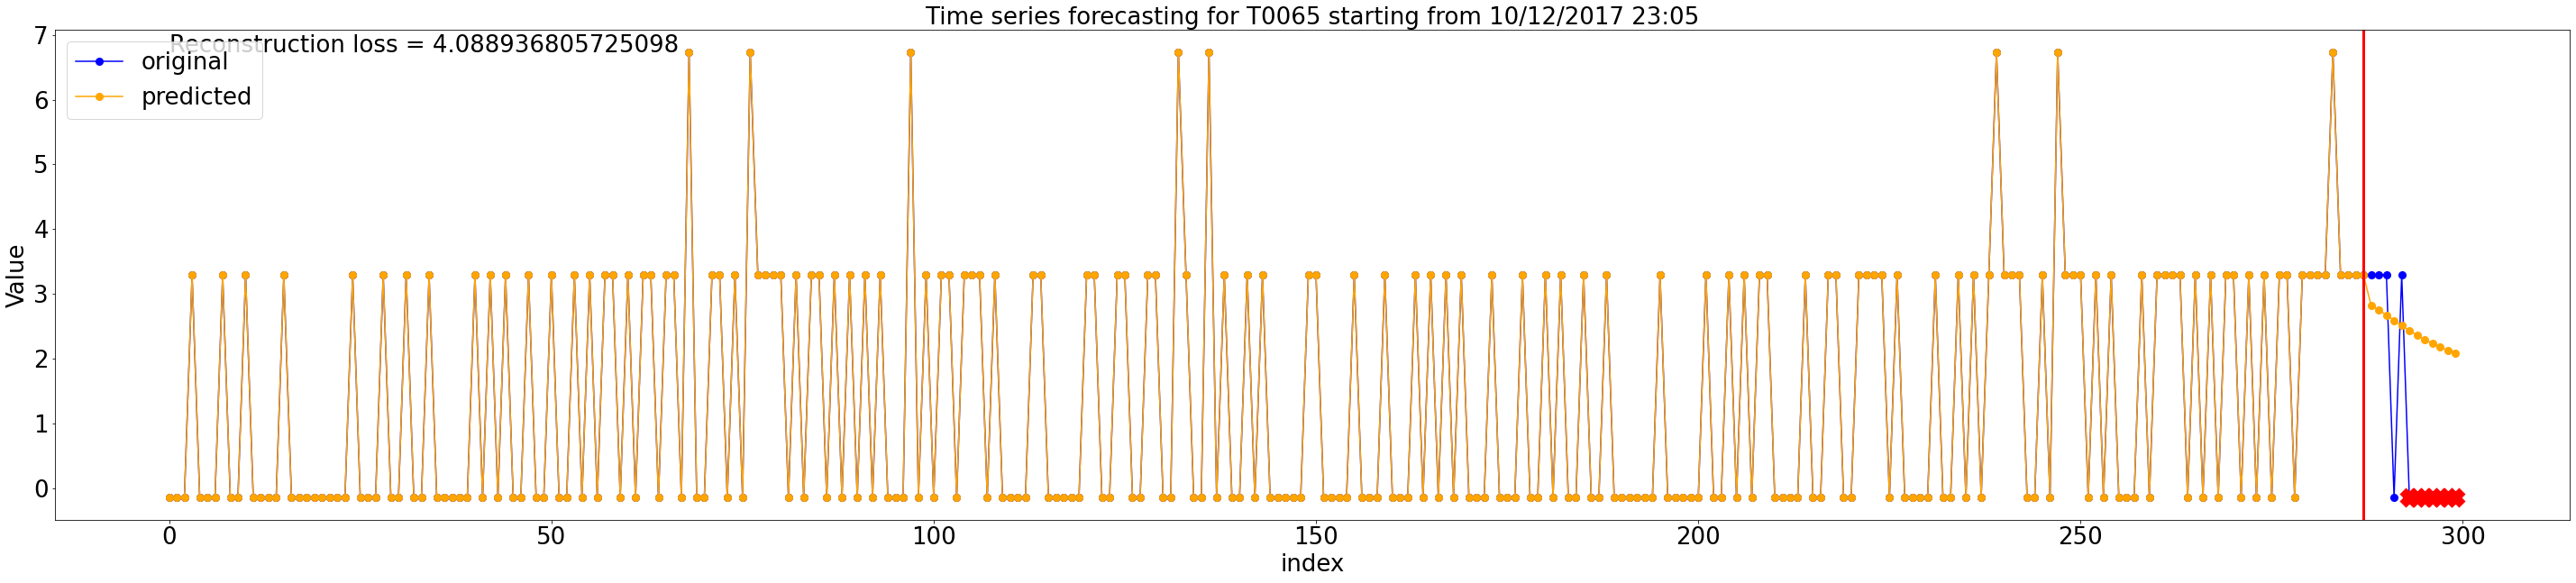

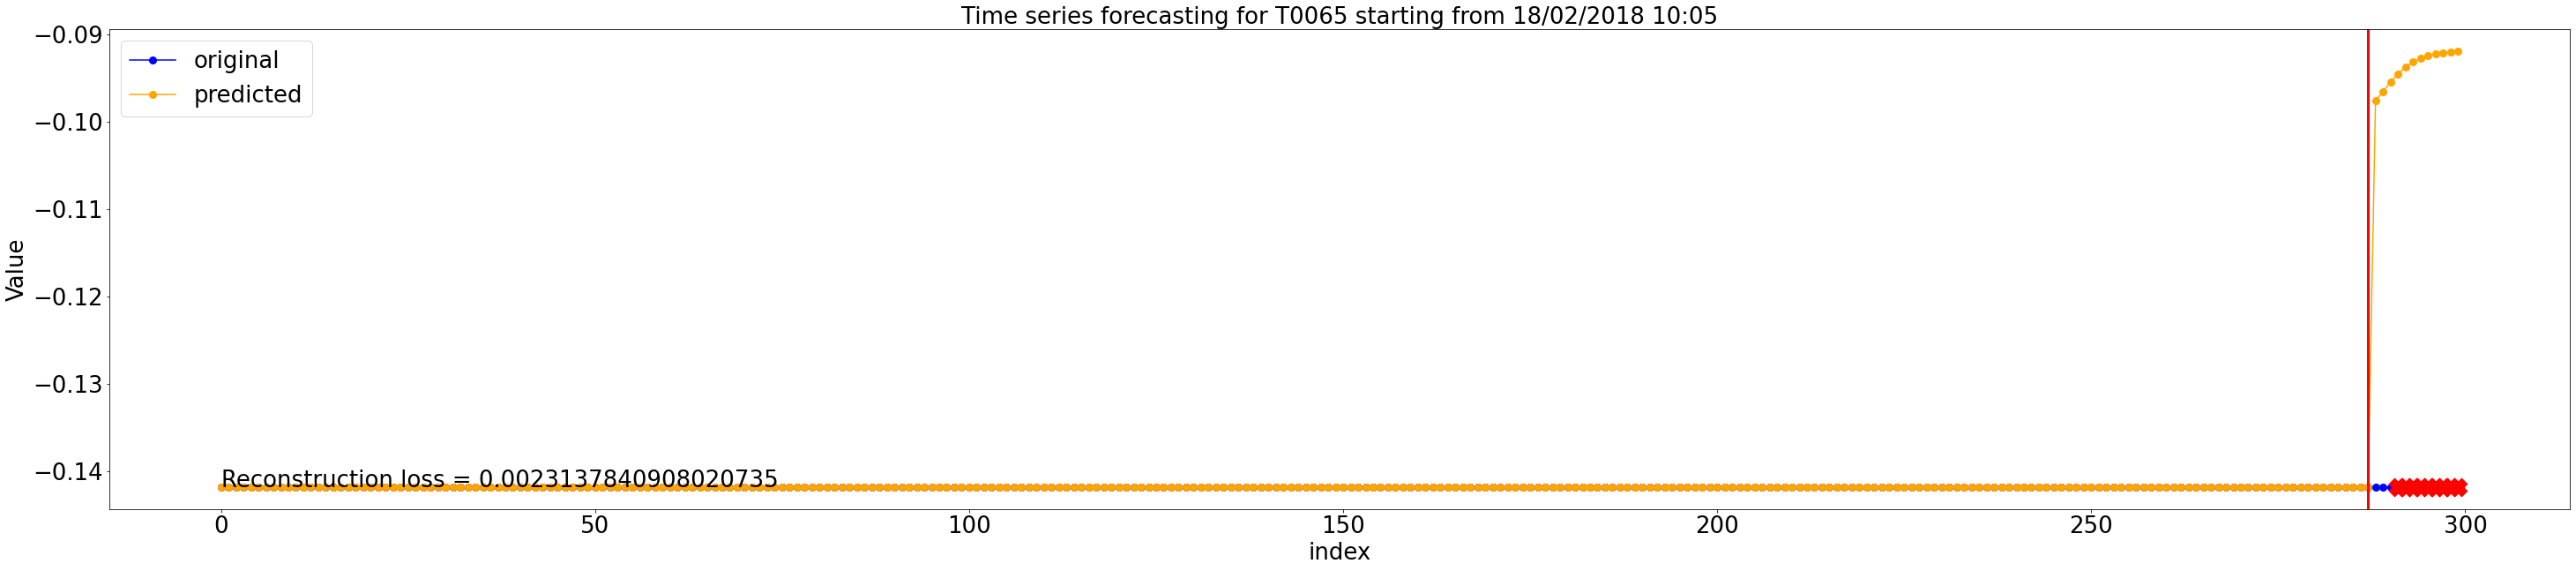

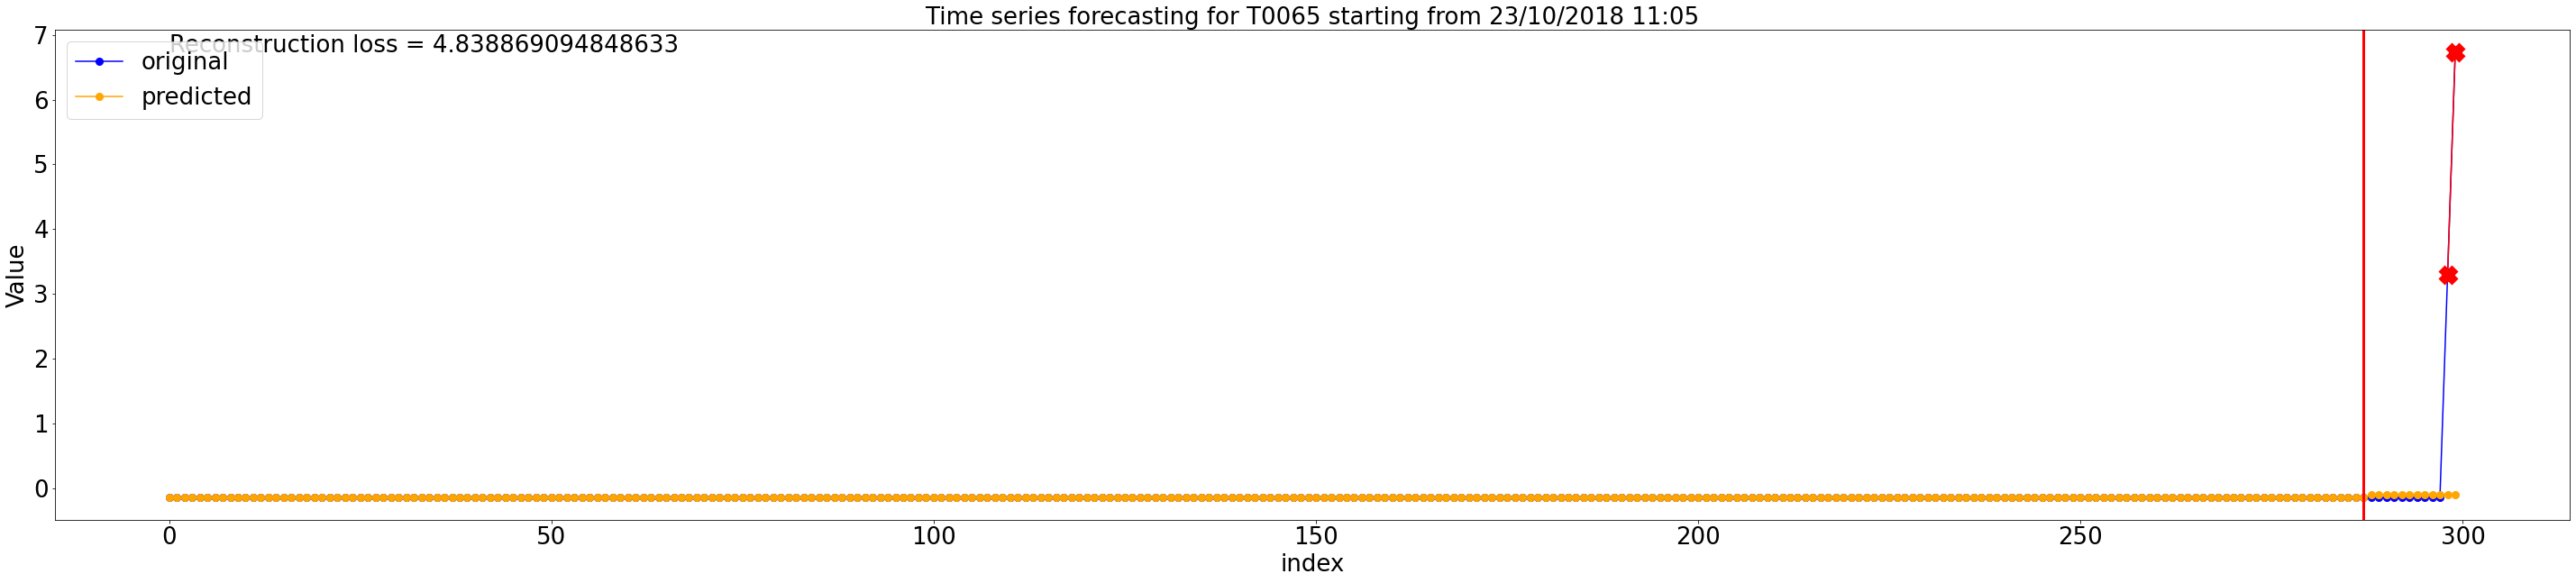

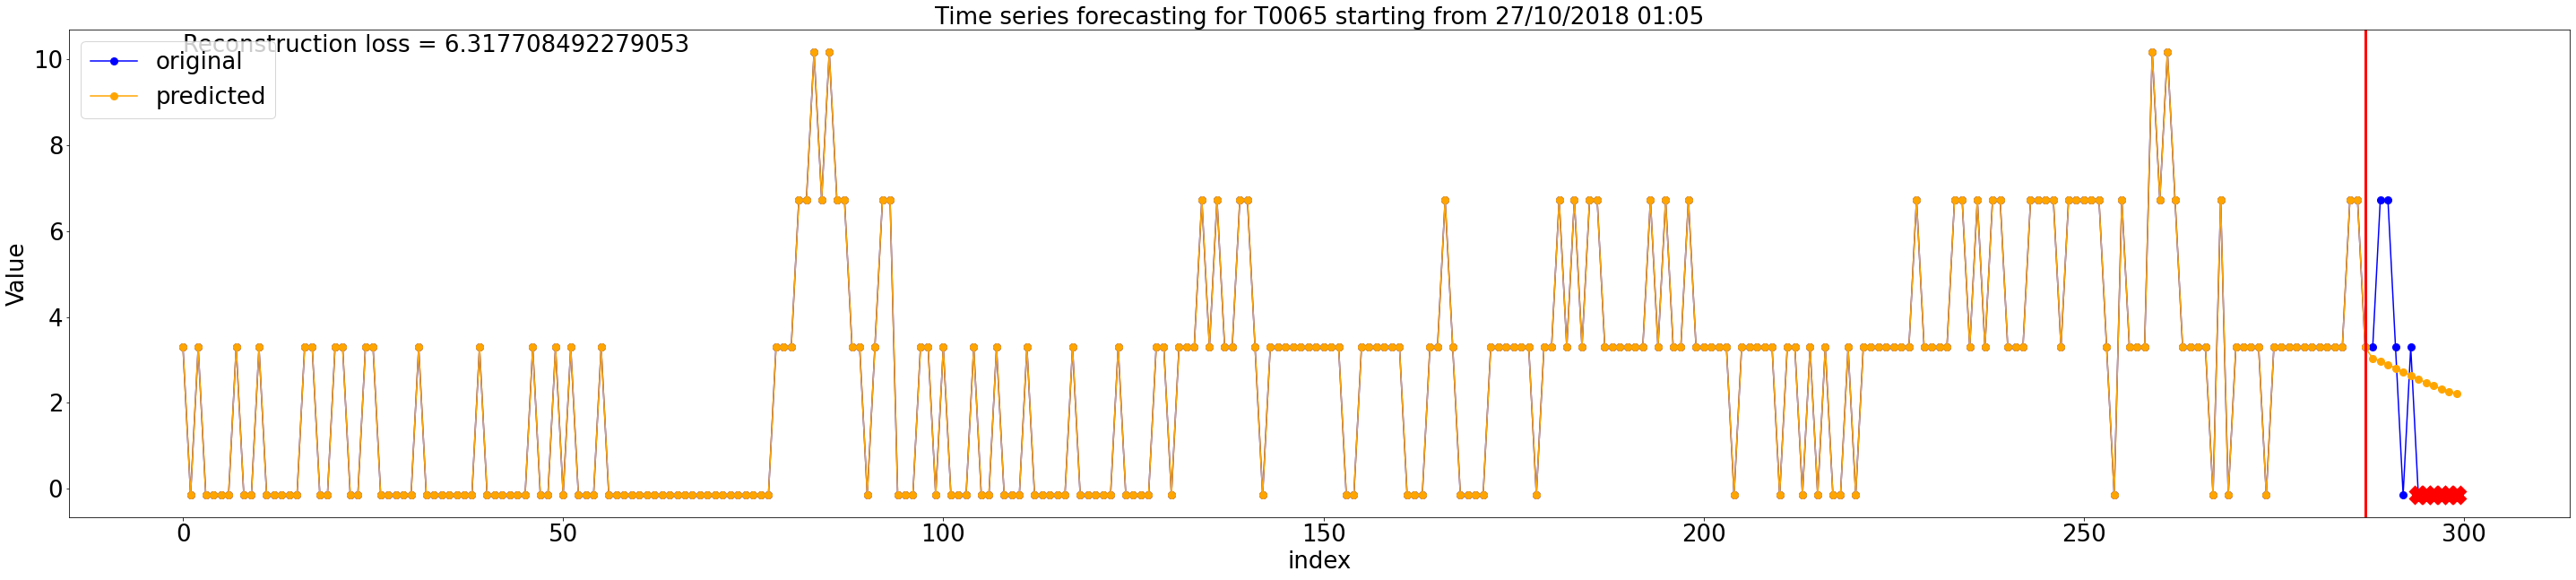

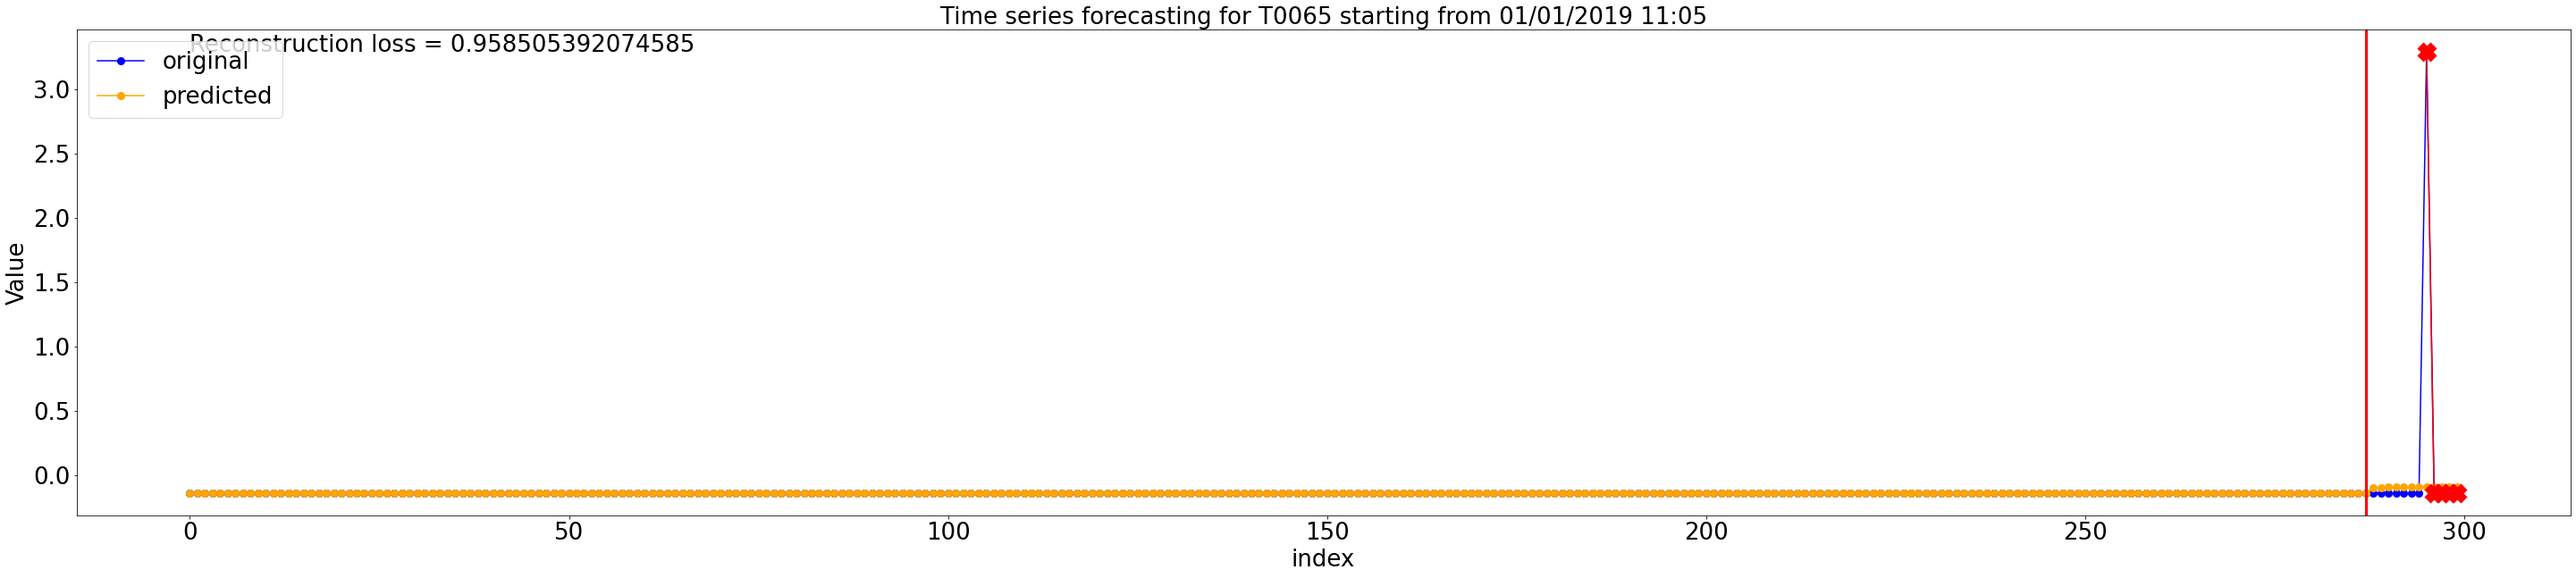

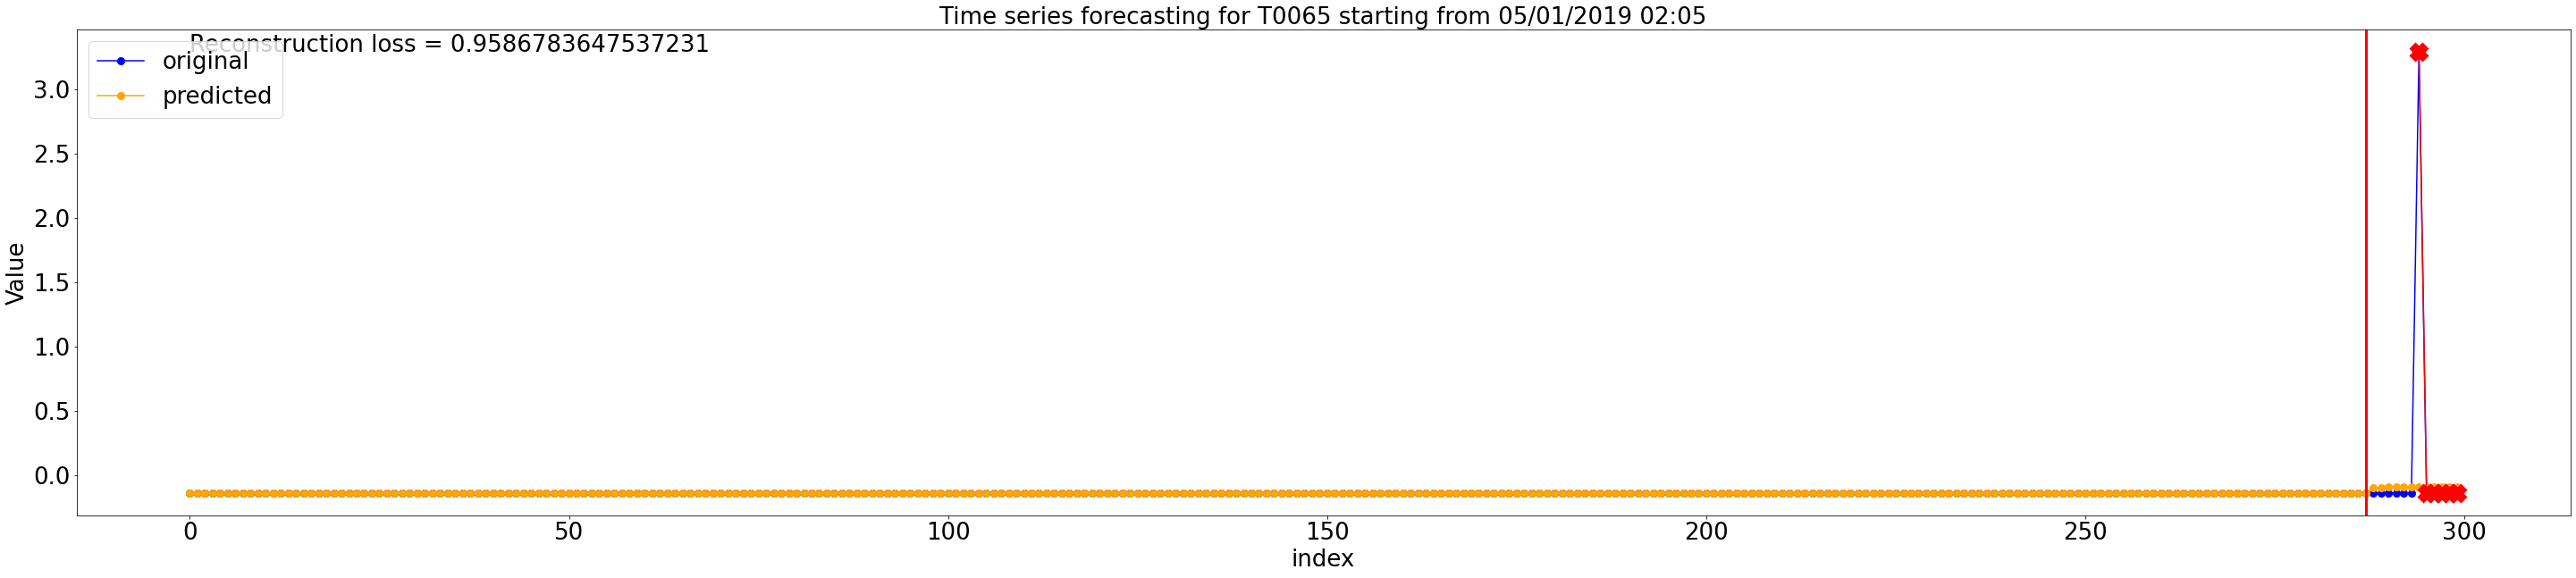

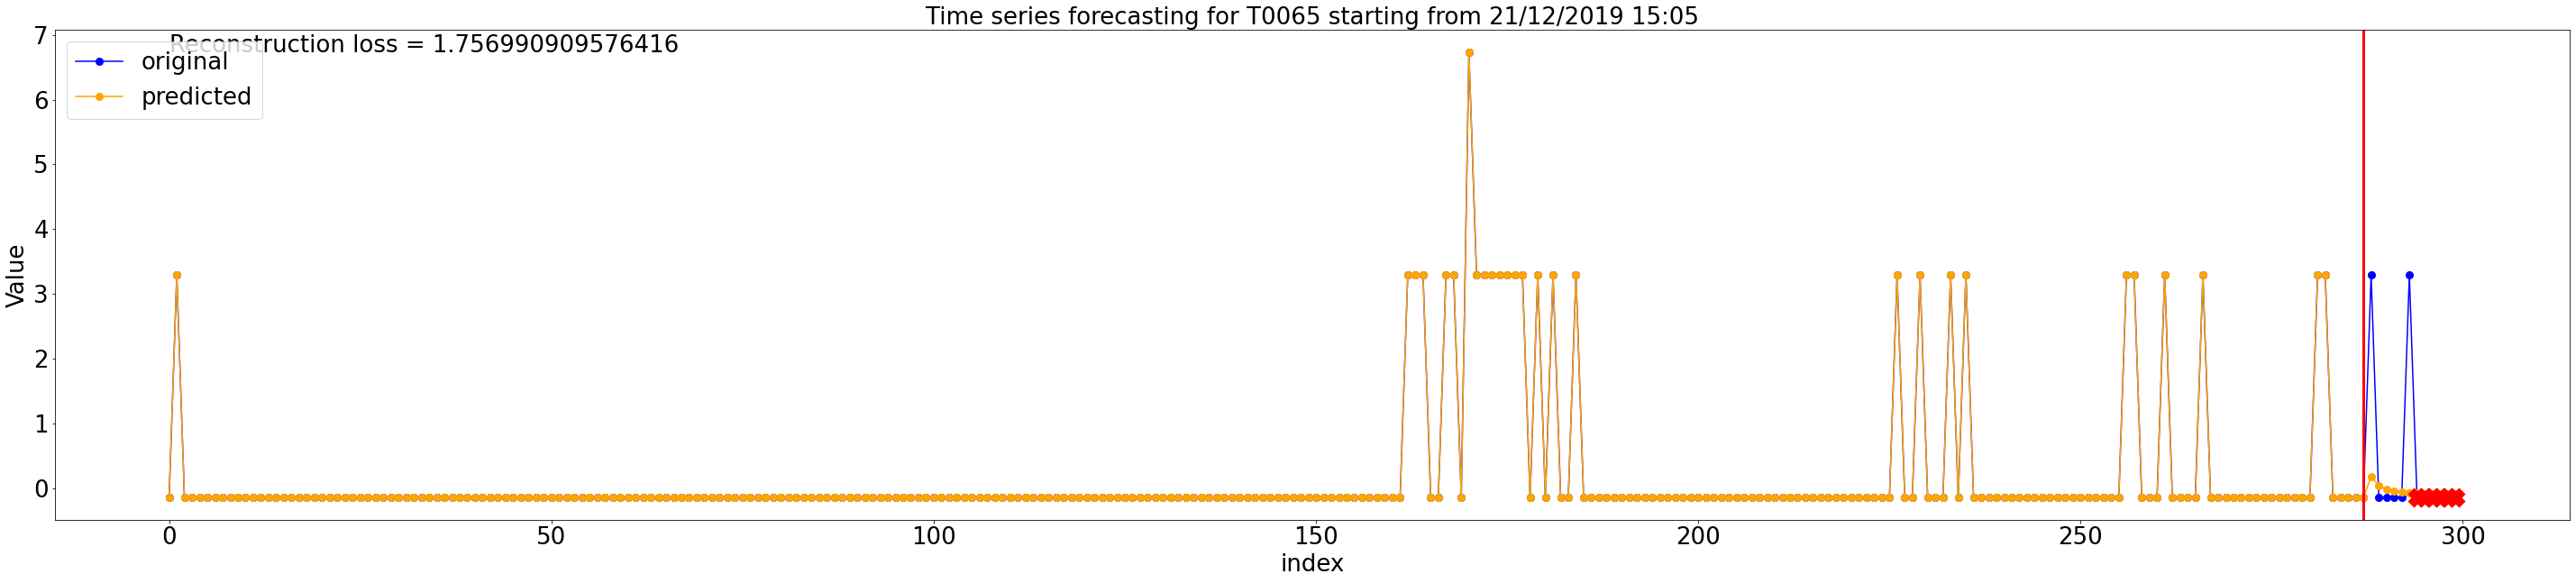

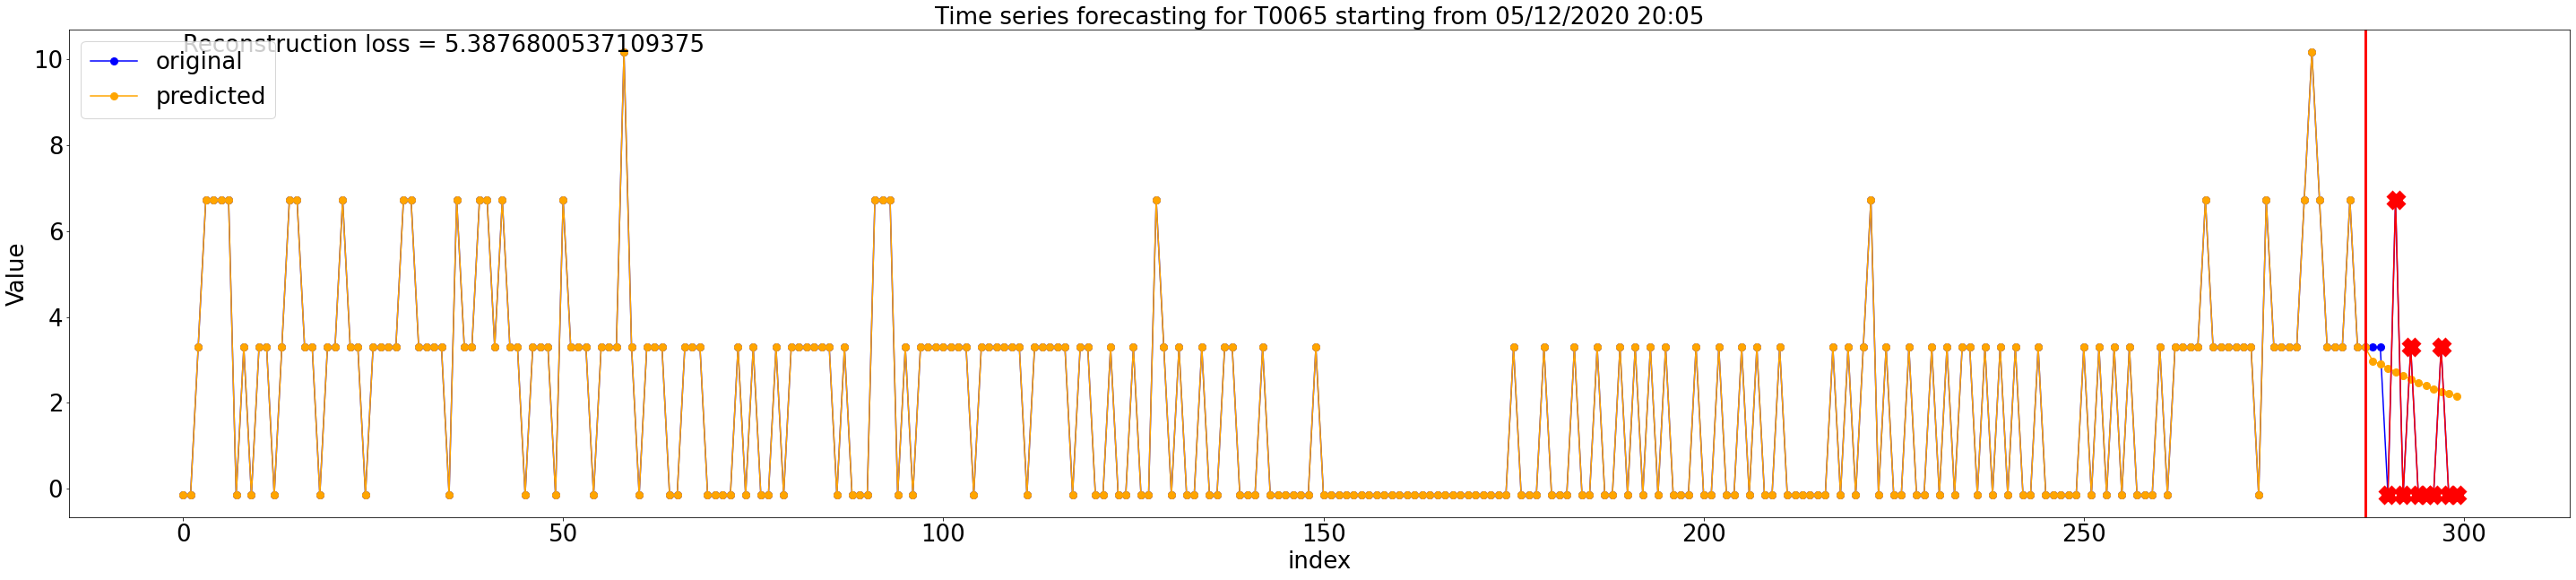

In [16]:
###
### PLOT THE TOP_K_loss EXAMPLES WITH LARGEST LOSS
### AND THE VALIDATED ANOMALIES
###
top_loss_indexes_list = list(top_loss_indexes.cpu().numpy())
# append validated anomalies (to be cleaned)
validated_anomalies = list(np.unique((sample_tensor_validation != 1).nonzero(as_tuple=True)[0].numpy()))
top_loss_indexes_list.extend(validated_anomalies)
ts_len = sample_tensor_features.size(1)

for i in top_loss_indexes_list:
  f = plt.figure()
  f.set_figwidth(50)
  f.set_figheight(10)
  # single_date = str(date[i])
  plt.title(f'Time series forecasting for {sensor_code} starting from {date[i]}' ,fontsize = 26)
  plt.ylabel('Value',fontsize=26)
  plt.xlabel('index',fontsize=26)
  plt.xticks(fontsize=26)
  plt.yticks(fontsize=26)
  
  # find the outliers according to the validation
  y_outliers = np.where(sample_tensor_validation[i].to("cpu") == 1, np.NaN, (sample_tensor_target[i]*std + mean).to("cpu"))
  # plt.xlim(96,102)
  original_signal = torch.cat((sample_tensor_features*std + mean, sample_tensor_target*std + mean), 1)[i]
  plt.plot(original_signal.to("cpu"), "o-",ms=8,color="blue", label = 'original')
  plt.text(0,max(original_signal),f'Reconstruction loss = {loss[i]}',fontsize=26)
  plt.plot((reconstructed[i]*std + mean).to("cpu"),"o-",ms=8,color="orange", label = 'predicted')
  plt.plot(np.arange(ts_len,ts_len+n_previsions), y_outliers, "x-",ms=15,mew=10,color="red")
  # plt.fill_between(line_deviation.index,under_line,over_line, color='b', alpha=.1)
  plt.axvline(x=ts_len-1, color='red',lw=3)
  plt.legend(fontsize=26)
  plt.show()
  # plt.savefig('T0010_temperature_anomaly.pdf')

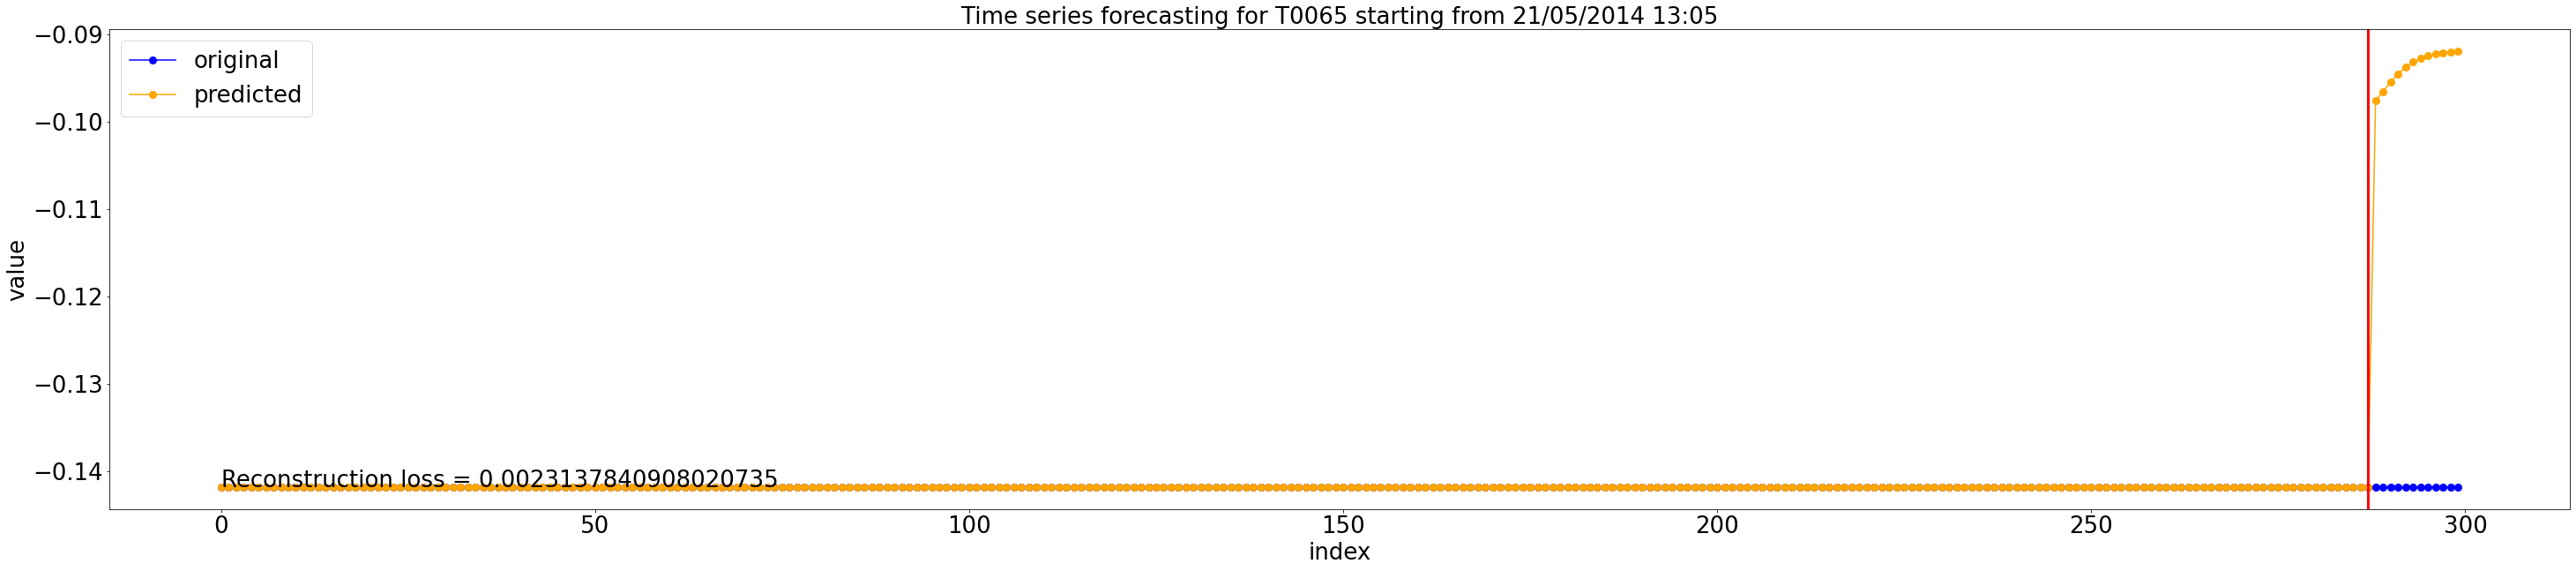

In [17]:
###
### PLOT SOME OTHER EXAMPLES
###
lowest_loss_indexes_list = list(lowest_loss_indexes.cpu().numpy())
ts_len = sample_tensor_features.size(1)

for i in range(500,501):#lowest_loss_indexes_list:
  f = plt.figure()
  f.set_figwidth(50)
  f.set_figheight(10)
  # single_date = str(date[i])
  plt.title(f'Time series forecasting for {sensor_code} starting from {date[i]}' ,fontsize = 26)
  plt.ylabel('value',fontsize=26)
  plt.xlabel('index',fontsize=26)
  plt.xticks(fontsize=26)
  plt.yticks(fontsize=26)
  
  # find the outliers according to the validation
  y_outliers = np.where(sample_tensor_validation[i].to("cpu") == 1, np.NaN, (sample_tensor_target[i]*std + mean).to("cpu"))
  # plt.xlim(96,102)
  original_signal = torch.cat((sample_tensor_features*std + mean, sample_tensor_target*std + mean), 1)[i]
  plt.plot(original_signal.to("cpu"), "o-",ms=8,color="blue", label = 'original')
  plt.text(0,max(original_signal),f'Reconstruction loss = {loss[i]}',fontsize=26)
  plt.plot((reconstructed[i]*std + mean).to("cpu"),"o-",ms=8,color="orange", label = 'predicted')
  plt.plot(np.arange(ts_len,ts_len+n_previsions), y_outliers, "x-",ms=15,mew=10,color="red")
  # plt.fill_between(line_deviation.index,under_line,over_line, color='b', alpha=.1)
  plt.axvline(x=ts_len-1, color='red',lw=3)
  plt.legend(fontsize=26)
  plt.show()
  # plt.savefig('T0010_temperature_anomaly.pdf')

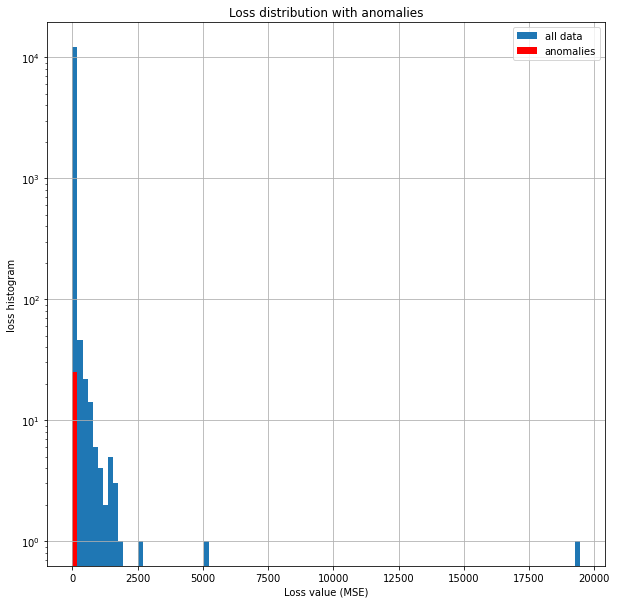

In [18]:
# HISTOGRAM
criterion = nn.MSELoss(reduction='none')
loss = criterion((reconstructed[:,-pred_length:]), (sample_tensor_target)).sum(dim=1)
arr = loss.cpu().detach().numpy()
extract_quantity_from_dataset(dataset['train'],"labels",None,device=device)
bool_validation = np.any(sample_tensor_validation.cpu().numpy()!=1,axis=1)
plt.figure(figsize=[10,10])
N_BINS = 100
bins_prec_hist = plt.hist(arr, bins = N_BINS, label = 'all data')[1]
plt.hist(loss[bool_validation].cpu(), bins = bins_prec_hist, label = 'anomalies', color = 'red')
plt.yscale('log')
plt.xlabel("Loss value (MSE)")
plt.ylabel("loss histogram")
plt.title("Loss distribution with anomalies")
plt.grid()
plt.legend()
plt.show()
